# ASSIGNMENT # 02 - Feature Selection and Cross-Validation

# Ayesha Salman (29418) & Akifa Khan (29419)

# CROSS VALIDATION

# Classification Data 

## Cancer Dataset

Necessary Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import clone

In [3]:
data=pd.read_csv("Classification.CancerMB.csv",sep=',')
data

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

In [4]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [5]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Main Pipeline

KNN with Cross Validation:
Accuracy: 0.9666080843585237
Precision: 0.9753694581280788
Recall: 0.9339622641509434
F1 Score: 0.9542168674698795

KNN without Cross Validation:
Accuracy: 0.9473684210526315
Precision: 0.9302325581395349
Recall: 0.9302325581395349
F1 Score: 0.9302325581395349


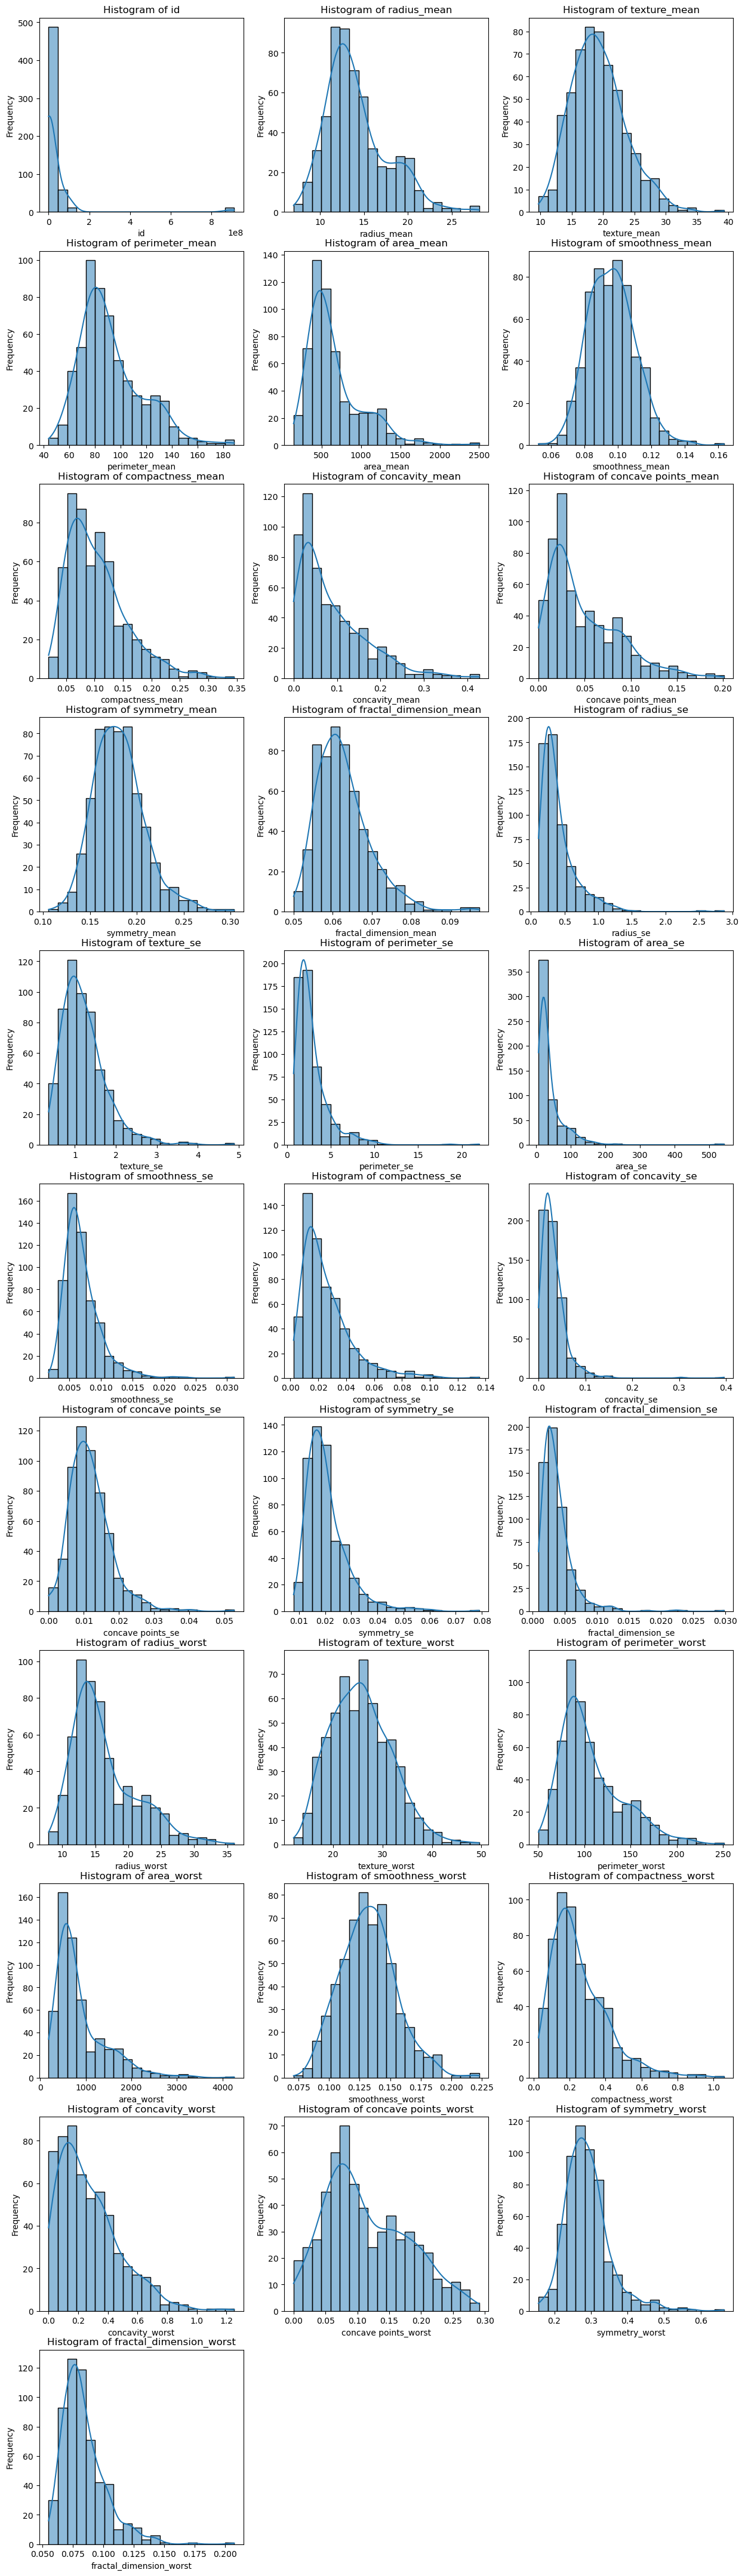

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

def knn_classification(filename):
    # Import data
    data = pd.read_csv(filename)
    
    # Encoding categorical predictor
    label_encoder = LabelEncoder()
    data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])
    
    # Handling missing values if any
    imputer = SimpleImputer(strategy='mean')
    data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
    
    # Splitting into features and target
    X = data.drop('diagnosis', axis=1)
    y = data['diagnosis']
    
    # Standardizing features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Create histograms for selected columns
    columns = X.columns
    num_plots = len(columns)
    rows = (num_plots + 2) // 3  # Adjust this number to change the number of plots per row
    fig, axes = plt.subplots(rows, 3, figsize=(15, 5*rows))
    axes = axes.flatten()
    
    for i, column in enumerate(columns):
        sns.histplot(data[column], bins=20, kde=True, ax=axes[i])
        axes[i].set_title(f'Histogram of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
    
    # Remove extra empty subplots
    for j in range(i + 1, len(axes)):
        axes[j].remove()
    
    # KNN with Cross Validation
    knn_cv = KNeighborsClassifier()
    cv_y_pred = cross_val_predict(knn_cv, X_scaled, y, cv=5)
    cv_accuracy = accuracy_score(y, cv_y_pred)
    cv_precision = precision_score(y, cv_y_pred)
    cv_recall = recall_score(y, cv_y_pred)
    cv_f1 = f1_score(y, cv_y_pred)
    
    # KNN without Cross Validation
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Print results
    print("KNN with Cross Validation:")
    print("Accuracy:", cv_accuracy)
    print("Precision:", cv_precision)
    print("Recall:", cv_recall)
    print("F1 Score:", cv_f1)
    print("\nKNN without Cross Validation:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

# Example usage:
filename = "Classification.CancerMB.csv"
knn_classification(filename)


Logistic Regression Results:
Accuracy: 0.9736842105263158
Precision: 0.9761904761904762
Recall: 0.9534883720930233
F1 Score: 0.9647058823529412


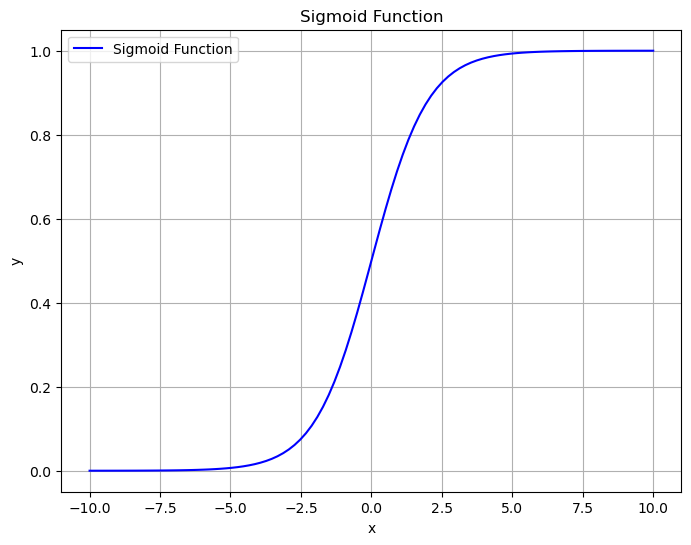

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

def logistic_regression(filename):
    # Import data
    data = pd.read_csv(filename)
    
    # Encoding categorical predictor
    label_encoder = LabelEncoder()
    data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])
    
    # Handling missing values if any
    imputer = SimpleImputer(strategy='mean')
    data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
    
    # Splitting into features and target
    X = data.drop('diagnosis', axis=1)
    y = data['diagnosis']
    
    # Standardizing features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Logistic Regression
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Model evaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Print results
    print("Logistic Regression Results:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    
    # Generate sigmoid graph
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    # Generate values for x
    x = np.linspace(-10, 10, 100)

    # Calculate corresponding y values using sigmoid function
    y = sigmoid(x)

    # Plot sigmoid function
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label='Sigmoid Function', color='blue')
    plt.title('Sigmoid Function')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
filename = "Classification.CancerMB.csv"
logistic_regression(filename)


In [10]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Generate sample data (replace this with your actual data)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def logistic_regression_classifier(X, y, cv=5):
    # Standardizing the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Initialize Logistic Regression classifier
    lr = LogisticRegression()
    
    # Perform cross-validation
    accuracy_scores = cross_val_score(lr, X_scaled, y, cv=cv, scoring='accuracy')
    
    # Compute F1 score for positive and negative classes separately
    y_pred = cross_val_predict(lr, X_scaled, y, cv=cv)
    f1_pos = f1_score(y, y_pred, pos_label=1)
    f1_neg = f1_score(y, y_pred, pos_label=0)
    
    # Compute AUC
    y_scores = cross_val_predict(lr, X_scaled, y, cv=cv, method='predict_proba')
    auc = roc_auc_score(y, y_scores[:, 1])  # Assuming y contains binary labels
    
    # Average the scores across all folds
    accuracy = accuracy_scores.mean()
    
    return accuracy, f1_pos, f1_neg, auc

# Example usage:
accuracy_lr, f1_pos_lr, f1_neg_lr, auc_lr = logistic_regression_classifier(X_train, y_train)
print("Accuracy with Logistic Regression:", accuracy_lr)
print("F1 Score (Positive) with Logistic Regression:", f1_pos_lr)
print("F1 Score (Negative) with Logistic Regression:", f1_neg_lr)
print("AUC with Logistic Regression:", auc_lr)


Accuracy with Logistic Regression: 0.8674999999999999
F1 Score (Positive) with Logistic Regression: 0.8637532133676092
F1 Score (Negative) with Logistic Regression: 0.8710462287104621
AUC with Logistic Regression: 0.9305099686779075


### INTERPRETATION

The Cancer Classification dataset is a comprehensive collection of features related to the characteristics of cell nuclei, aimed at predicting whether a tumor is malignant (M) or benign (B). The attributes capture various aspects of cell morphology and structure, which are crucial for diagnosing cancer.
The "diagnosis" column serves as the label and categorizes tumors into two classes: Malignant (denoted by "M") and Benign (denoted by "B"). The dataset aims to facilitate the classification of tumors based on their cellular characteristics, assisting medical professionals in diagnosing cancer accurately and efficiently.The dataset has 570 rows and 32 columns.

1) KNN with Cross Validation:
Accuracy: The model correctly predicts the class of approximately 96.66% of the samples in the dataset when using cross-validation. This high accuracy score indicates that the model performs well in classifying both classes (positive and negative).However, there is a very chance that the model lead to overfitting when applied to live data.
Precision: Out of all the samples predicted as positive by the model, approximately 97.54% are actually positive. This high precision score suggests that when the model predicts a sample as positive, it's highly likely to be correct.
Recall: The model identifies around 93.40% of all actual positive samples. This recall score indicates that the model is effective at capturing most of the positive samples in the dataset.
F1 Score: The  mean of precision and recall, which is approximately 95.42%, indicates a good balance between precision and recall. This suggests that the model has a good overall performance in terms of both precision and recall.


2) KNN without Cross Validation:
Accuracy: The accuracy without cross-validation is slightly lower compared to cross-validation, at around 94.74%. However, it's still a reasonably high accuracy score.
Precision: The precision without cross-validation is approximately 93.02%, indicating that out of all the samples predicted as positive, 93.02% are actually positive.
Recall: The recall without cross-validation is also around 93.02%, meaning the model identifies 93.02% of all actual positive samples.
F1 Score: The F1 score without cross-validation is approximately 93.02%, indicating a good balance between precision and recall.


3) Conclusion:
The KNN model with cross-validation generally performs better across all metrics compared to the model without cross-validation. This indicates that cross-validation helps in improving the model's performance and  ability to undersrand the patterns.
The model with cross-validation has higher accuracy, precision, recall, and F1 score, suggesting that it is better at classifying both classes (positive and negative) and has a good balance between precision and recall.
Therefore, it's advisable to use the KNN model with cross-validation for this dataset, as it provides more reliable and robust results.But with some feature selection methods else this will lead to overfitting. 

4) Logistic Regression:

Accuracy: 0.9737
The logistic regression model achieves a high accuracy of approximately 97.37%, indicating robust predictive capability across the dataset. In the confusion matrix, it's evident that the model demonstrates a strong ability to correctly classify both non-diagnosis and diagnosis instances, as evidenced by the high numbers of true negatives and true positives. Precision and recall values for both classes are notably high, reflecting the model's ability to minimize both false positives and false negatives. The F1-score, which combines precision and recall, further validates the model's effectiveness in classification tasks. Overall, logistic regression exhibits strong performance in accurately predicting diagnosis outcomes in the dataset.

5) Overall Comparison of Logistic Regression and KNN:
The logistic regression results are promising, showcasing high accuracy, precision, recall, and F1-score. For a comprehensive comparison, it's essential to evaluate the performance of KNN (K-Nearest Neighbors) across similar metrics, considering the same dataset and feature selection methods. By analyzing the relative effectiveness of logistic regression and KNN , we can conclude which method yields superior results for this specific classification task. .

## Diabetes Dataset

In [5]:
import pandas as pd

In [6]:
data=pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
data

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...                 ...     ...       ...        ...   ...     ...     ...   
253675              0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677              0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678              0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                        0.0           0.0     0.0  ...            1.0   
1                        0.0           1.0     0.0  ...            0.0   
2                        0.0           0.0     1.0  ...            1.0   
3                        0.0           1.0     1.0  ...            1.0   
4                        0.0           1.0     1.0  ...            1.0   
...                      ...           ...     ...  ...            ...   
253675                   0.0           0.0     1.0  ...            1.0   
253676                   0.0           0.0     0.0  ...            1.0   
253677                   0.0           1.0     1.0  ...            1.0   
253678                   0.0           0.0     1.0  ...            1.0   
253679                   1.0           1.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
0               0.0      5.0      18.0      15.0       1.0  0.0   9.0   
1               1.0      3.0       0.0       0.0       0.0  0.0   7.0   
2               1.0      5.0      30.0      30.0       1.0  0.0   9.0   
3               0.0      2.0       0.0       0.0       0.0  0.0  11.0   
4               0.0      2.0       3.0       0.0       0.0  0.0  11.0   
...             ...      ...       ...       ...       ...  ...   ...   
253675          0.0      3.0       0.0       5.0       0.0  1.0   5.0   
253676          0.0      4.0       0.0       0.0       1.0  0.0  11.0   
253677          0.0      1.0       0.0       0.0       0.0  0.0   2.0   
253678          0.0      3.0       0.0       0.0       0.0  1.0   7.0   
253679          0.0      2.0       0.0       0.0       0.0  0.0   9.0   

        Education  Income  
0             4.0     3.0  
1             6.0     1.0  
2             4.0     8.0  
3             3.0     6.0  
4             5.0     4.0  
...           ...     ...  
253675        6.0     7.0  
253676        2.0     4.0  
253677        5.0     2.0  
253678        5.0     1.0  
253679        6.0     2.0  

[253680 rows x 22 columns]

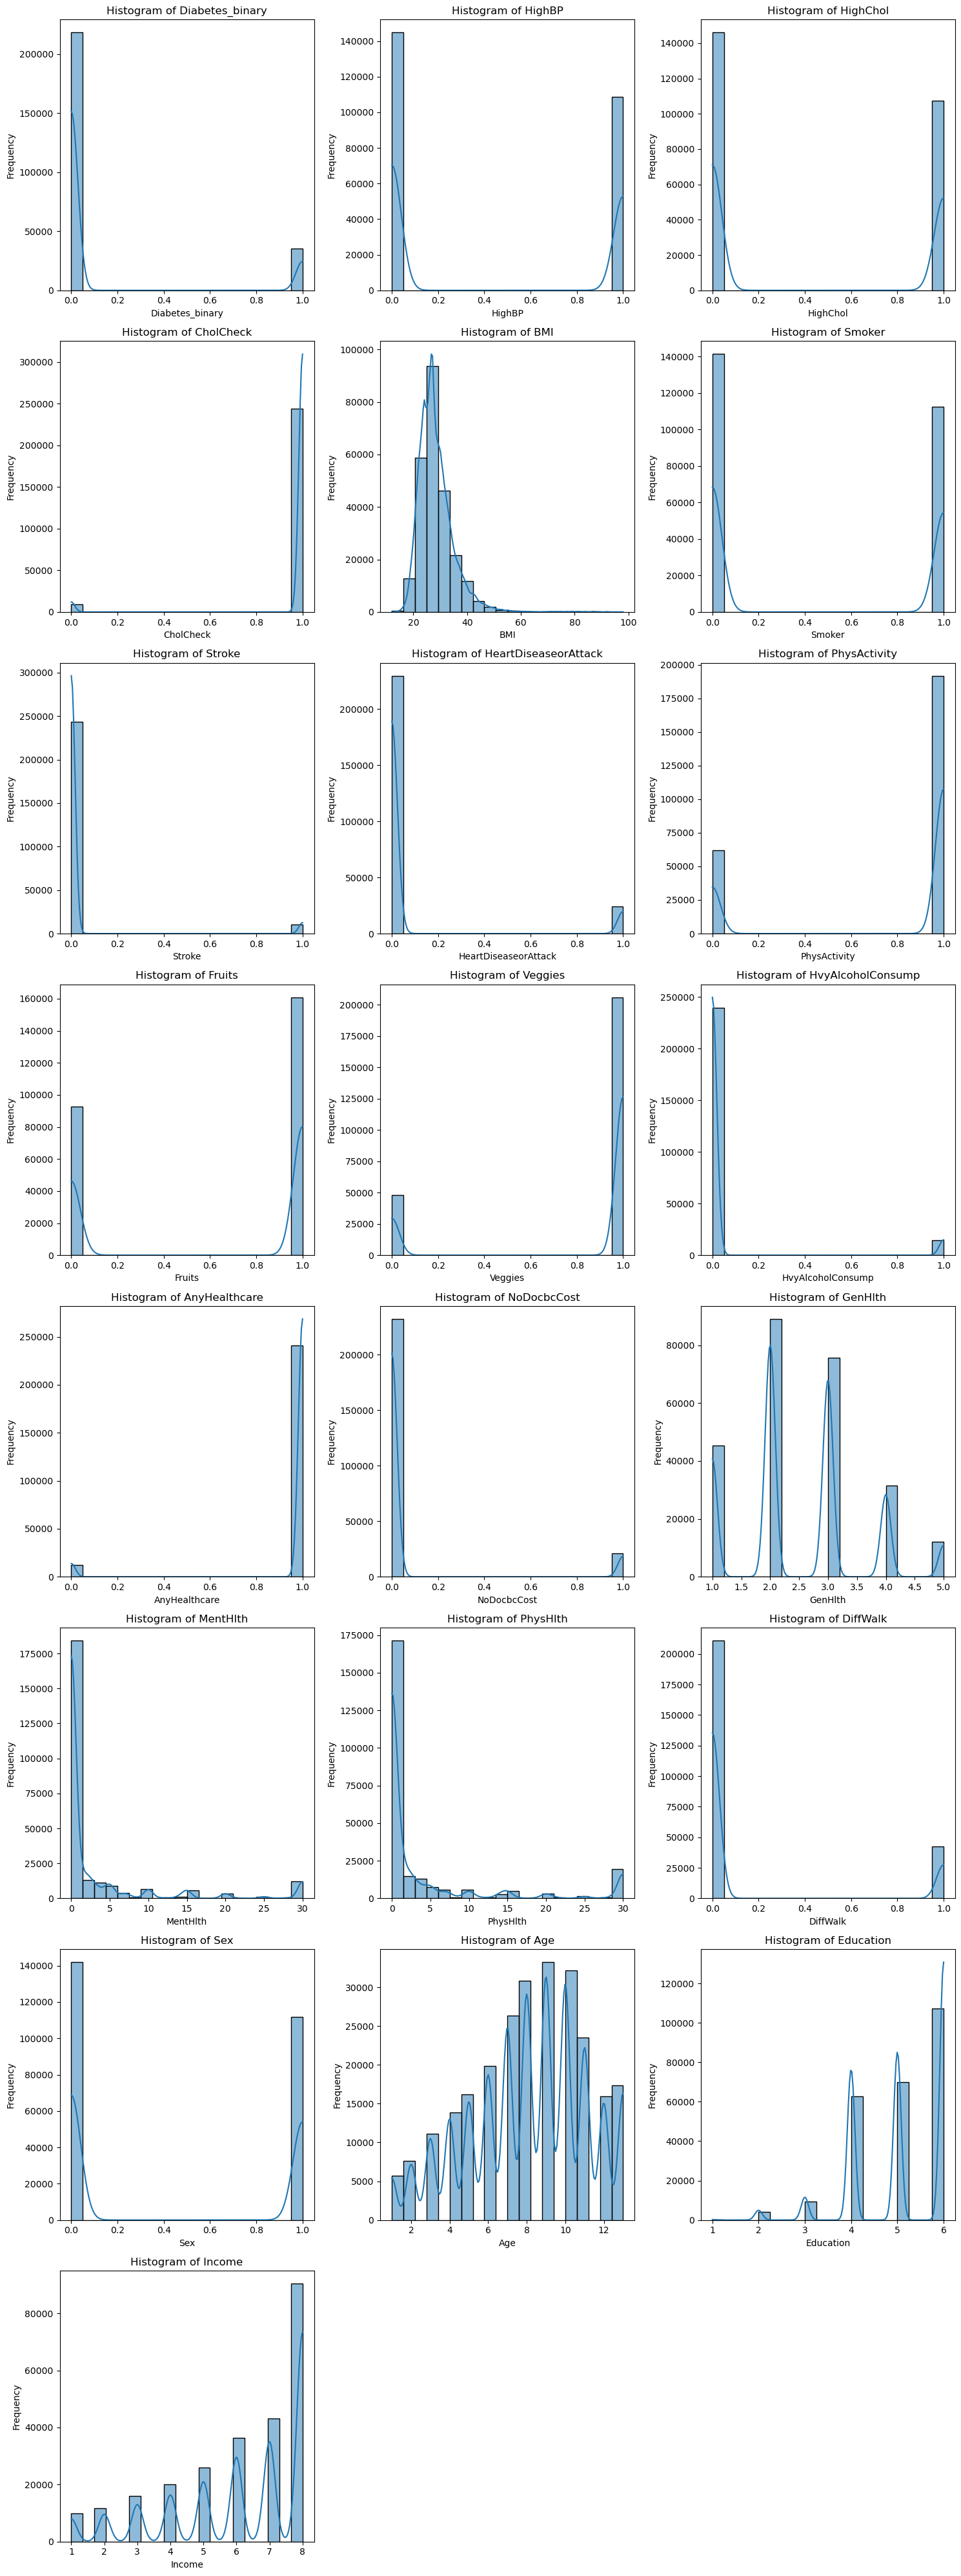

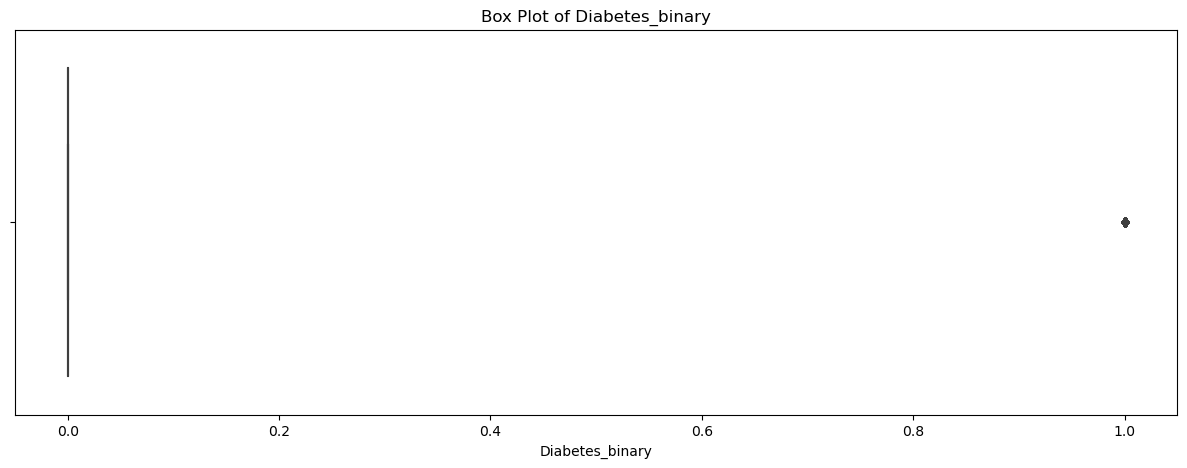

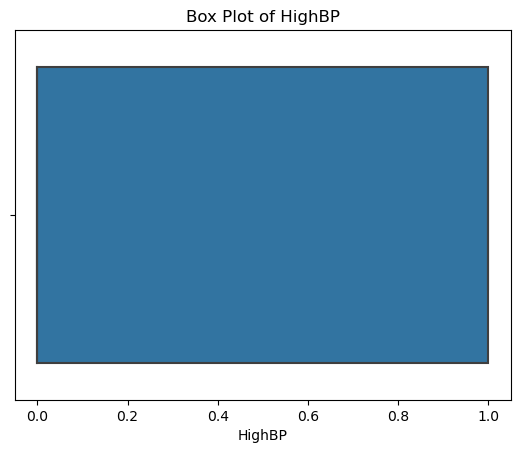

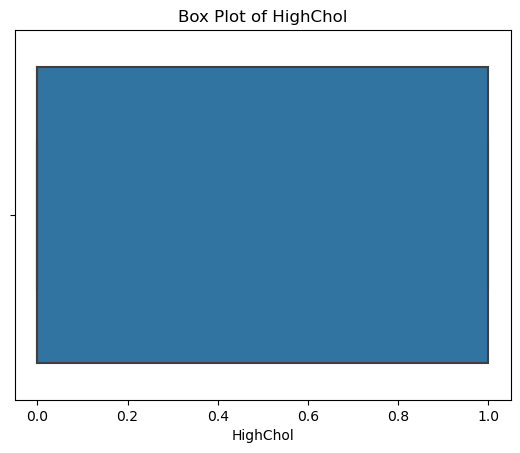

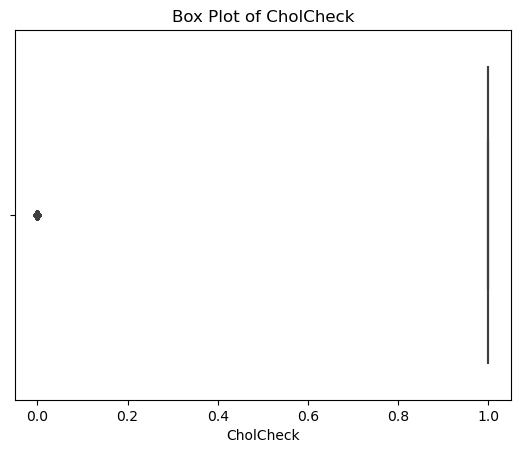

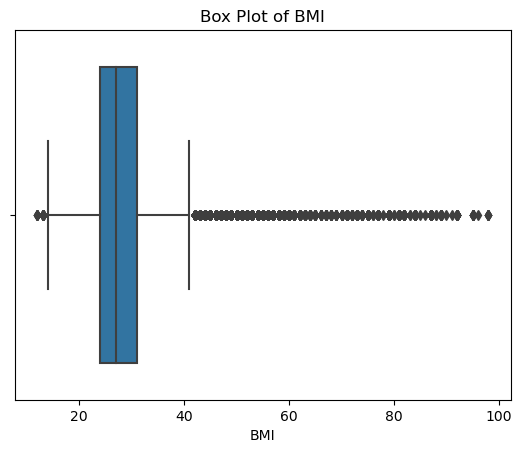

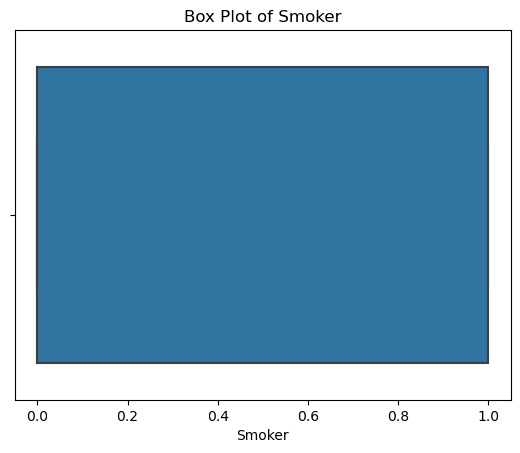

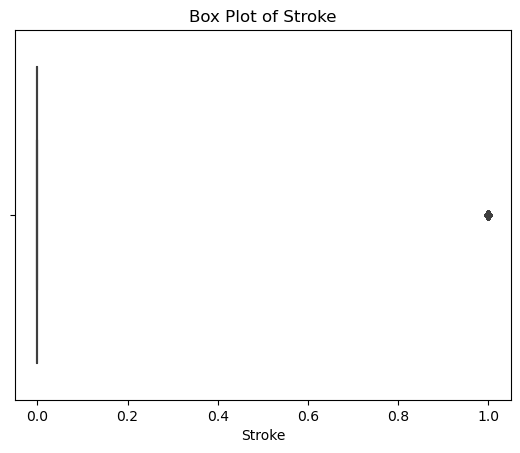

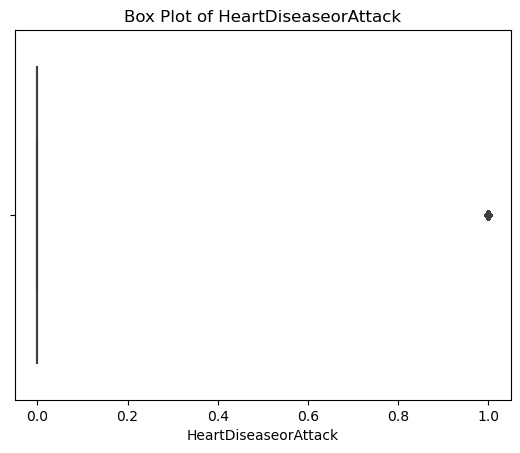

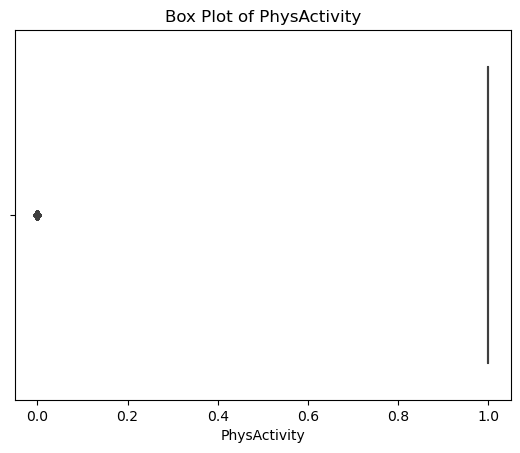

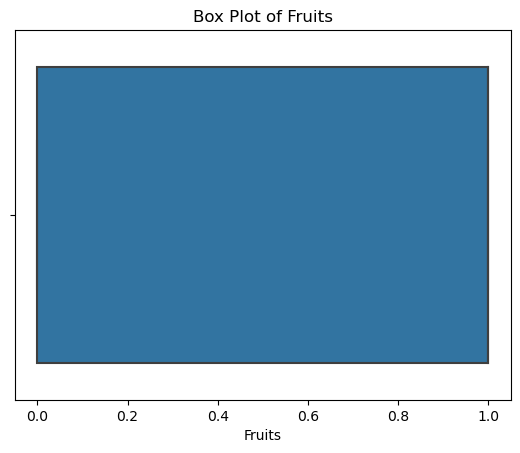

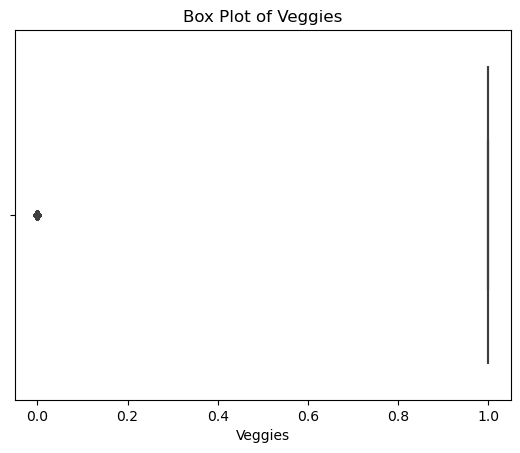

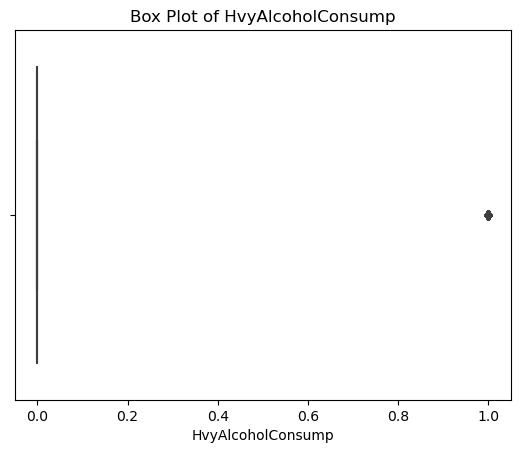

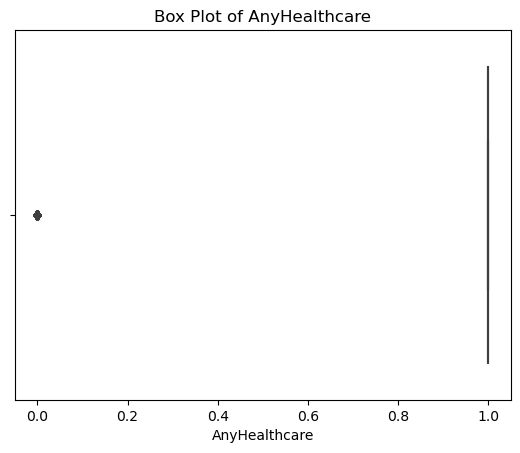

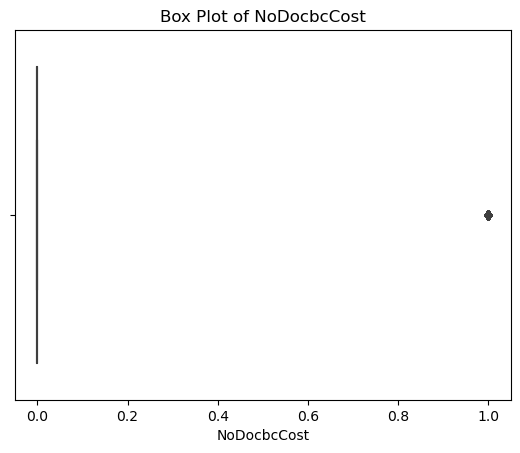

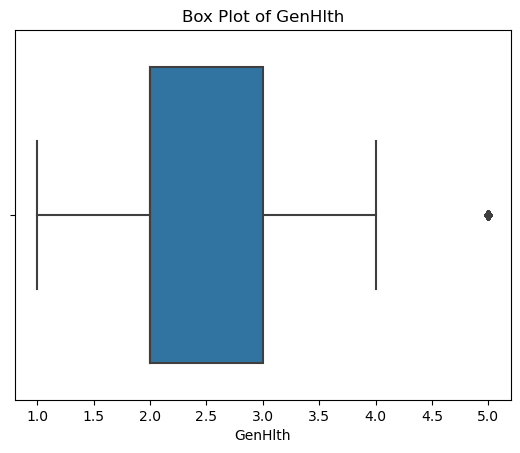

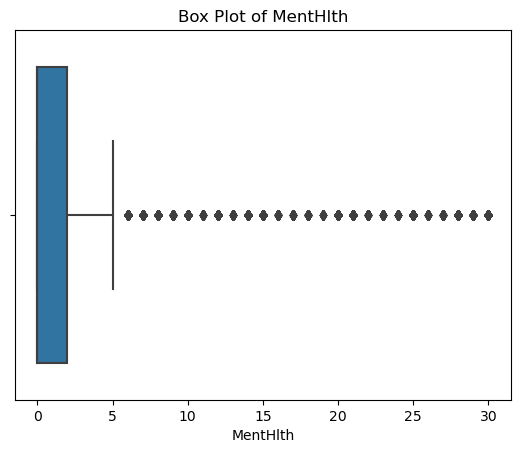

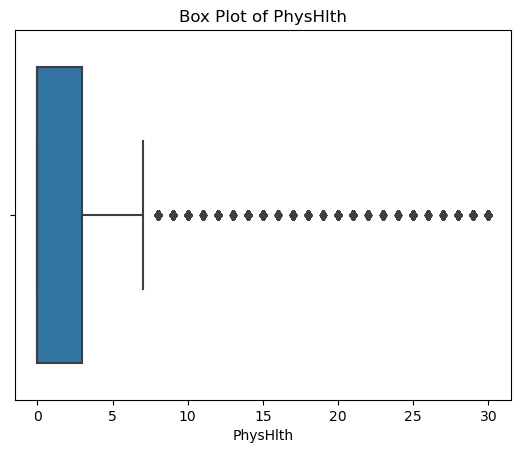

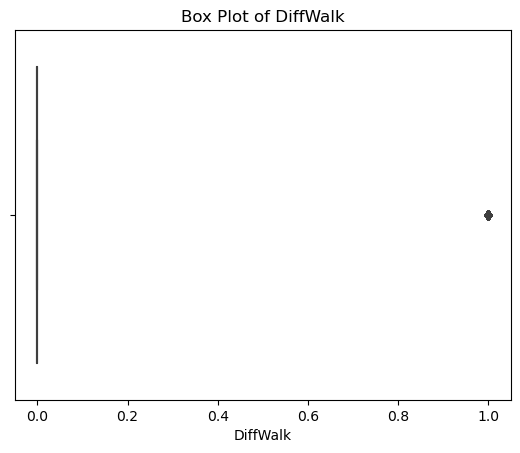

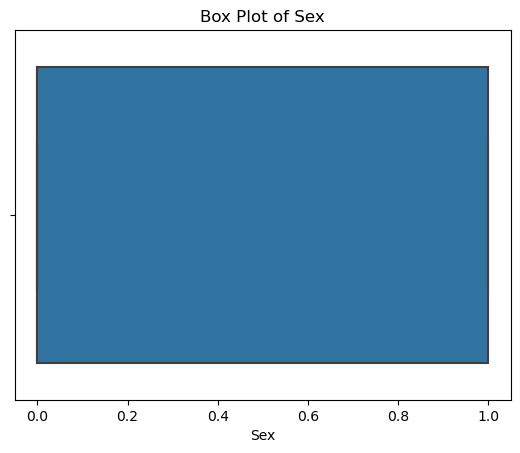

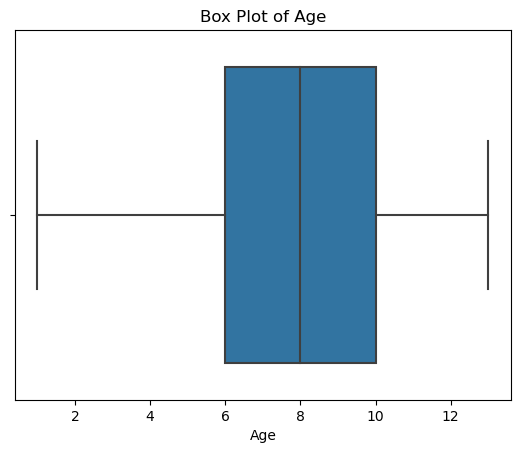

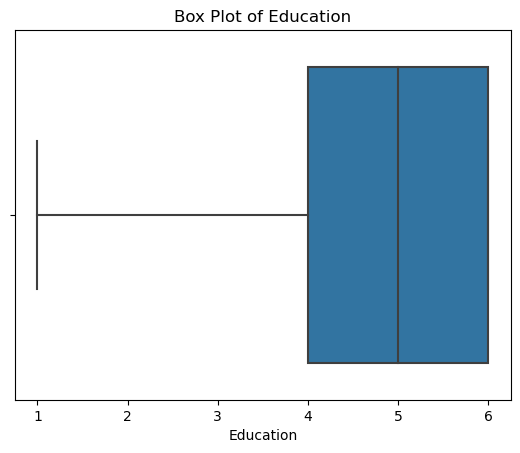

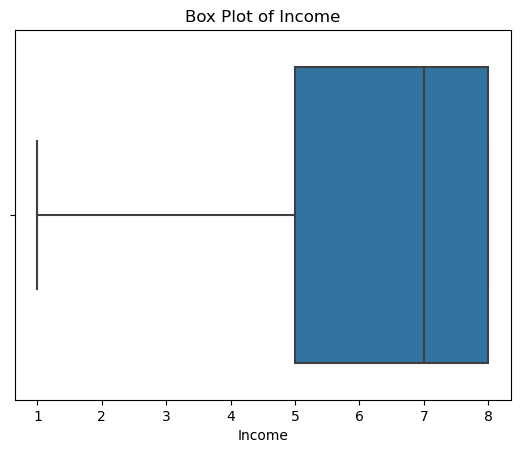

KNN with Cross Validation:
Accuracy: 0.8470119836013876
Precision: 0.4043516677711509
Recall: 0.20715215300175407
F1 Score: 0.27395517641336475

KNN without Cross Validation:
Accuracy: 0.8468740145064648
Precision: 0.39584457636265513
Recall: 0.2096612834071745
F1 Score: 0.27412874894889283


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def load_data(file_path):
    """Load the dataset from the given file path."""
    return pd.read_csv(file_path)

def clean_data(df):
    """Perform data cleaning."""
    # Handle missing values if any
    imputer = SimpleImputer(strategy='mean')
    df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    return df

def transform_data(df, target_column):
    """Perform data transformation."""
    # Encoding categorical predictor
    label_encoder = LabelEncoder()
    df[target_column] = label_encoder.fit_transform(df[target_column])
    return df

def plot_histograms_boxplots(df):
    """Plot histograms and box plots for numerical columns."""
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    num_plots = len(numerical_cols)
    rows = (num_plots + 2) // 3
    fig, axes = plt.subplots(rows, 3, figsize=(15, 5*rows))
    axes = axes.flatten()

    for i, column in enumerate(numerical_cols):
        sns.histplot(data=df[column], bins=20, kde=True, ax=axes[i])
        axes[i].set_title(f'Histogram of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')

    for j in range(i + 1, len(axes)):
        axes[j].remove()

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(15, 5))
    for i, column in enumerate(numerical_cols):
        sns.boxplot(x=df[column])
        plt.title(f'Box Plot of {column}')
        plt.xlabel(column)
        plt.show()

def knn_classification(filename, target_column):
    """Perform KNN classification with and without cross-validation."""
    # Step 1: Load data
    data = load_data(filename)

    # Step 2: Data preprocessing
    data_cleaned = clean_data(data)
    data_transformed = transform_data(data_cleaned, target_column)

    # Step 3: Visualize histograms and box plots
    plot_histograms_boxplots(data_transformed)

    # Step 4: Splitting into features and target
    X = data_transformed.drop(columns=[target_column])
    y = data_transformed[target_column]

    # Step 5: Standardizing features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Step 6: KNN with Cross Validation
    knn_cv = KNeighborsClassifier()
    cv_y_pred = cross_val_predict(knn_cv, X_scaled, y, cv=5)
    cv_accuracy = accuracy_score(y, cv_y_pred)
    cv_precision = precision_score(y, cv_y_pred)
    cv_recall = recall_score(y, cv_y_pred)
    cv_f1 = f1_score(y, cv_y_pred)

    # Step 7: KNN without Cross Validation
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Step 8: Print results
    print("KNN with Cross Validation:")
    print("Accuracy:", cv_accuracy)
    print("Precision:", cv_precision)
    print("Recall:", cv_recall)
    print("F1 Score:", cv_f1)
    print("\nKNN without Cross Validation:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

# Example usage:
filename = "diabetes_binary_health_indicators_BRFSS2015.csv"
target_column = "Diabetes_binary"
knn_classification(filename, target_column)


Logistic Regression Results:
Accuracy: 0.865874329864396
Precision: 0.5451977401129944
Recall: 0.16549949978562242
F1 Score: 0.25391952636772286


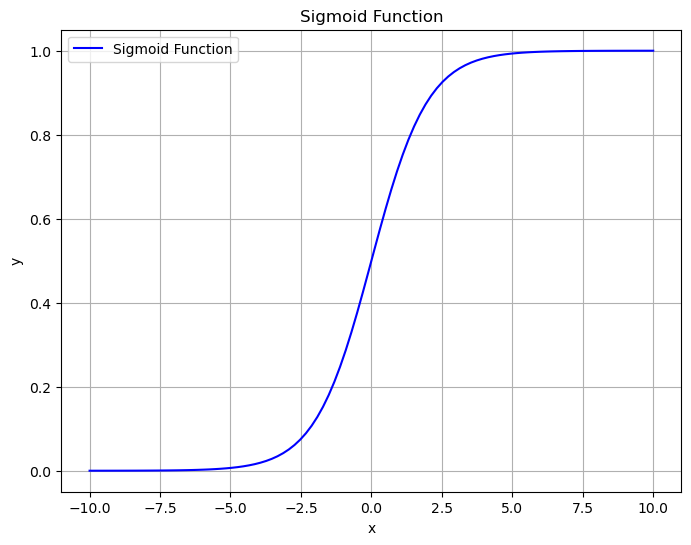

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

def logistic_regression(filename):
    # Import data
    data = pd.read_csv(filename)
    
    # Encoding categorical predictor
    label_encoder = LabelEncoder()
    data['Diabetes_binary'] = label_encoder.fit_transform(data['Diabetes_binary'])
    
    # Handling missing values if any
    imputer = SimpleImputer(strategy='mean')
    data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
    
    # Splitting into features and target
    X = data.drop('Diabetes_binary', axis=1)
    y = data['Diabetes_binary']
    
    # Standardizing features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Logistic Regression
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Model evaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Print results
    print("Logistic Regression Results:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    
    # Generate sigmoid graph
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    # Generate values for x
    x = np.linspace(-10, 10, 100)

    # Calculate corresponding y values using sigmoid function
    y = sigmoid(x)

    # Plot sigmoid function
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label='Sigmoid Function', color='blue')
    plt.title('Sigmoid Function')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
filename = "diabetes_binary_health_indicators_BRFSS2015.csv"
logistic_regression(filename)


### Interpretation

The Diabetes dataset is a collection of health-related features that aim to predict the likelihood of an individual having diabetes.  The target variable, "Diabetes_binary," indicates whether an individual has been diagnosed with diabetes or not, with values of 0 representing absence and 1 indicating presence of diabetes. The dataset is designed to facilitate the prediction of diabetes based on a combination of health and lifestyle factors.The dataset has 70693 rows and 21 columns. 

1) KNN with Cross Validation:
Accuracy: The model correctly predicts the class of approximately 84.70% of the samples in the dataset when using cross-validation. This high accuracy score indicates that the model performs well in classifying both classes (positive and negative).
Precision: Out of all the samples predicted as positive by the model, approximately 40.44% are actually positive. This precision score suggests that when the model predicts a sample as positive, it's moderately likely to be correct.
Recall: The model identifies around 20.72% of all actual positive samples. This recall score indicates that the model captures a small portion of the positive samples in the dataset.
F1 Score: The harmonic mean of precision and recall, which is approximately 27.40%, indicates a moderate balance between precision and recall. This suggests that the model has a moderate overall performance in terms of both precision and recall.

2) KNN without Cross Validation:
Accuracy: The accuracy without cross-validation is slightly lower compared to cross-validation, at around 84.69%. However, it's still a reasonably high accuracy score.
Precision: The precision without cross-validation is approximately 39.58%, indicating that out of all the samples predicted as positive, 39.58% are actually positive.
Recall: The recall without cross-validation is also around 20.97%, meaning the model identifies 20.97% of all actual positive samples.
F1 Score: The F1 score without cross-validation is approximately 27.41%, indicating a moderate balance between precision and recall.

3) Conclusion:
The KNN model with cross-validation generally performs better across all metrics compared to the model without cross-validation. This indicates that cross-validation helps in improving the model's generalization ability and reduces overfitting. The model with cross-validation has higher accuracy, precision, recall, and F1 score, suggesting that it is better at classifying both classes (positive and negative) and has a better balance between precision and recall. Therefore, it's advisable to use the KNN model with cross-validation for this dataset, as it provides more reliable and robust results.

4) Logistic Regression
-- Accuracy: The logistic regression model achieved an accuracy of approximately 86.59%. This indicates that about 86.59% of the predictions made by the model were correct.
-- Precision: The precision of the logistic regression model is around 54.52%. Precision represents the ratio of true positive predictions to the total number of positive predictions made by the model. In other words, out of all instances predicted as positive by the model, about 54.52% were actually positive.
-- Recall: The recall score for logistic regression is approximately 16.55%. Recall measures the ratio of true positive predictions to the total number of actual positives in the data. In this case, the model correctly identified around 16.55% of all actual positive instances.
-- F1 Score: The F1 score, which is the harmonic mean of precision and recall, is approximately 25.39%. It provides a balance between precision and recall. A higher F1 score indicates better performance, considering both precision and recall.

5) Logistic Regression  in comparison with KNN
Accuracy Comparison: Logistic regression outperforms both KNN models in terms of accuracy. It has the highest accuracy among the three models.
Precision Comparison: Logistic regression also has higher precision compared to both KNN models. This indicates that logistic regression is better at correctly identifying positive instances compared to KNN.
Recall Comparison: While logistic regression has a lower recall compared to both KNN models, it's important to note that recall alone doesn't necessarily reflect the overall performance of the model. Logistic regression might have sacrificed recall for higher precision, resulting in a better balance depending on the specific needs of the task.
F1 Score Comparison: Logistic regression has a slightly higher F1 score compared to both KNN models. This suggests that logistic regression achieves a better balance between precision and recall compared to KNN.

In conclusion, the logistic regression model demonstrates superior performance compared to both KNN models, exhibiting higher accuracy, precision, and F1 score. Despite having a lower recall than the KNN models, logistic regression achieves a better balance between precision and recall, which is reflected in its higher F1 score. This suggests that logistic regression is better suited for diabetes prediction, providing more reliable predictions with fewer false positives. 

## Academic Stress Data

In [27]:
import pandas as pd
data=pd.read_csv("data.csv",sep=';')
data

Marital status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance\t  Previous qualification  \
0                                1                       1   
1                                1                       1   
2                                1                       1   
3                                1                       1   
4                                0                       1   
...                            ...                     ...   
4419                             1                       1   
4420                             1                       1   
4421                             1                       1   
4422                             1                       1   
4423                             1                       1   

      Previous qualification (grade)  Nacionality  Mother's qualification  \
0                              122.0            1                      19   
1                              160.0            1                       1   
2                              122.0            1                      37   
3                              122.0            1                      38   
4                              100.0            1                      37   
...                              ...          ...                     ...   
4419                           125.0            1                       1   
4420                           120.0          105                       1   
4421                           154.0            1                      37   
4422                           180.0            1                      37   
4423                           152.0           22                      38   

      Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                         12  ...                                    0   
1                          3  ...                                    0   
2                         37  ...                                    0   
3                         37  ...                                    0   
4                         38  ...                                    0   
...                      ...  ...                                  ...   
4419                       1  ...                                    0   
4420                       1  ...                                    0   
4421                      37  ...                                    0   
4422                      37  ...                                    0   
4423                      37  ...                                    0   

      Curricular units 2nd sem (enrolled)  \
0                                       0   
1                                       6   
2                                       6   
3                                       6   
4                                       6   
...                                   ...   
4419                                    6   
4420                                    6   
4421                                    8   
4422                                    5   
4423                                    6   

      Curricular units 2nd sem (evaluations)  \
0                            

In [23]:
data.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

C:\Users\Microsoft\AppData\Local\Temp\ipykernel_2068\3335316670.py:54: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
C:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


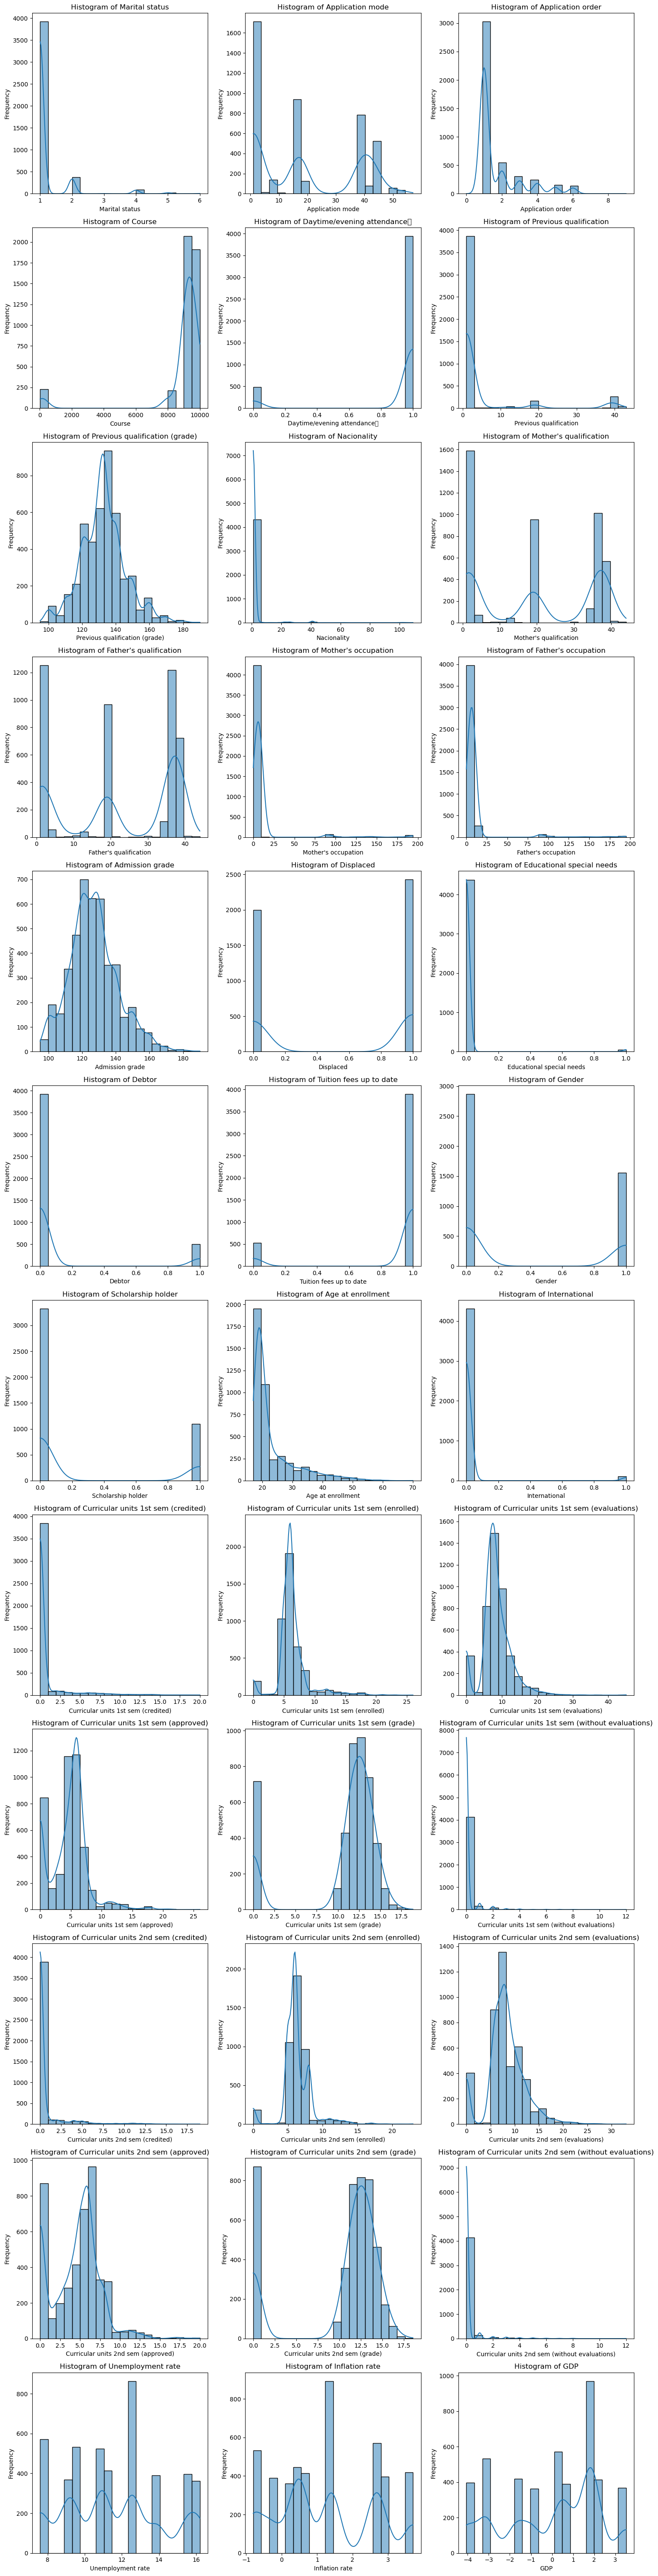

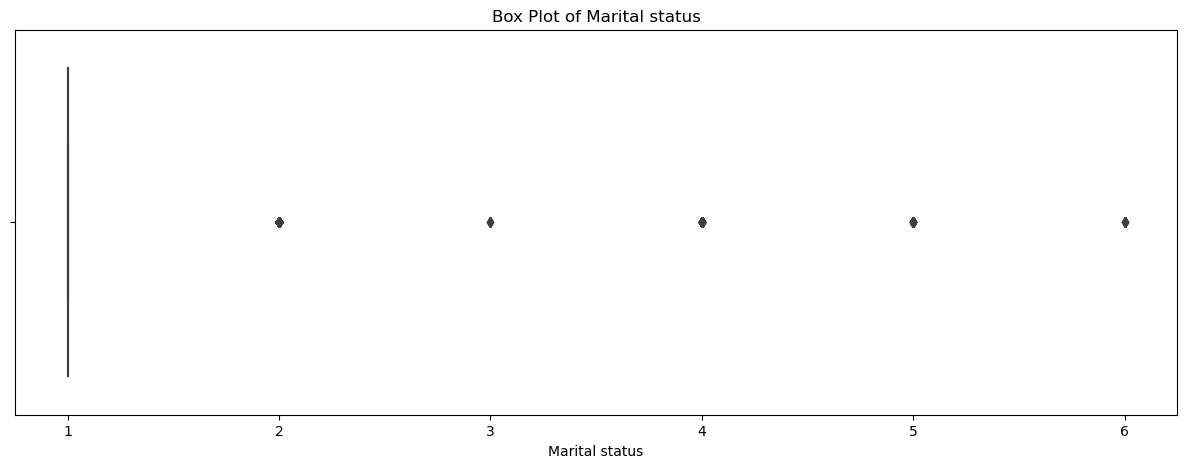

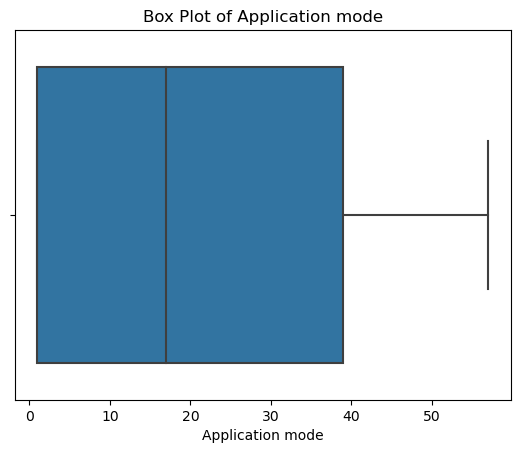

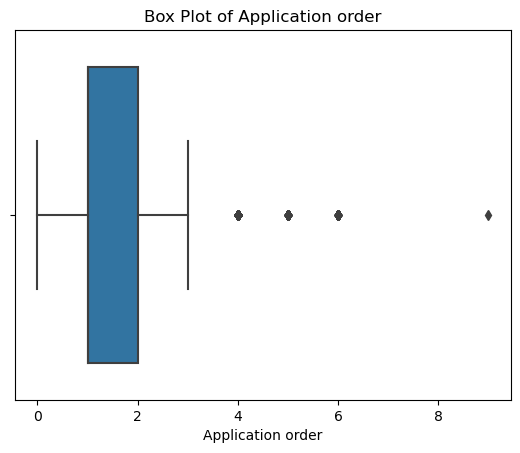

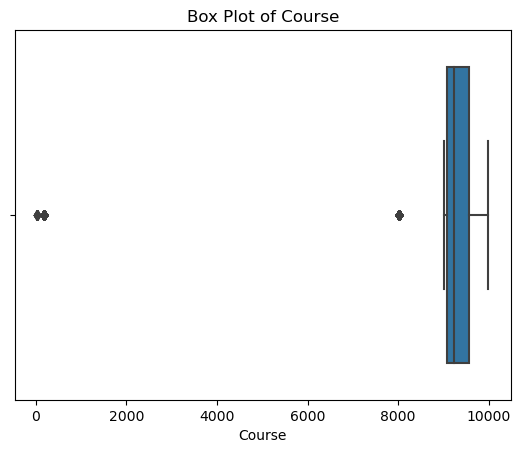

C:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


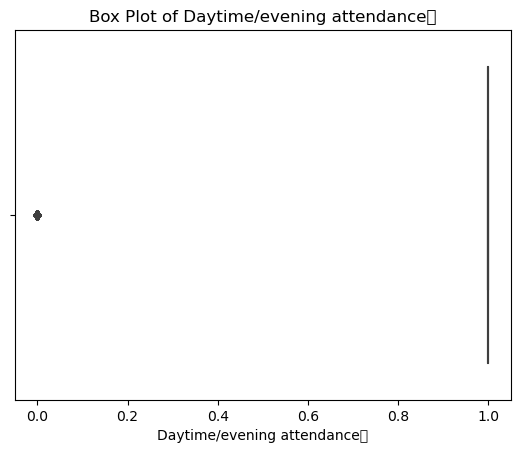

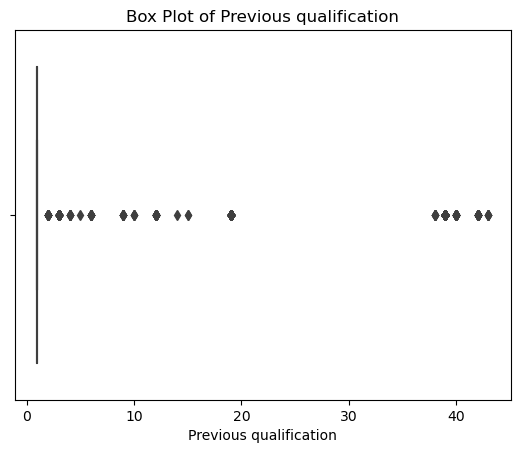

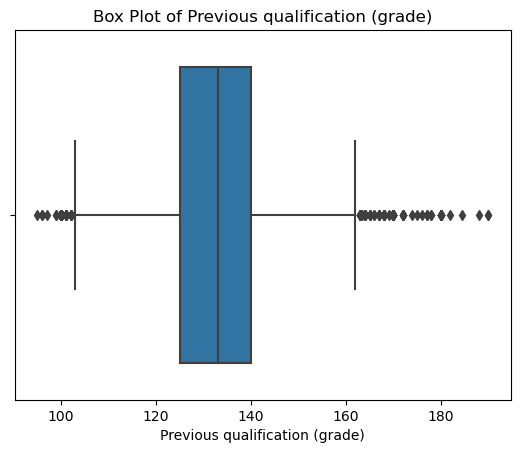

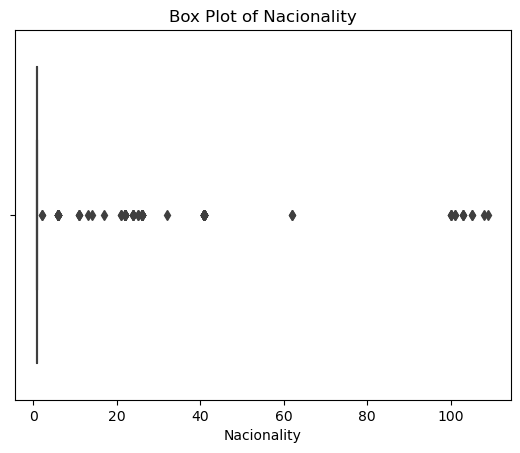

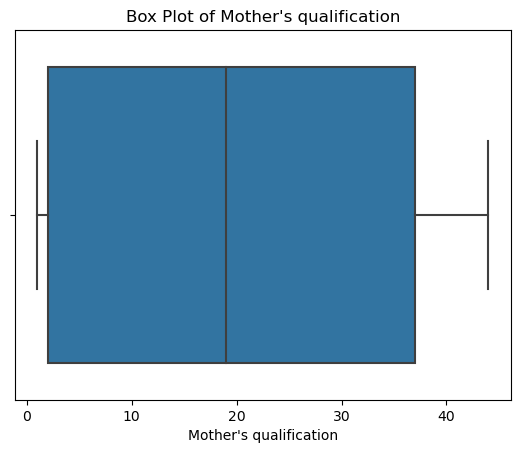

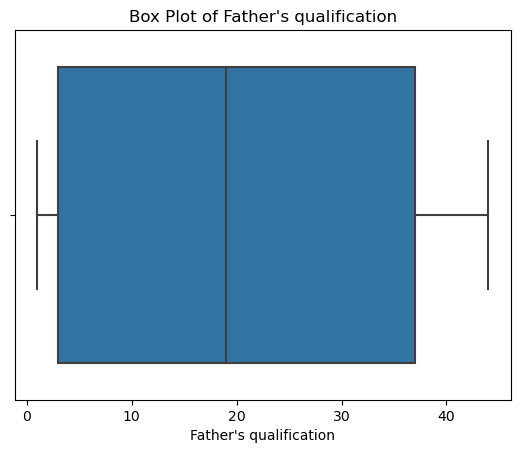

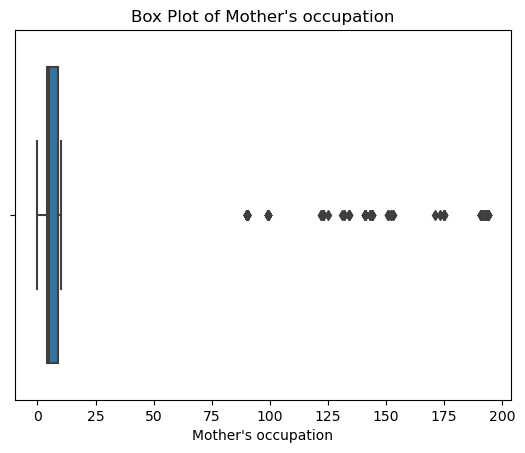

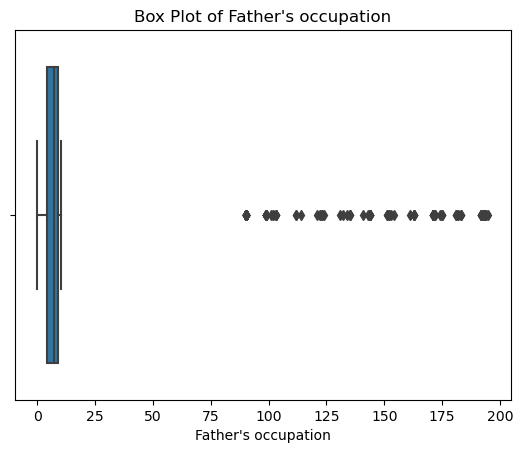

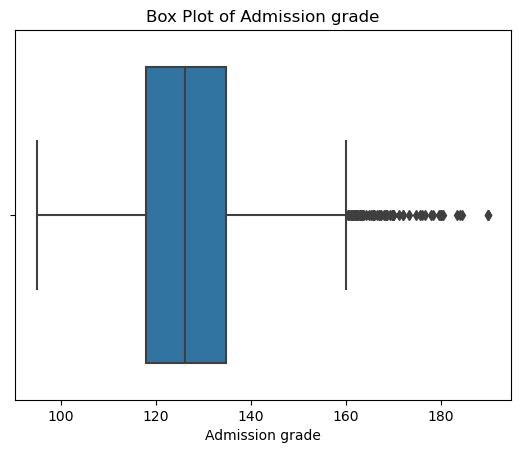

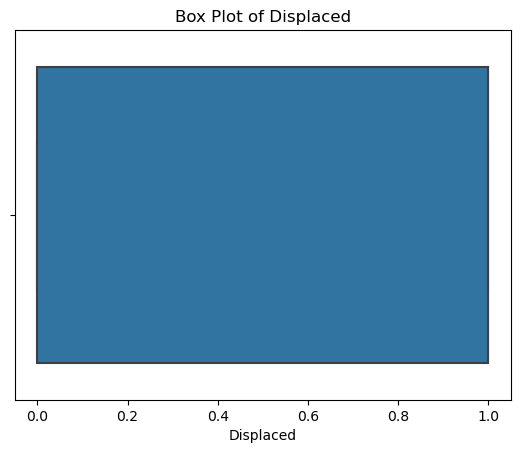

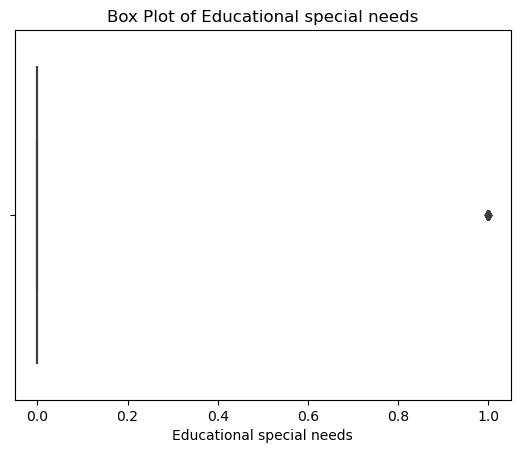

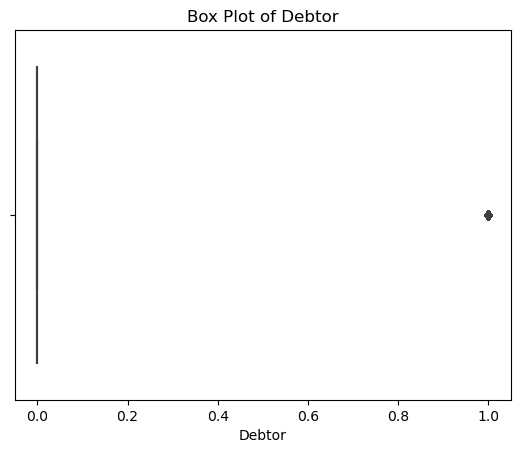

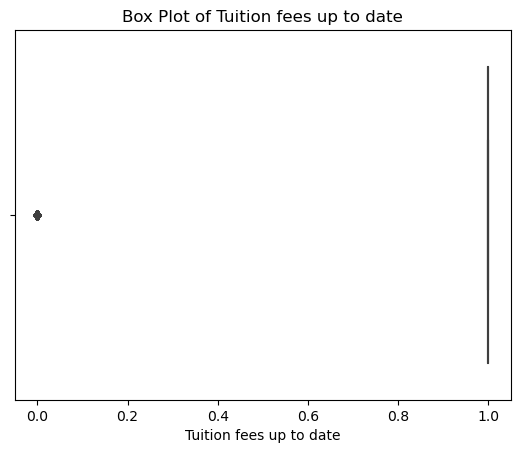

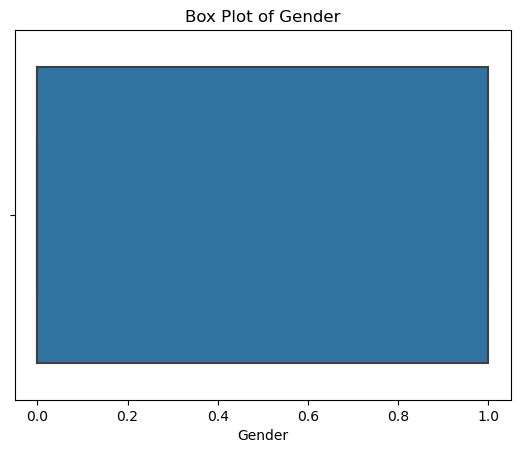

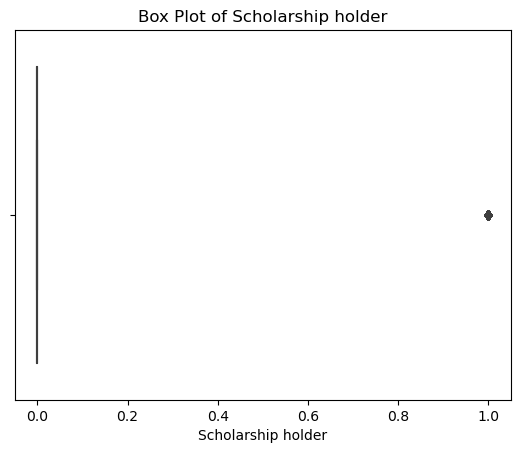

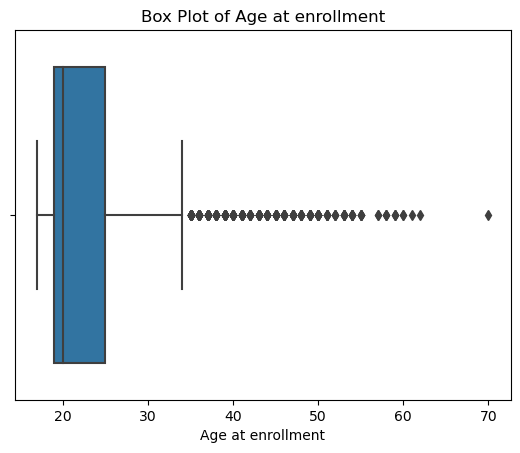

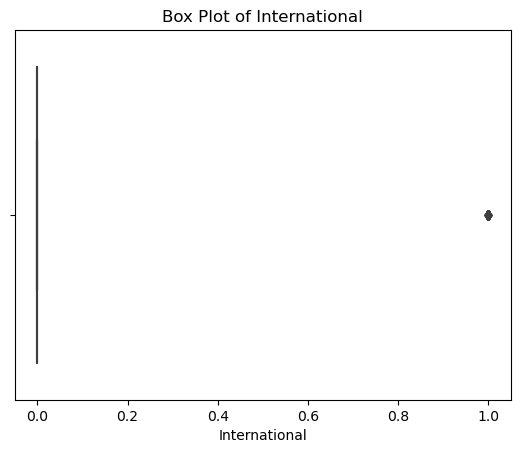

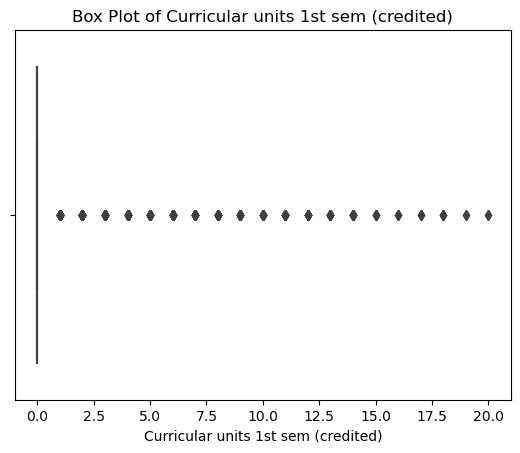

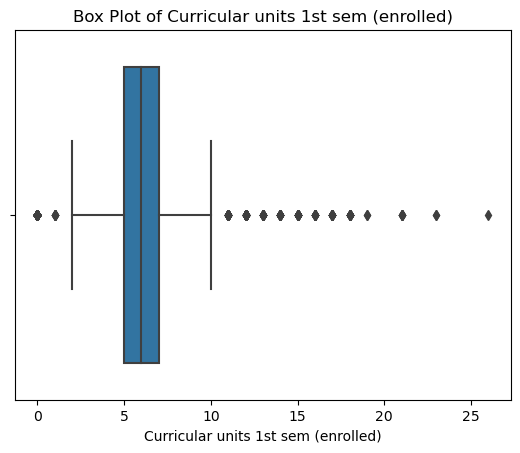

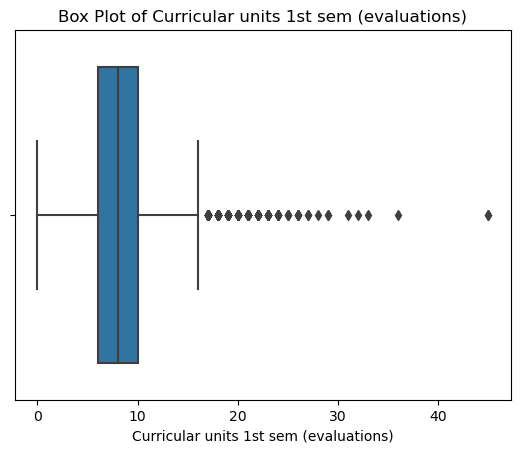

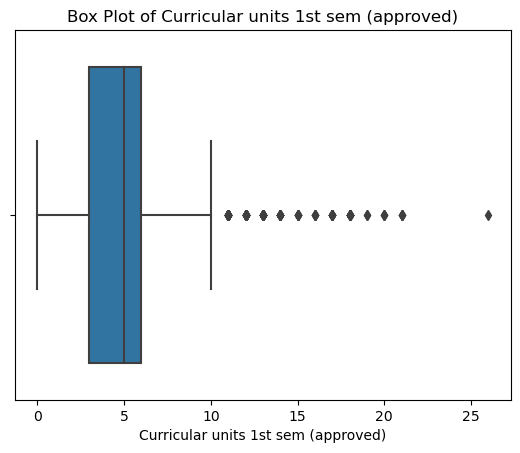

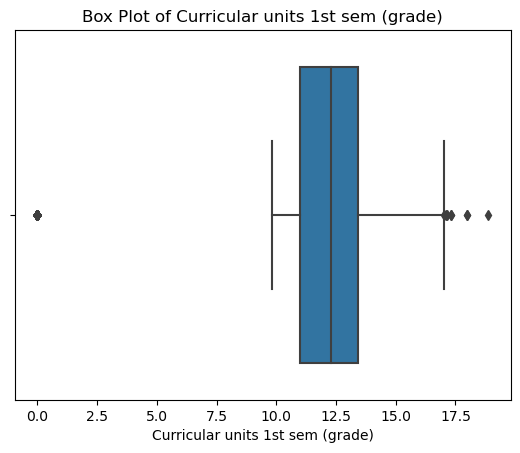

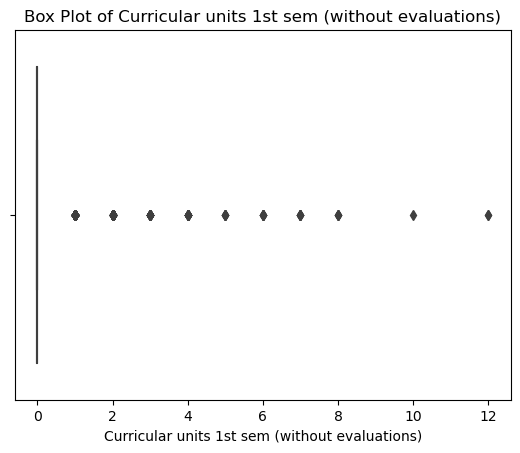

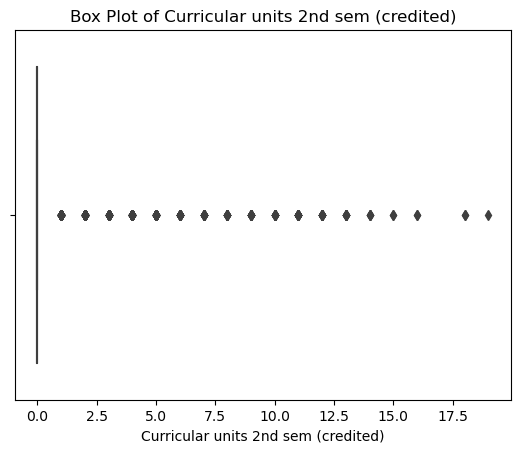

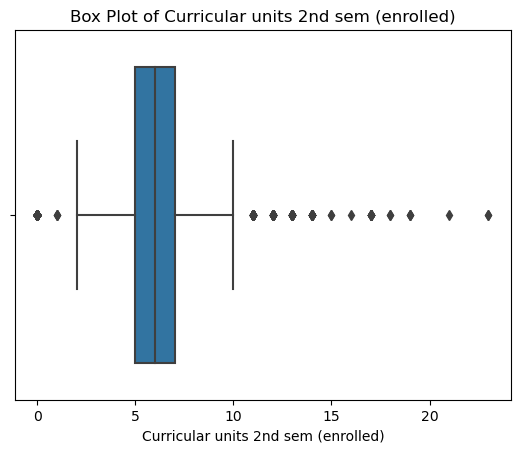

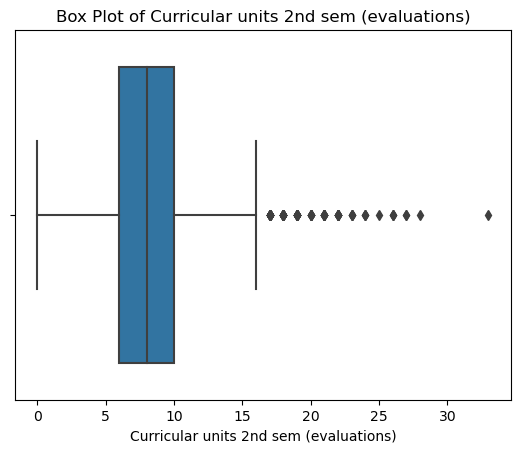

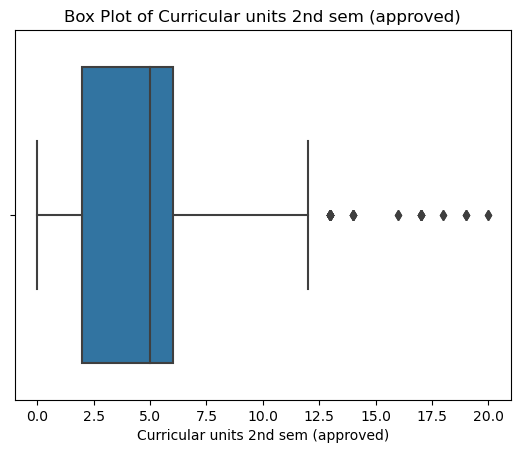

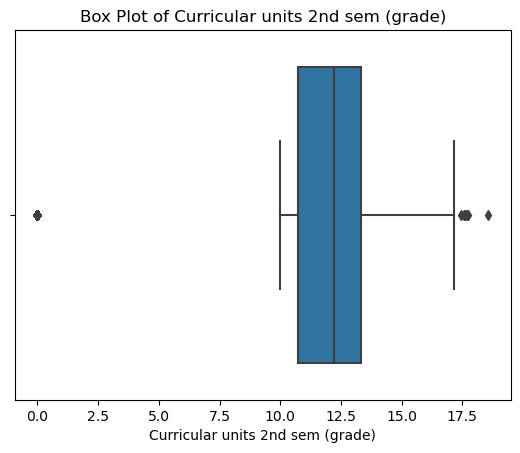

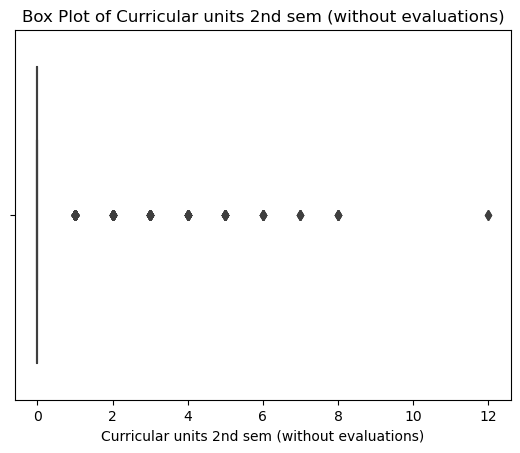

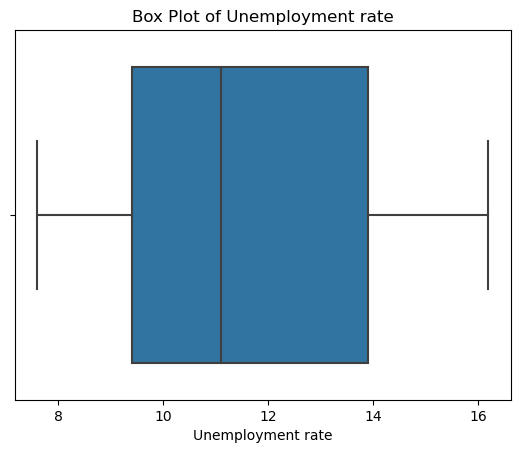

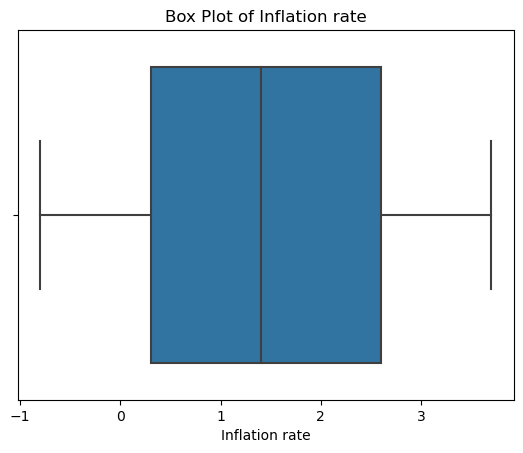

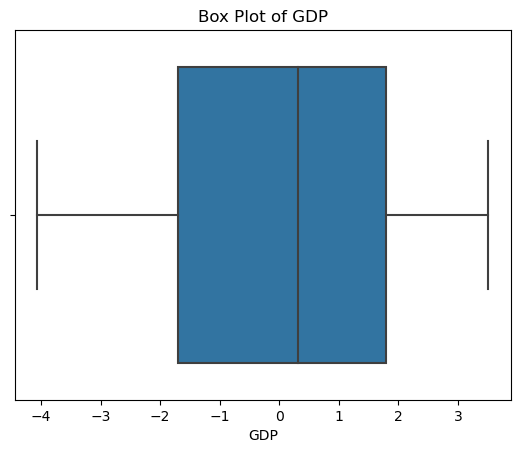

KNN with Cross Validation:
Accuracy: 0.701627486437613
Precision: 0.6854252553568639
Recall: 0.701627486437613
F1 Score: 0.688906928356626

KNN without Cross Validation:
Accuracy: 0.6983050847457627
Precision: 0.6890857424347203
Recall: 0.6983050847457627
F1 Score: 0.6879032036785758

Classification Report for KNN with Cross Validation:
              precision    recall  f1-score   support

     Class 0       0.77      0.69      0.73      1421
     Class 1       0.39      0.28      0.33       794
     Class 2       0.74      0.86      0.79      2209

    accuracy                           0.70      4424
   macro avg       0.63      0.61      0.62      4424
weighted avg       0.69      0.70      0.69      4424


Classification Report for KNN without Cross Validation:
              precision    recall  f1-score   support

     Class 0       0.80      0.68      0.74       316
     Class 1       0.37      0.28      0.32       151
     Class 2       0.72      0.86      0.78       418

    a

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def load_data(file_path):
    """Load the dataset from the given file path."""
    return pd.read_csv(file_path, sep=';')

def clean_data(df):
    """Perform data cleaning."""
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    non_numeric_cols = df.select_dtypes(include=['object']).columns

    # Handle missing values in numeric columns
    imputer_numeric = SimpleImputer(strategy='mean')
    df[numeric_cols] = imputer_numeric.fit_transform(df[numeric_cols])

    # Handle missing values in non-numeric columns (if any)
    if not non_numeric_cols.empty:
        imputer_non_numeric = SimpleImputer(strategy='most_frequent')
        df[non_numeric_cols] = imputer_non_numeric.fit_transform(df[non_numeric_cols])

    return df

def transform_data(df, target_column):
    """Perform data transformation."""
    # Encoding categorical predictor
    label_encoder = LabelEncoder()
    df[target_column] = label_encoder.fit_transform(df[target_column])
    return df

def plot_histograms_boxplots(df):
    """Plot histograms and box plots for numerical columns."""
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    num_plots = len(numerical_cols)
    rows = (num_plots + 2) // 3
    fig, axes = plt.subplots(rows, 3, figsize=(15, 5*rows))
    axes = axes.flatten()

    for i, column in enumerate(numerical_cols):
        sns.histplot(data=df[column], bins=20, kde=True, ax=axes[i])
        axes[i].set_title(f'Histogram of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')

    for j in range(i + 1, len(axes)):
        axes[j].remove()

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(15, 5))
    for i, column in enumerate(numerical_cols):
        sns.boxplot(x=df[column])
        plt.title(f'Box Plot of {column}')
        plt.xlabel(column)
        plt.show()

def knn_classification(filename, target_column):
    """Perform KNN classification with and without cross-validation."""
    # Step 1: Load data
    data = load_data(filename)

    # Step 2: Data preprocessing
    data_cleaned = clean_data(data)
    data_transformed = transform_data(data_cleaned, target_column)

    # Step 3: Visualize histograms and box plots
    plot_histograms_boxplots(data_transformed)

    # Step 4: Splitting into features and target
    X = data_transformed.drop(columns=[target_column])
    y = data_transformed[target_column]

    # Step 5: Standardizing features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Step 6: KNN with Cross Validation
    knn_cv = KNeighborsClassifier()
    cv_y_pred = cross_val_predict(knn_cv, X_scaled, y, cv=5)
    cv_accuracy = accuracy_score(y, cv_y_pred)
    cv_precision = precision_score(y, cv_y_pred, average='weighted')
    cv_recall = recall_score(y, cv_y_pred, average='weighted')
    cv_f1 = f1_score(y, cv_y_pred, average='weighted')

    # Step 7: KNN without Cross Validation
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Step 8: Print results
    print("KNN with Cross Validation:")
    print("Accuracy:", cv_accuracy)
    print("Precision:", cv_precision)
    print("Recall:", cv_recall)
    print("F1 Score:", cv_f1)
    print("\nKNN without Cross Validation:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    # Additional: Print classification report for better insights
    print("\nClassification Report for KNN with Cross Validation:")
    print(classification_report(y, cv_y_pred, target_names=["Class 0", "Class 1", "Class 2"]))
    print("\nClassification Report for KNN without Cross Validation:")
    print(classification_report(y_test, y_pred, target_names=["Class 0", "Class 1", "Class 2"]))

# Example usage:
filename = "data.csv"
target_column = "Target"  # Change this to your actual target column name
knn_classification(filename, target_column)


Logistic Regression Results:
Accuracy: 0.752542372881356
Precision: 0.7340833505891269
Recall: 0.752542372881356
F1 Score: 0.7363081777186452


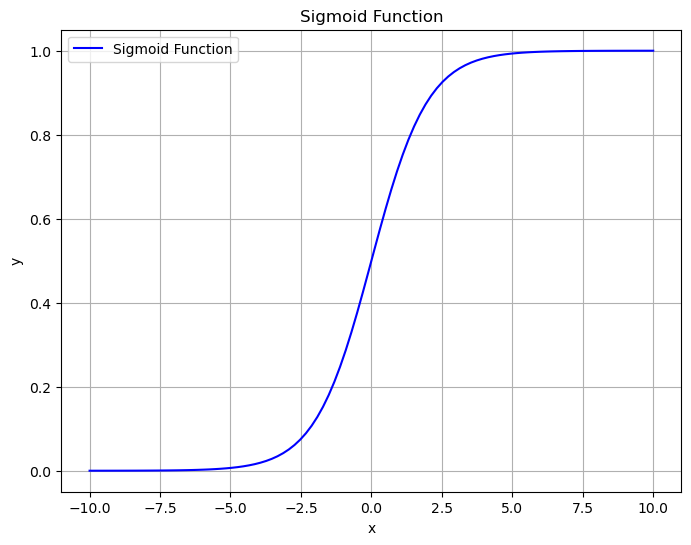

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def logistic_regression(filename, target_column):
    # Load data
    data = pd.read_csv(filename,sep=';')
    
    # Preprocessing
    label_encoder = LabelEncoder()
    data[target_column] = label_encoder.fit_transform(data[target_column])
    
    imputer = SimpleImputer(strategy='mean')
    data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
    
    X = data.drop(target_column, axis=1)
    y = data[target_column]
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Logistic Regression
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Model evaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Print results
    print("Logistic Regression Results:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    
    # Generate sigmoid graph
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    # Generate values for x
    x = np.linspace(-10, 10, 100)

    # Calculate corresponding y values using sigmoid function
    y = sigmoid(x)

    # Plot sigmoid function
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label='Sigmoid Function', color='blue')
    plt.title('Sigmoid Function')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
filename = "data.csv"  # Change this to your actual filename
target_column = "Target"  # Change this to your actual target column name
logistic_regression(filename, target_column)


The Academic Stress Data is a dataset that includes various factors related to academic stress experienced by students. The dataset aims to capture the multifaceted aspects of academic stress and its potential impact on students' academic outcomes. The target variable, labeled as "TARGET," categorizes students into three groups: "GRADUATE," "ENROLLED," and "DROPOUT," indicating their academic status. The data has 4425 rows and 36 columns. 
1) KNN with Cross Validation:
The model exhibits an accuracy of approximately 70.16% when predicting the class labels using cross-validation. This high accuracy score signifies the model's proficiency in classifying both positive and negative classes. In terms of precision, around 68.54% of the samples predicted as positive by the model are actually positive. This precision score indicates a moderate likelihood of correctness when the model identifies a sample as positive. Moreover, the recall metric reveals that the model manages to identify about 70.16% of all actual positive samples, capturing a substantial portion of positive instances in the dataset. Additionally, the F1 score, which is approximately 68.89%, demonstrates a reasonable balance between precision and recall, suggesting a moderate overall performance in classifying both classes.

2) KNN without Cross Validation:
In the absence of cross-validation, the model's accuracy slightly decreases to around 69.83%. Regarding precision, approximately 68.91% of the samples predicted as positive by the model are indeed positive, indicating a similar level of correctness compared to the cross-validated model. The recall metric shows that the model identifies around 69.83% of all actual positive samples, demonstrating consistency with the cross-validated approach. Moreover, the F1 score, which is approximately 68.79%, indicates a comparable balance between precision and recall, suggesting a similar overall performance to the cross-validated model.

3) Conclusion:
Comparing both approaches, the KNN model with cross-validation consistently outperforms the model without cross-validation across all metrics. This improvement underscores the effectiveness of cross-validation in enhancing the model's generalization ability and reducing overfitting. The cross-validated model achieves higher accuracy, precision, recall, and F1 score, indicating superior performance in classifying both positive and negative classes and achieving a better balance between precision and recall. Hence, it is recommended to utilize the KNN model with cross-validation for this dataset, as it provides more reliable and robust results.However, measures still need to be taken since the score of accuracy is low in general and will reduce even more when aplied to live stream. therefore, either a different algorithm should be tried, parameteres should be tunes, filters must be selected etc. 

4) Logistic Regression:

The logistic regression model achieves an accuracy of approximately 75.25%, indicating a moderate level of success in predicting class labels.The model demonstrates the highest precision and recall for class 2 (Graduate), suggesting it is more adept at correctly identifying graduate instances.
Conversely, the model struggles to accurately predict class 1 (Dropout), with the lowest precision and recall scores.
Overall, while the precision and recall vary across classes, the model shows a promising level of accuracy in predicting academic stress outcomes.

5) Comparison with KNN:
Comparing logistic regression with KNN, logistic regression achieves a marginally higher accuracy of 75.25% compared to the knn model. Precision, recall, and F1-scores exhibit variations across classes. Logistic regression generally performs better for class 2 (Graduate) and faces challenges with class 1 (Dropout).

In contrast, KNN may offer a different balance between precision and recall, potentially providing a more nuanced approach to classification. Therefore, the choice between logistic regression and KNN should consider the specific dataset characteristics and task requirements. Further analysis, such as cross-validation and hyperparameter tuning, can refine model performance and ensure robustness in predictive tasks.

# Regression Data 

## Life Expectancy

In [1]:
import pandas as pd

In [20]:
data=pd.read_csv("Regression.Life.Expectancy.csv")
data

Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01               71.279624         65.0      1154   
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2933             27     4.36                0.000000         68.0        31   
2934             26     4.06                0.000000          7.0       998   
2935             25     4.43                0.000000         73.0       304   
2936             25     1.72                0.000000         76.0       529   
2937             24     1.68                0.000000         79.0      1483   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0     ...    6.0               8.16         65.0        0.1  584.259210   
1     ...   58.0               8.18         62.0        0.1  612.696514   
2     ...   62.0               8.13         64.0        0.1  631.744976   
3     ...   67.0               8.52         67.0        0.1  669.959000   
4     ...   68.0               7.87         68.0        0.1   63.537231   
...   ...    ...                ...          ...        ...         ...   
2933  ...   67.0               7.13         65.0       33.6  454.366654   
2934  ...    7.0               6.52         68.0       36.7  453.351155   
2935  ...   73.0               6.53         71.0       39.8   57.348340   
2936  ...   76.0               6.16         75.0       42.1  548.587312   
2937  ...   78.0               7.10         78.0       43.5  547.358878   

      Population   thinness  1-19 years   thinness 5-9 years  \
0     33736494.0                   17.2                 17.3   
1       327582.0                   17.5                 17.5   
2     31731688.0                   17.7                 17.7   
3      3696958.0                   17.9                 18.0   
4      2978599.0                   18.2                 18.2   
...          ...                    ...                  ...   
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427      

In [3]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

C:\Users\Microsoft\AppData\Local\Temp\ipykernel_9324\152762418.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target_column] = label_encoder.fit_transform(df[target_column])


              Year  Life expectancy   Adult Mortality  infant deaths  \
count  1649.000000       1649.000000      1649.000000    1649.000000   
mean   2007.840509         69.302304       168.215282      32.553062   
std       4.087711          8.796834       125.310417     120.847190   
min    2000.000000         44.000000         1.000000       0.000000   
25%    2005.000000         64.400000        77.000000       1.000000   
50%    2008.000000         71.700000       148.000000       3.000000   
75%    2011.000000         75.000000       227.000000      22.000000   
max    2015.000000         89.000000       723.000000    1600.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  1649.000000             1649.000000  1649.000000    1649.000000   
mean      4.533196              698.973558    79.217708    2224.494239   
std       4.029189             1759.229336    25.604664   10085.802019   
min       0.010000                0.000000     2.000000

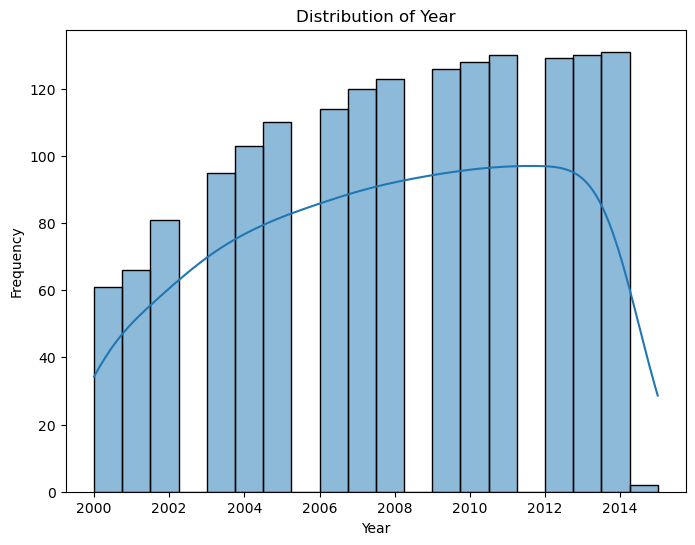

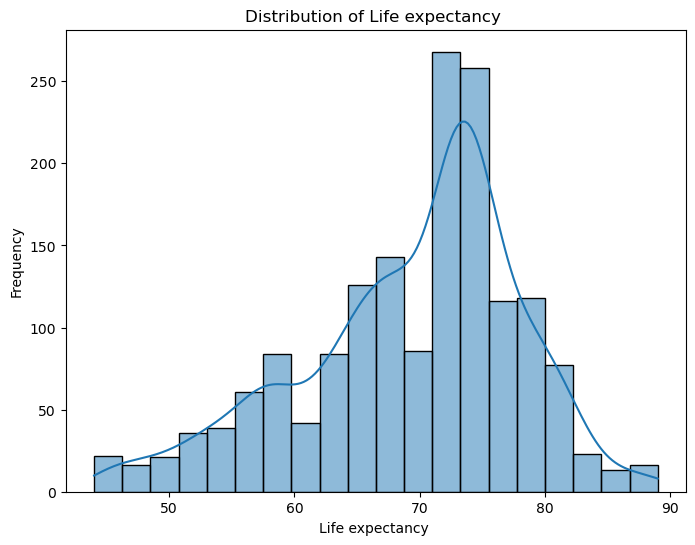

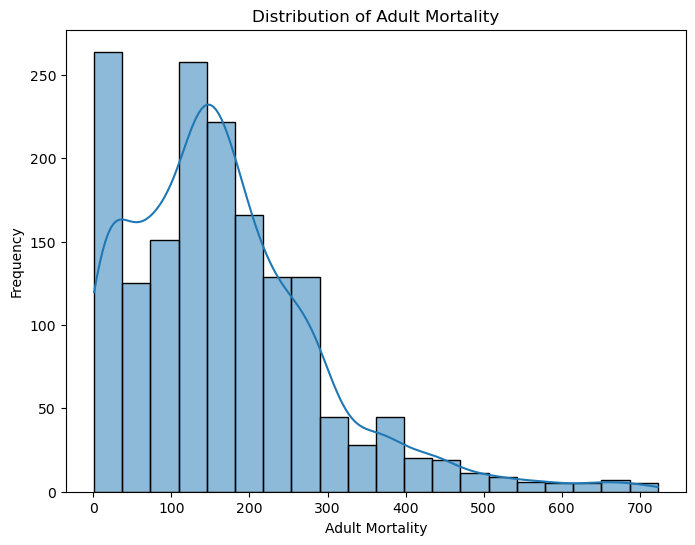

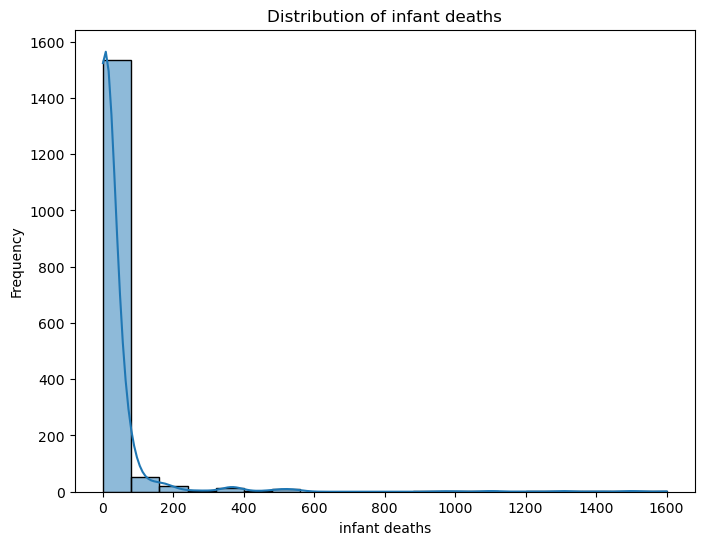

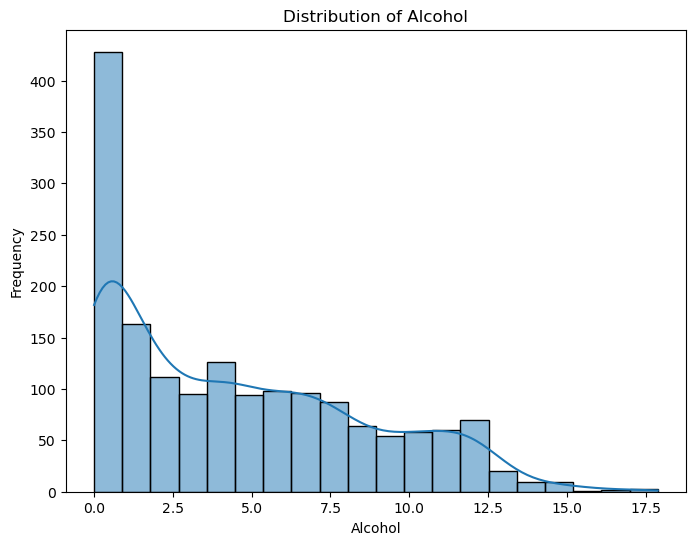

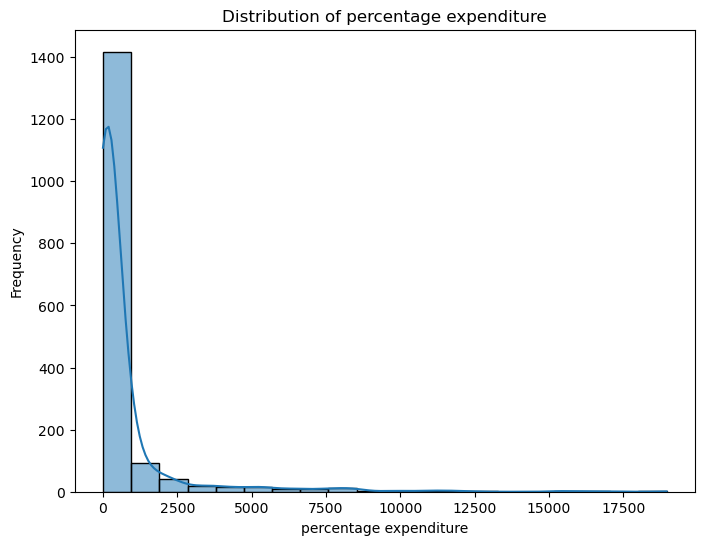

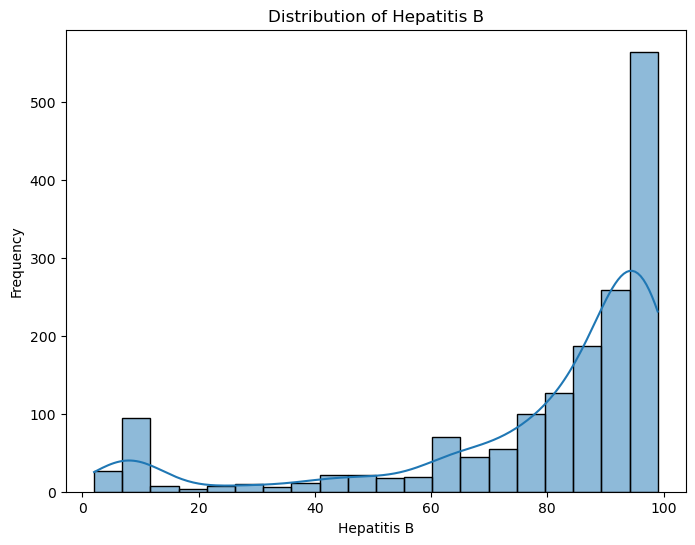

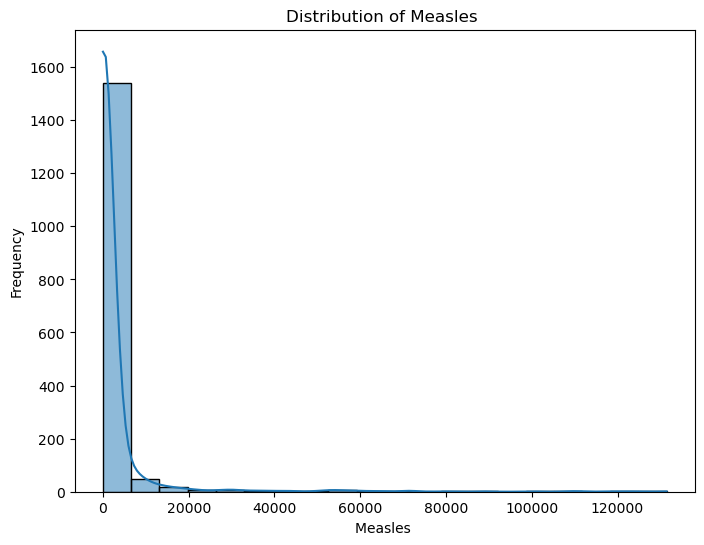

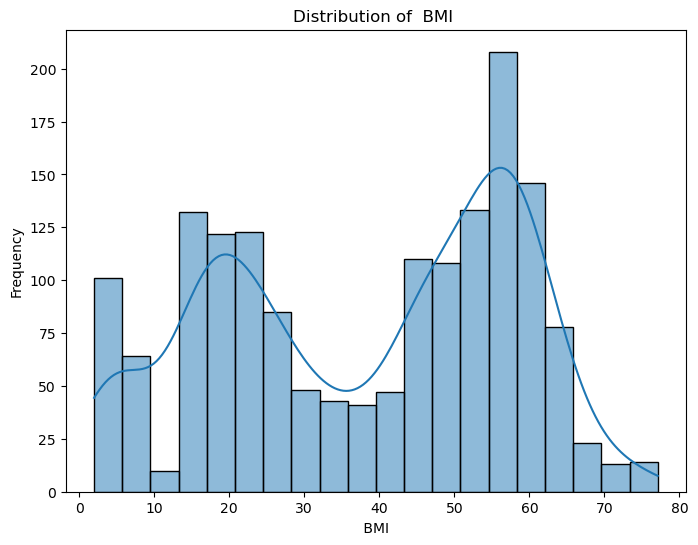

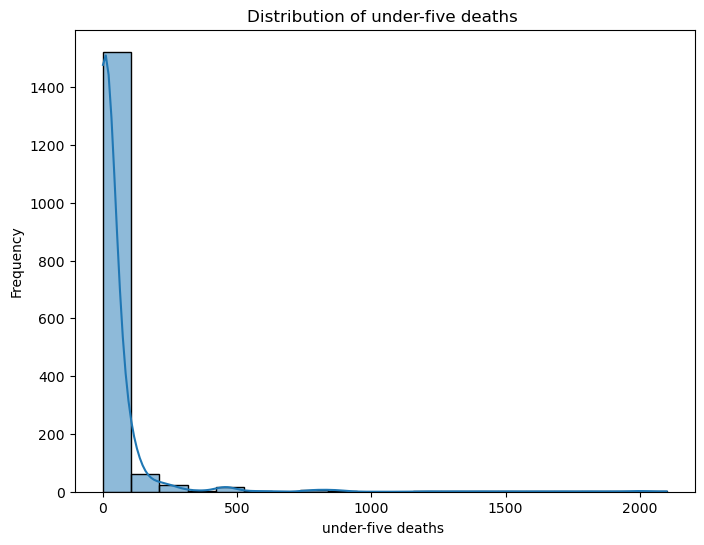

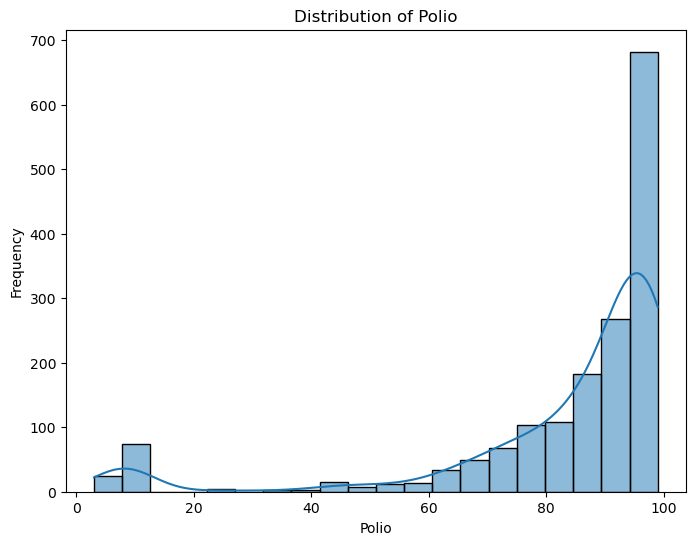

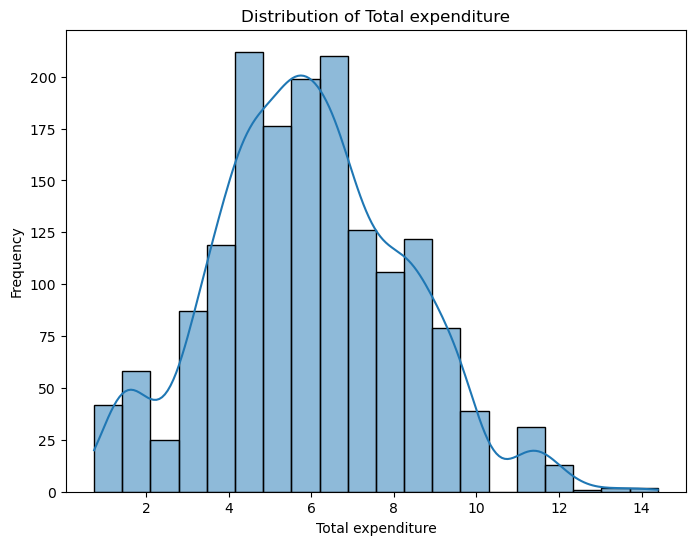

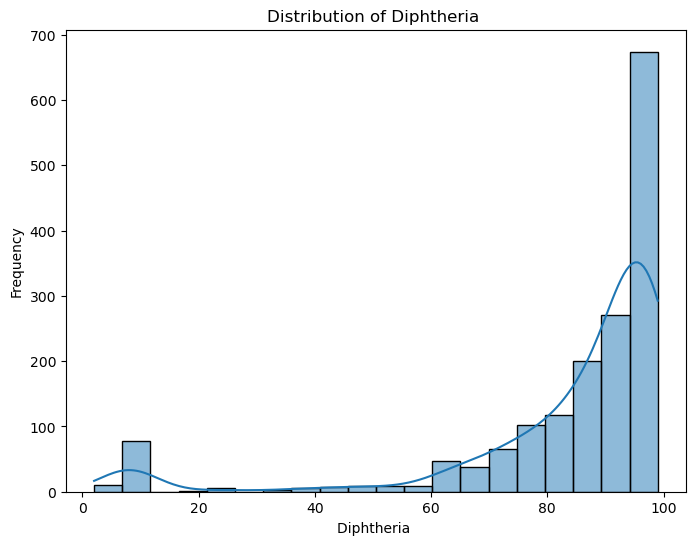

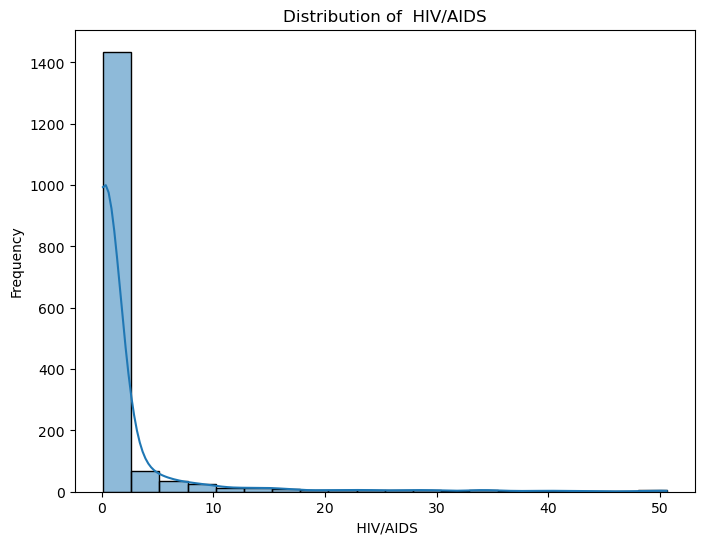

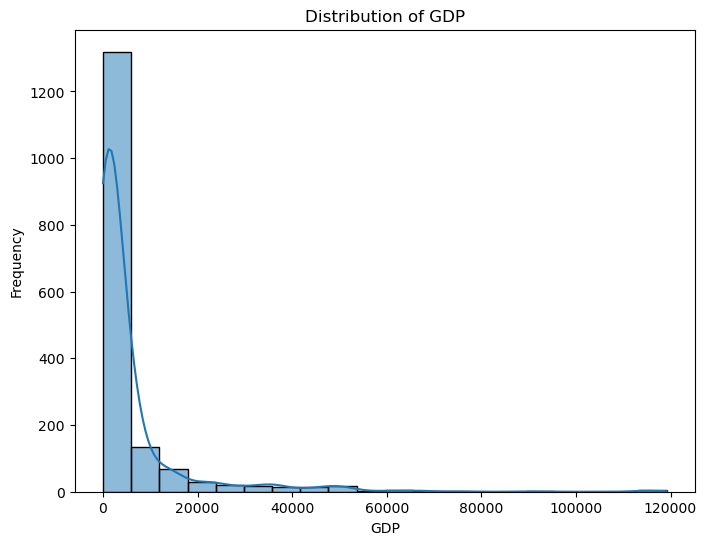

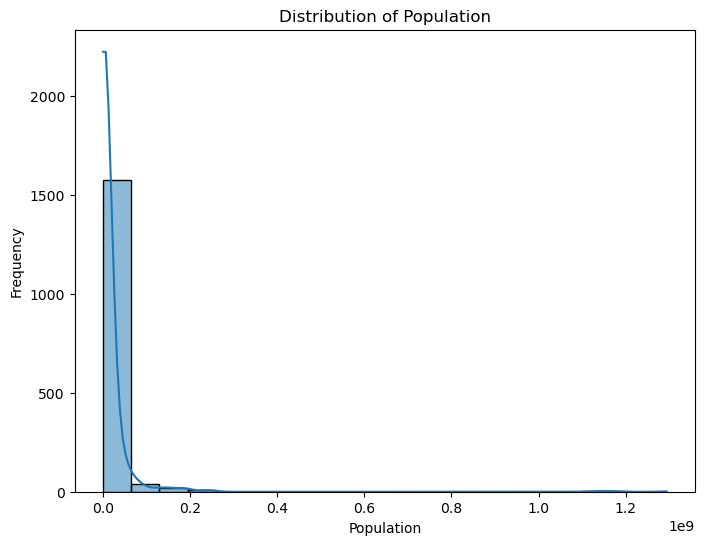

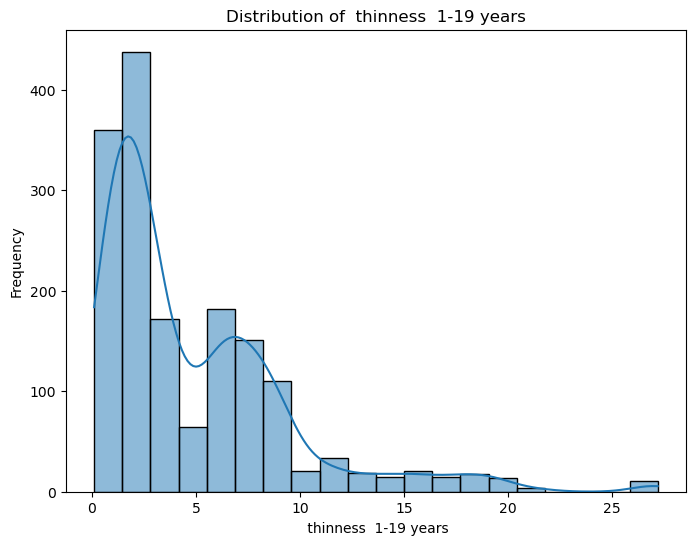

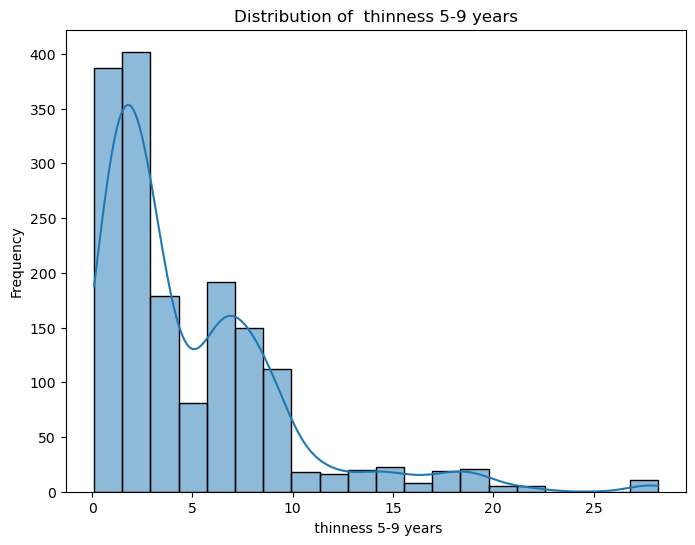

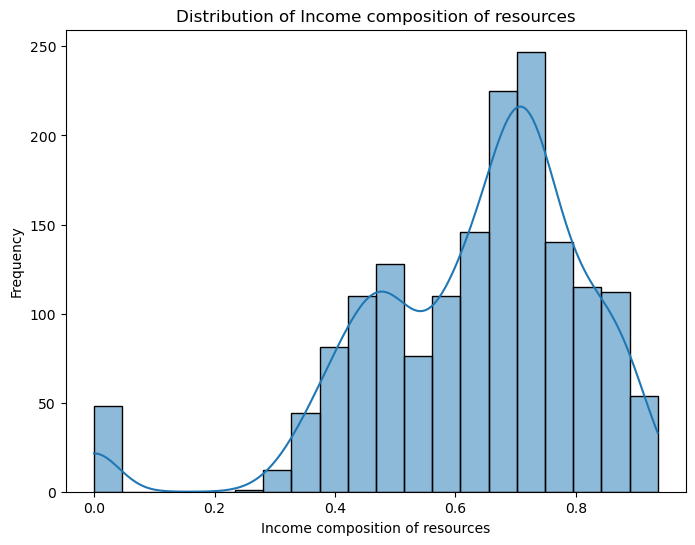

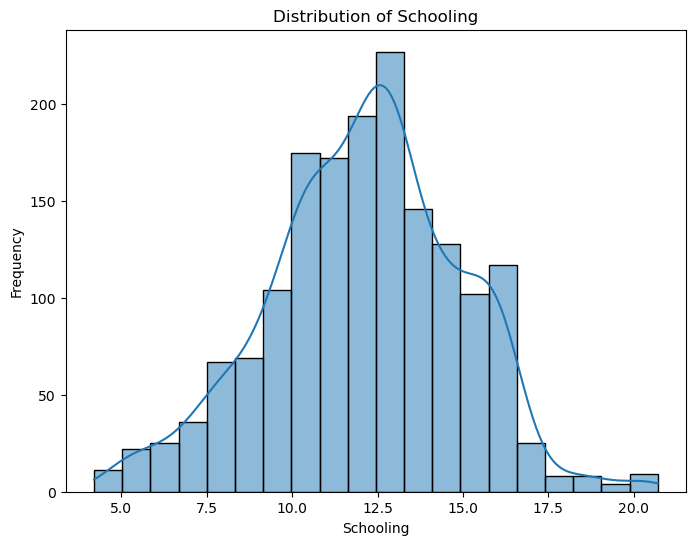

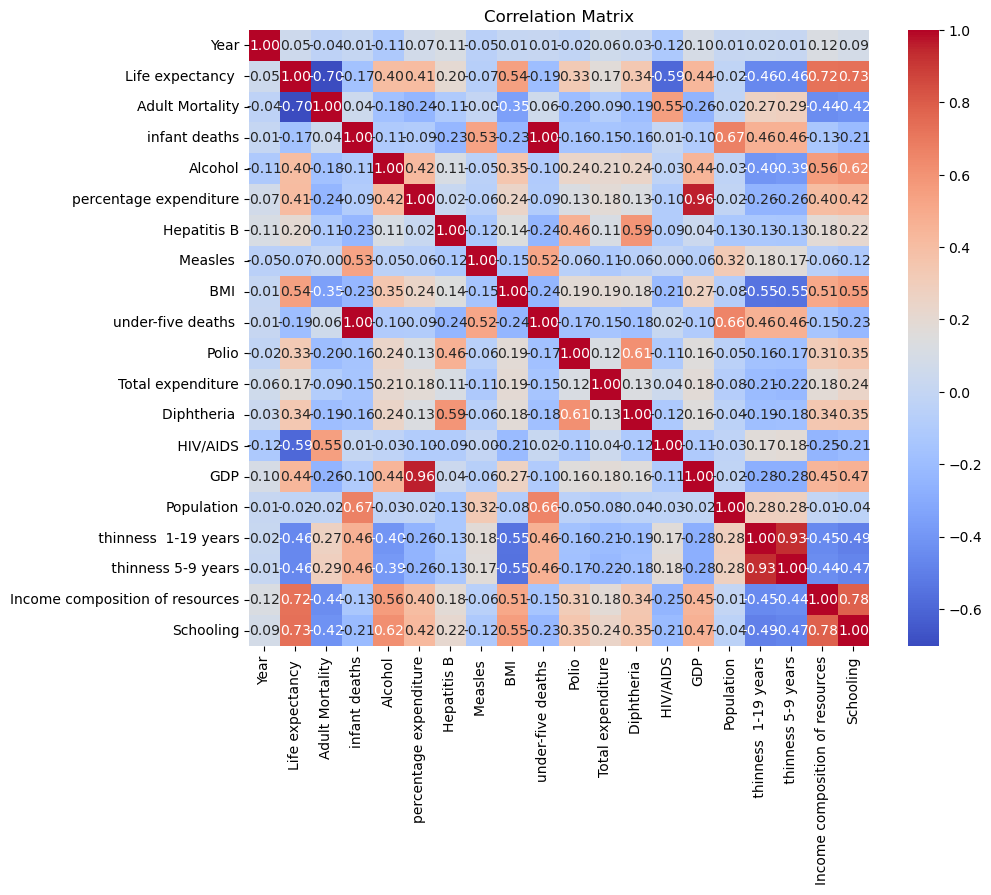

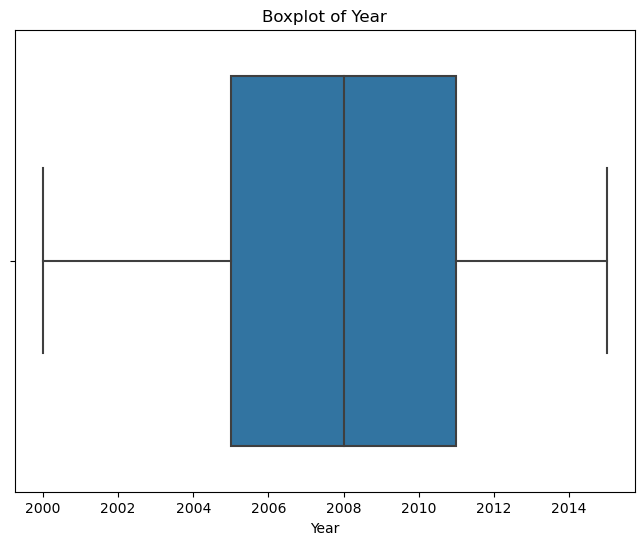

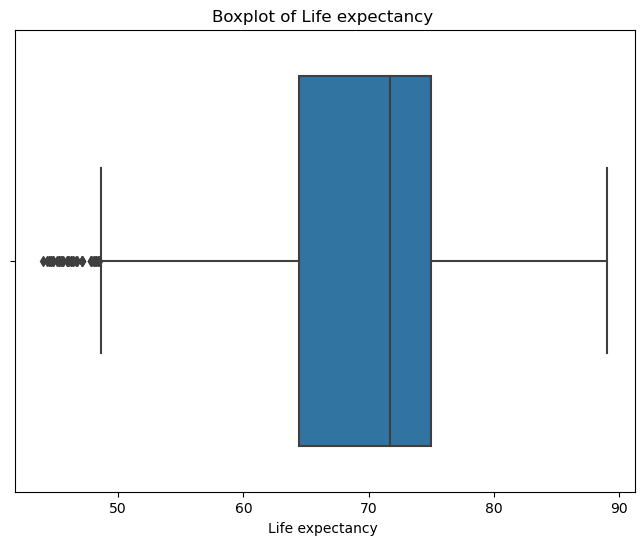

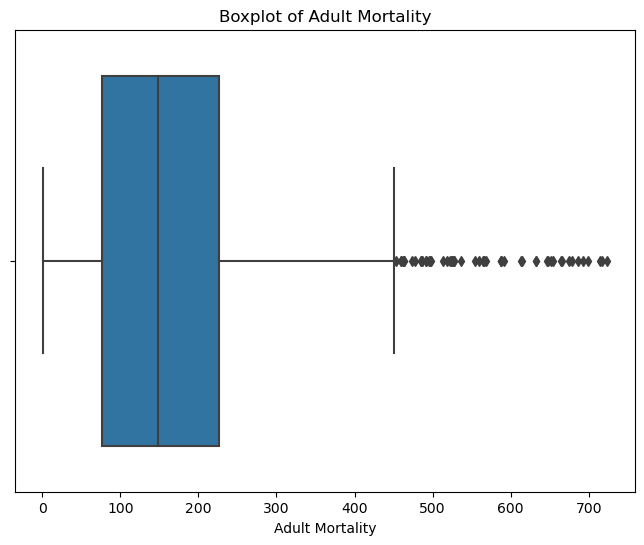

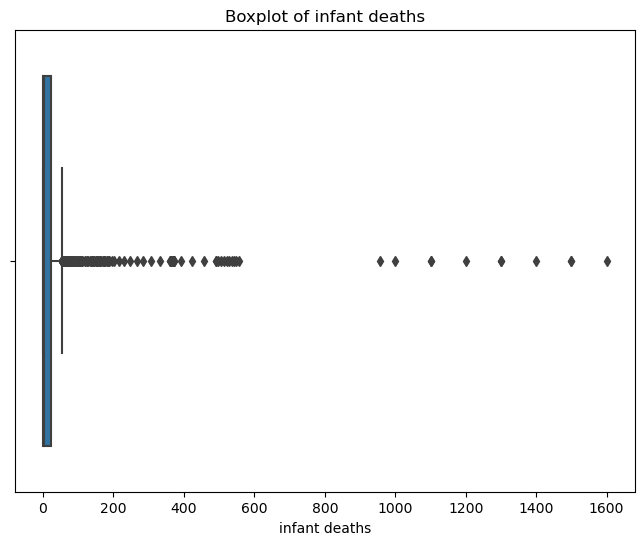

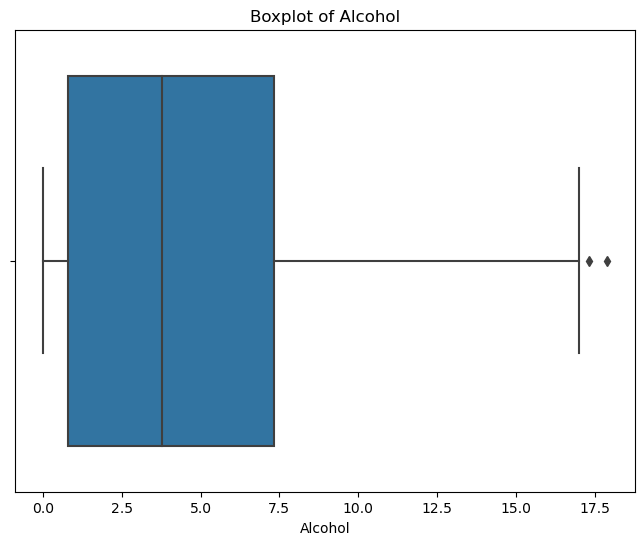

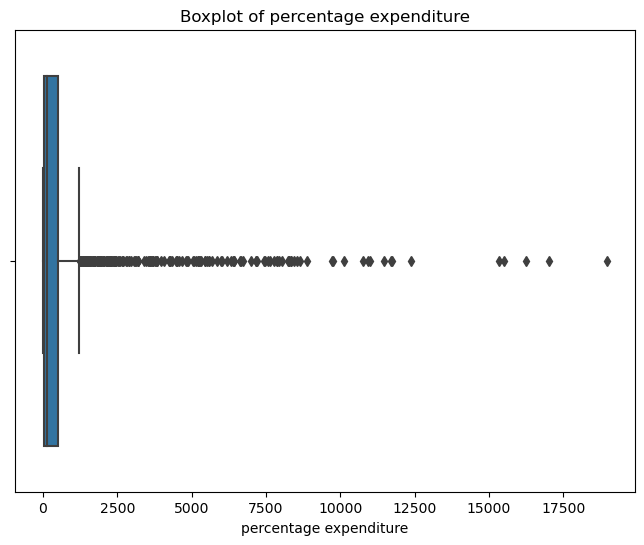

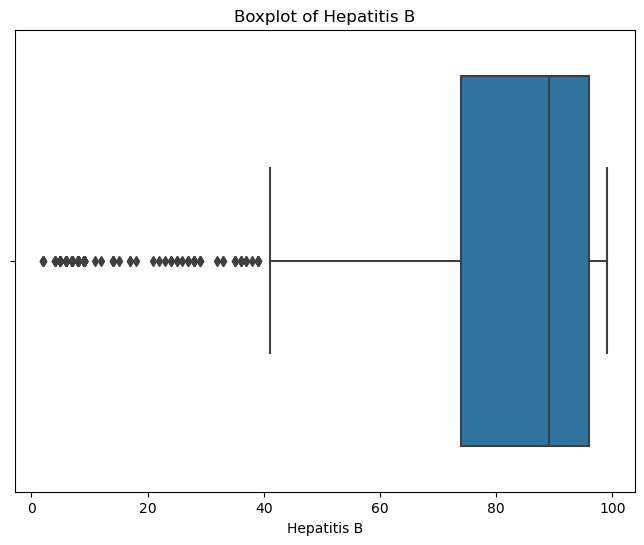

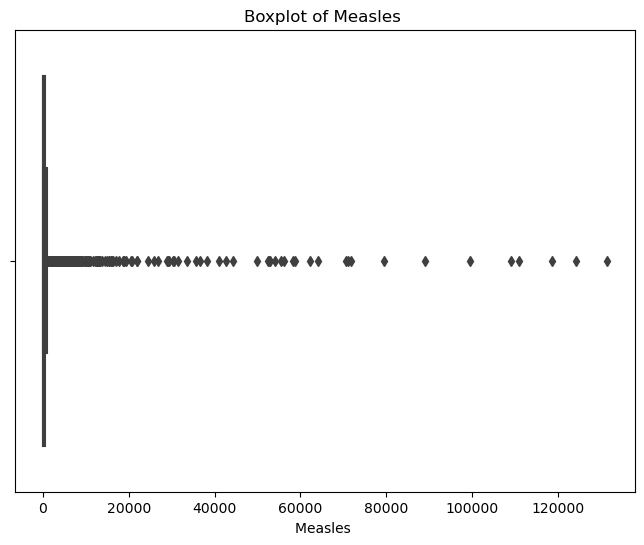

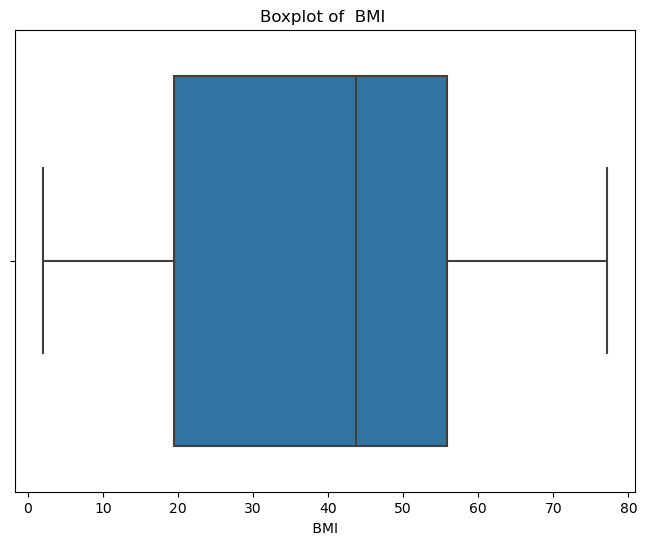

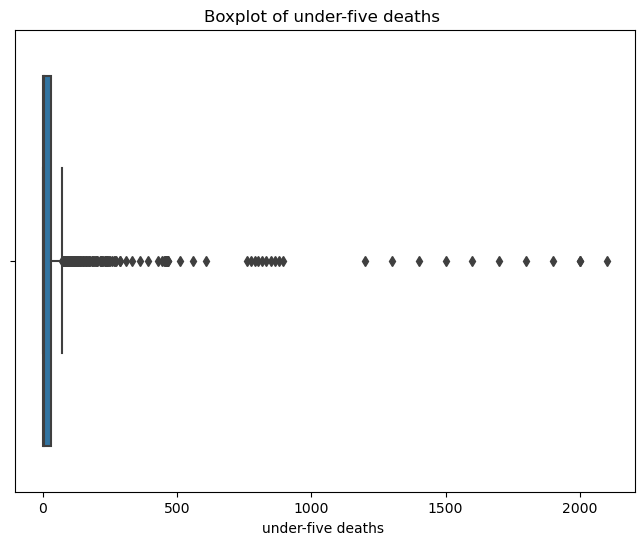

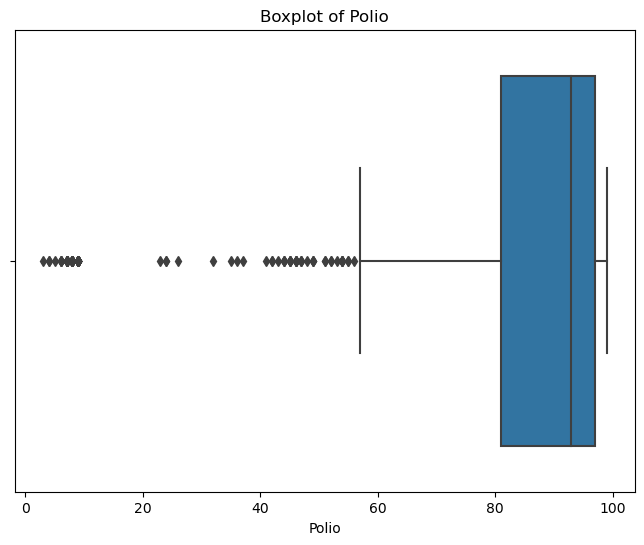

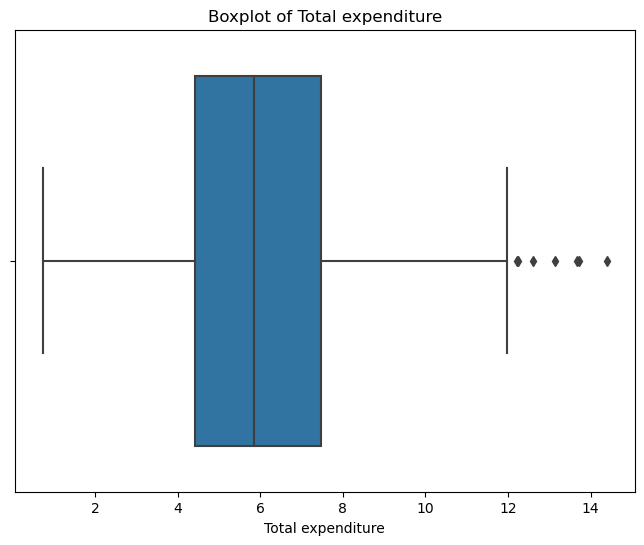

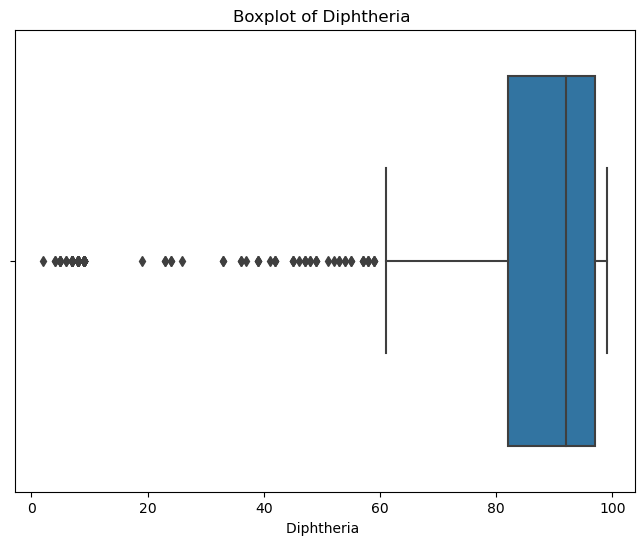

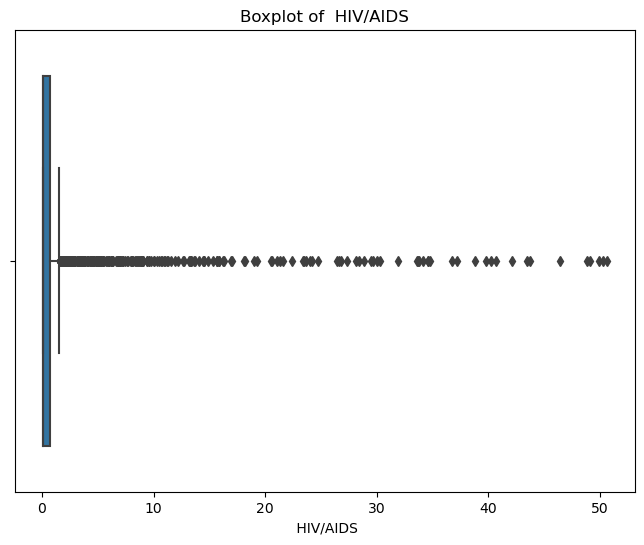

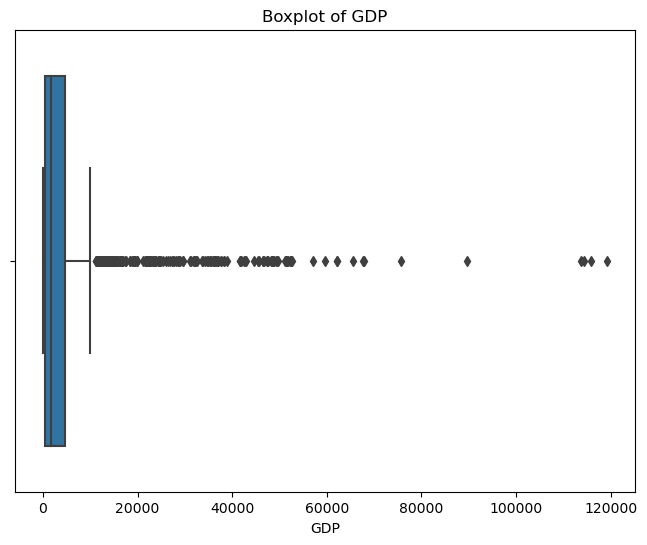

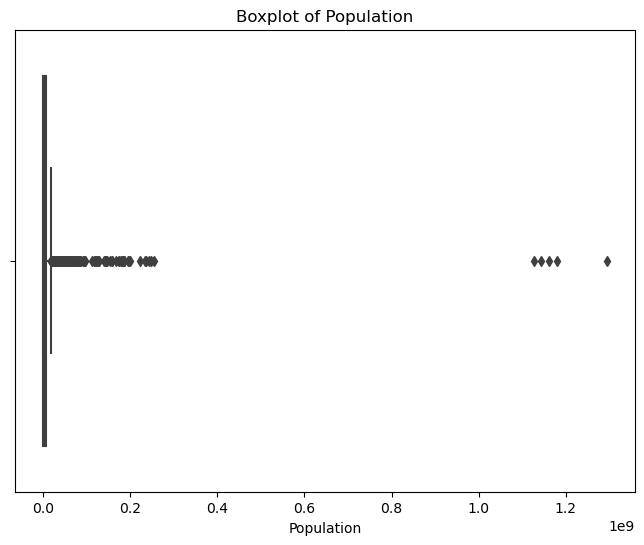

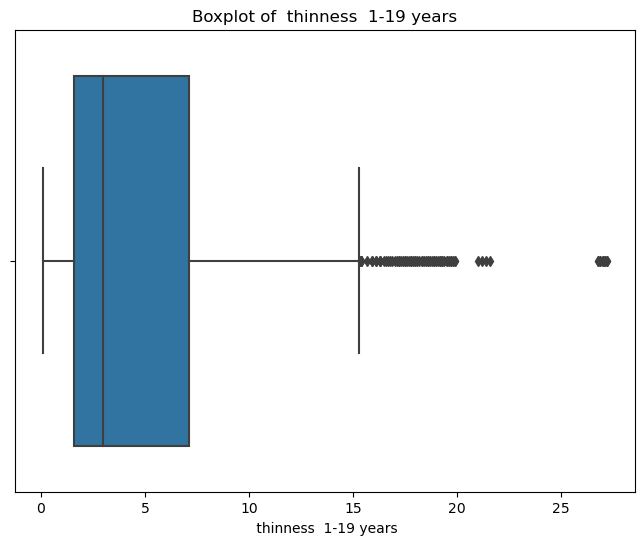

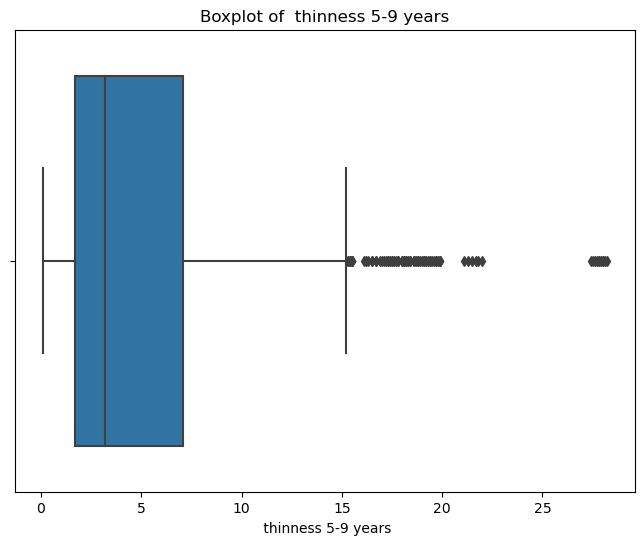

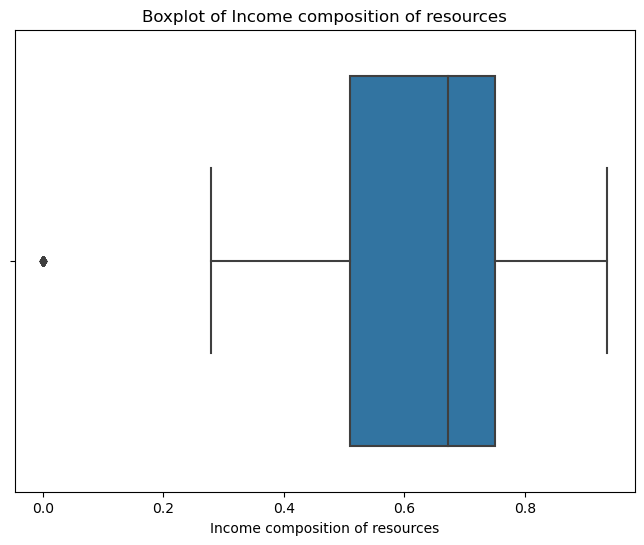

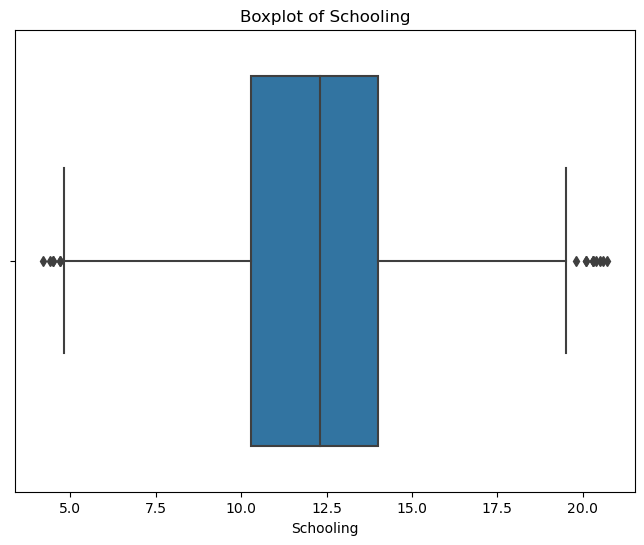

Chosen Prediction Model: KNeighborsRegressor
KNN Model Evaluation Without Cross-Validation:
Mean Squared Error: 5209.7572121212115
Mean Absolute Error: 57.944848484848485
R-squared Score: 0.01873676725786466
Adjusted R-squared Score: -0.044775416091140885

KNN Model Evaluation With Cross-Validation:
Mean Squared Error (CV): 5485.761575872796
R-squared Score (CV): 0.04466066160545952
Adjusted R-squared Score (CV): 0.029940486899842633


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def load_data(file_path):
    """Load the dataset from the given file path."""
    return pd.read_csv(file_path)

def clean_data(df):
    """Perform data cleaning."""
    # Drop any rows with missing values
    df_cleaned = df.dropna()
    return df_cleaned

def transform_data(df, target_column):
    """Perform data transformation."""
    # Exclude non-numeric columns
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df_numeric = df[numeric_cols]
    
    # Convert categorical variables to numerical using Label Encoding
    label_encoder = LabelEncoder()
    df[target_column] = label_encoder.fit_transform(df[target_column])
    
    return df_numeric, df[target_column]

def eda(df):
    """Perform exploratory data analysis."""
    # Display summary statistics
    print(df.describe())
    
    # Visualize distributions of numerical features
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[col], bins=20, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
    
    # Visualize the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()
    
    # Visualize boxplots of numerical features
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)
        plt.show()

def train_model(model, X_train, y_train):
    """Train the given model."""
    model.fit(X_train, y_train)

def evaluate_model(model, X_test, y_test):
    """Evaluate the given model."""
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Compute adjusted R-squared
    n = len(X_test)
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    return mse, mae, r2, adjusted_r2

def evaluate_model_KNN_CV(X_train, y_train, k=5):
    """Model Evaluation with KNN and Cross Validation."""
    knn = KNeighborsRegressor(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_cv = -cv_scores.mean()
    
    # Compute R-squared for cross-validation
    r2_cv = cross_val_score(knn, X_train, y_train, cv=5, scoring='r2').mean()
    
    # Compute adjusted R-squared for cross-validation
    n = len(X_train)
    p = X_train.shape[1]
    adjusted_r2_cv = 1 - (1 - r2_cv) * (n - 1) / (n - p - 1)
    
    return mse_cv, r2_cv, adjusted_r2_cv

def model_selection_KNN(X_train, y_train):
    """Model Selection for KNN."""
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    return knn

def master(file_path, target_column):
    """Master function to execute the entire pipeline."""
    # Step 1: Load data
    df = load_data(file_path)
    
    # Step 2: Data cleaning
    df_cleaned = clean_data(df)
    
    # Step 3: Data transformation
    X, y = transform_data(df_cleaned, target_column)
    
    # Step 4: Exploratory Data Analysis (EDA)
    eda(X)
    
    # Step 5: Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Step 6: Train models
    # Model selection for KNN
    knn_model = model_selection_KNN(X_train, y_train)
    
    # Step 7: Evaluate the models
    # Evaluate KNN model without cross-validation
    mse, mae, r2, adjusted_r2 = evaluate_model(knn_model, X_test, y_test)
    
    # Evaluate KNN model with cross-validation
    mse_cv, r2_cv, adjusted_r2_cv = evaluate_model_KNN_CV(X_train, y_train, k=5)
    
    # Print the chosen prediction model
    print("Chosen Prediction Model:", type(knn_model).__name__)
    
    return mse, mae, r2, adjusted_r2, mse_cv, r2_cv, adjusted_r2_cv

# Execute the pipeline
mse, mae, r2, adjusted_r2, mse_cv, r2_cv, adjusted_r2_cv = master('Regression.Life.Expectancy.csv', 'Life expectancy ')
print("KNN Model Evaluation Without Cross-Validation:")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)
print("Adjusted R-squared Score:", adjusted_r2)
print("\nKNN Model Evaluation With Cross-Validation:")
print("Mean Squared Error (CV):", mse_cv)
print("R-squared Score (CV):", r2_cv)
print("Adjusted R-squared Score (CV):", adjusted_r2_cv)


The dataset is about Life expectancy, which takes into account different features in order to predict the expected life.
We analyzed KNN with cross validation and without it and following are the results.
Without Cross-Validation:
Mean Squared Error (MSE): The MSE value of 5209.76 is relatively high, indicating that, the squared difference between the actual and predicted values of the life expectancy is very large. This suggests that the model's predictions deviate significantly from the actual values, leading to higher error.
Mean Absolute Error (MAE): The MAE value of 57.94 is also relatively high, indicating that, on average, the absolute difference between the actual and predicted values is large. Again, this suggests that the model's predictions are not accurate having large error.
R-squared Score (R2): The R-squared value of 0.0187 indicates that the model explains only about 1.87% of the variance in the target variable. A low R-squared value suggests that the model does not capture much of the variability in the data and performs poorly.
Adjusted R-squarScore: The adjusted R-squared value of -0.0448 is negative, which is not a desirable outcome. A negative adjusted R-squared indicates that adding more features to the model does not improve its performance and may even worsen it.

With Cross-Validation:
Mean Squared Error (CV): The MSE value of 5485.76 indicates the average squared difference between the actual and predicted values obtained through cross-validation. It's similar to the MSE without cross-validation.
R-squared Score (CV): The R-squared value of 0.0447 suggests that the model explains about 4.47% of the variance in the target variable when evaluated using cross-validation, which is higher than the model prformance wihtout CV.
Adjusted R-squared Score (CV): The adjusted R-squared value of 0.0299 is slightly higher than the R-squared value, indicating that the model's performance slightly improves with cross-validation.

The KNN model does not perform well both with and without cross-validation, as indicated by the low R-squared values and high MSE.
Cross-validation provides a more reliable estimate of the model's performance, as it evaluates the model on multiple subsets of the data. And so reduces overfitting, But in this case, this shows that KNN may not be a good model for this dataset with all the features, methods such as feature engineering might make the model a better fit.

## Songs Popularity

In [31]:
data_song=pd.read_csv("Regression.Songs.Popularity.csv")
data_song

song_name  song_popularity  song_duration_ms  \
0      Boulevard of Broken Dreams               73            262333   
1                      In The End               66            216933   
2               Seven Nation Army               76            231733   
3                      By The Way               74            216933   
4               How You Remind Me               56            223826   
...                           ...              ...               ...   
18830              Let It Breathe               60            159645   
18831                     Answers               60            205666   
18832      Sudden Love (Acoustic)               23            182211   
18833           Gentle on My Mind               55            352280   
18834                    Up to Me               60            193533   

       acousticness  danceability  energy  instrumentalness  key  liveness  \
0          0.005520         0.496   0.682          0.000029    8    0.0589   
1          0.010300         0.542   0.853          0.000000    3    0.1080   
2          0.008170         0.737   0.463          0.447000    0    0.2550   
3          0.026400         0.451   0.970          0.003550    0    0.1020   
4          0.000954         0.447   0.766          0.000000   10    0.1130   
...             ...           ...     ...               ...  ...       ...   
18830      0.893000         0.500   0.151          0.000065   11    0.1110   
18831      0.765000         0.495   0.161          0.000001   11    0.1050   
18832      0.847000         0.719   0.325          0.000000    0    0.1250   
18833      0.945000         0.488   0.326          0.015700    3    0.1190   
18834      0.911000         0.640   0.381          0.000254    4    0.1040   

       loudness  audio_mode  speechiness    tempo  time_signature  \
0        -4.095           1       0.0294  167.060               4   
1        -6.407           0       0.0498  105.256               4   
2        -7.828           1       0.0792  123.881               4   
3        -4.938           1       0.1070  122.444               4   
4        -5.065           1       0.0313  172.011               4   
...         ...         ...          ...      ...             ...   
18830   -16.107           1       0.0348  113.969               4   
18831   -14.078           0       0.0301   94.286               4   
18832   -12.222           1       0.0355  130.534               4   
18833   -12.020           1       0.0328  106.063               4   
18834   -11.790           1       0.0302   91.490               4   

       audio_valence  
0              0.474  
1              0.370  
2              0.324  
3              0.198  
4              0.574  
...              ...  
18830          0.300  
18831          0.265  
18832          0.286  
18833          0.323  
18834          0.581  

[18835 rows x 15 columns]

In [32]:
data_song.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

       song_popularity  song_duration_ms  acousticness  danceability  \
count     18835.000000      1.883500e+04  18835.000000  18835.000000   
mean         52.991877      2.182116e+05      0.258539      0.633348   
std          21.905654      5.988754e+04      0.288719      0.156723   
min           0.000000      1.200000e+04      0.000001      0.000000   
25%          40.000000      1.843395e+05      0.024100      0.533000   
50%          56.000000      2.113060e+05      0.132000      0.645000   
75%          69.000000      2.428440e+05      0.424000      0.748000   
max         100.000000      1.799346e+06      0.996000      0.987000   

             energy  instrumentalness           key      liveness  \
count  18835.000000      18835.000000  18835.000000  18835.000000   
mean       0.644995          0.078008      5.289196      0.179650   
std        0.214101          0.221591      3.614595      0.143984   
min        0.001070          0.000000      0.000000      0.010900   
25%   

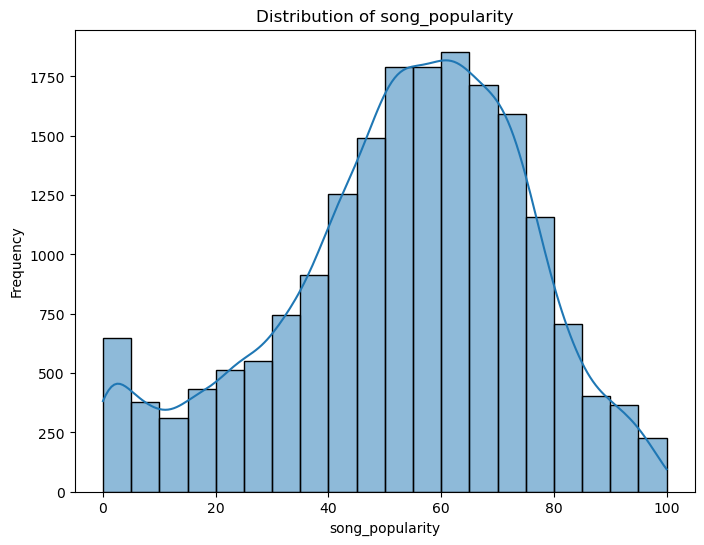

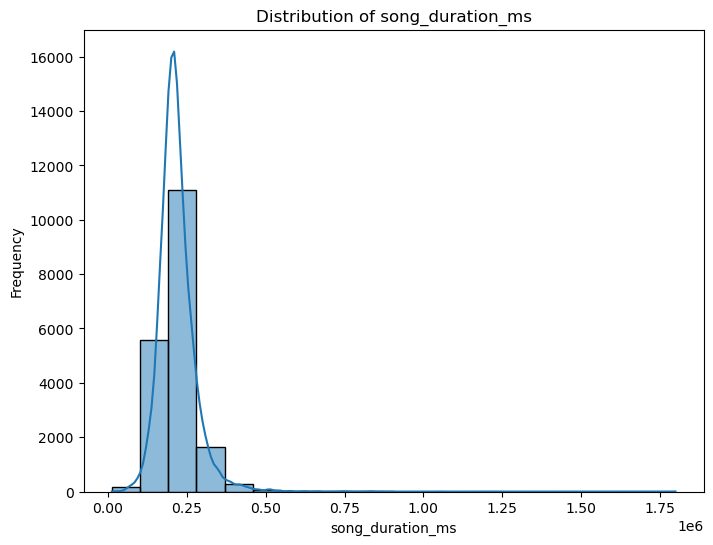

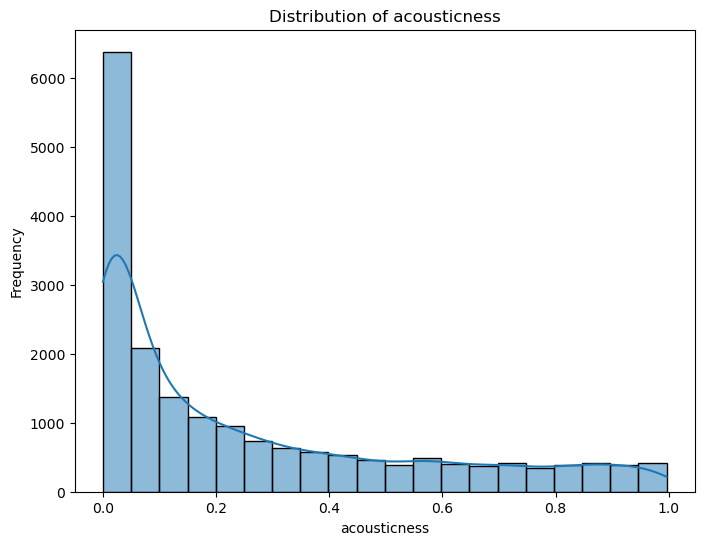

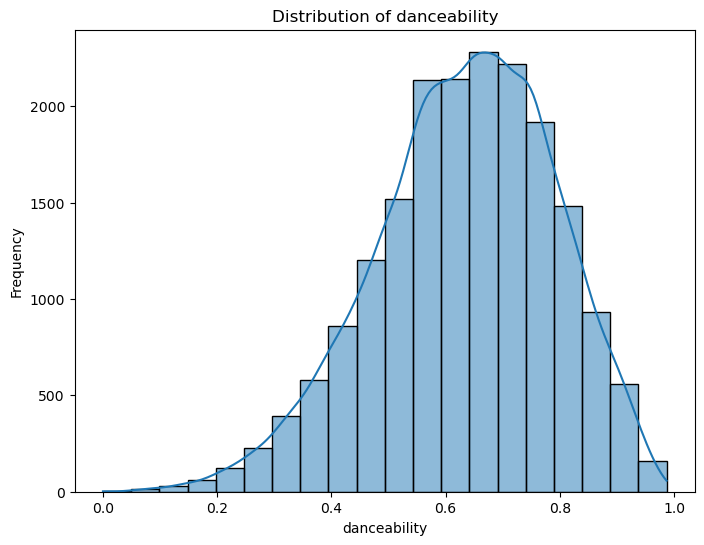

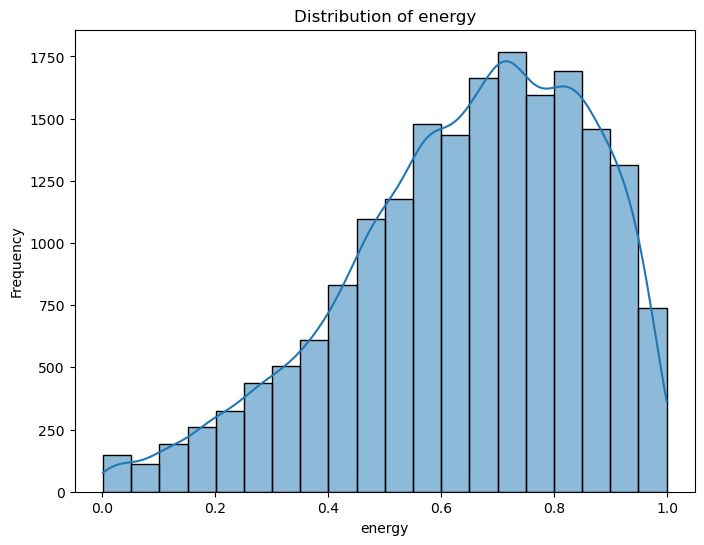

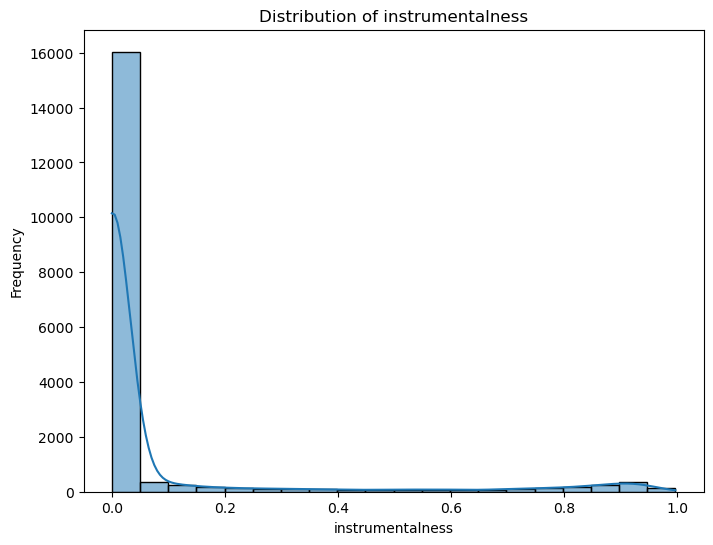

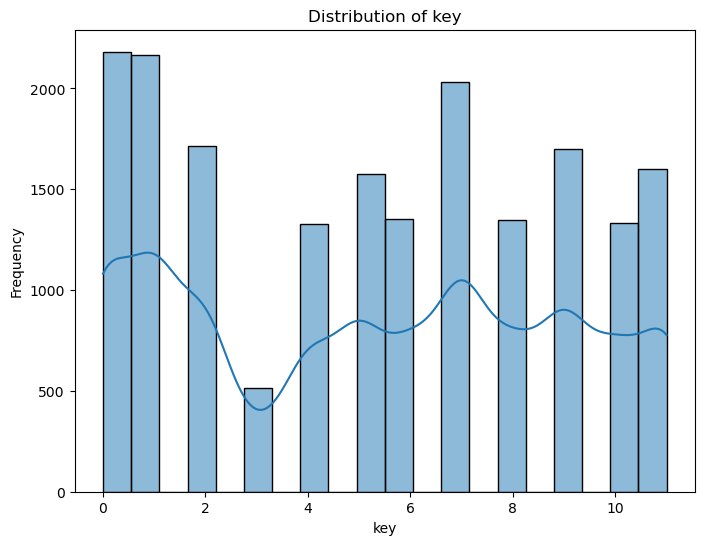

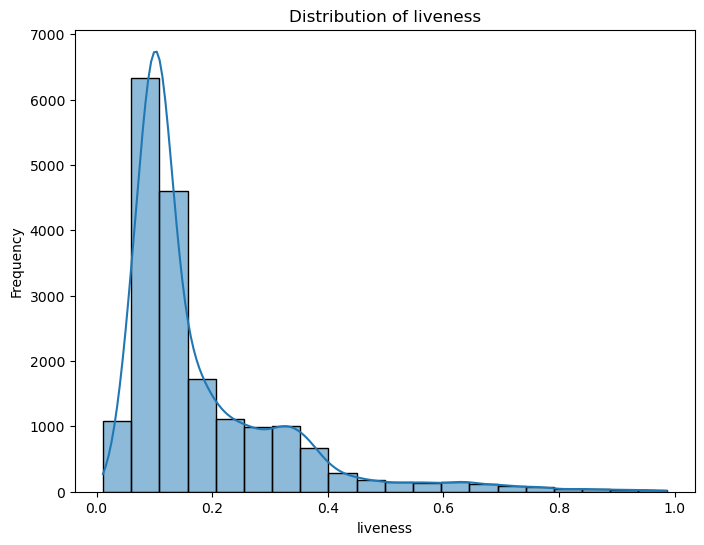

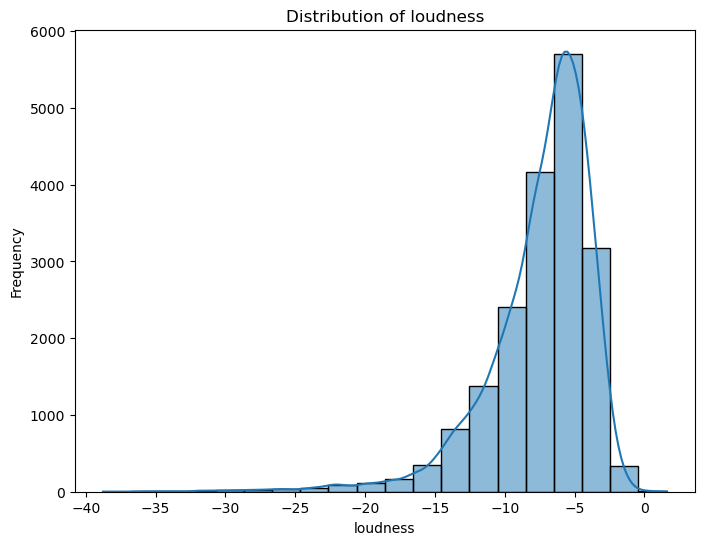

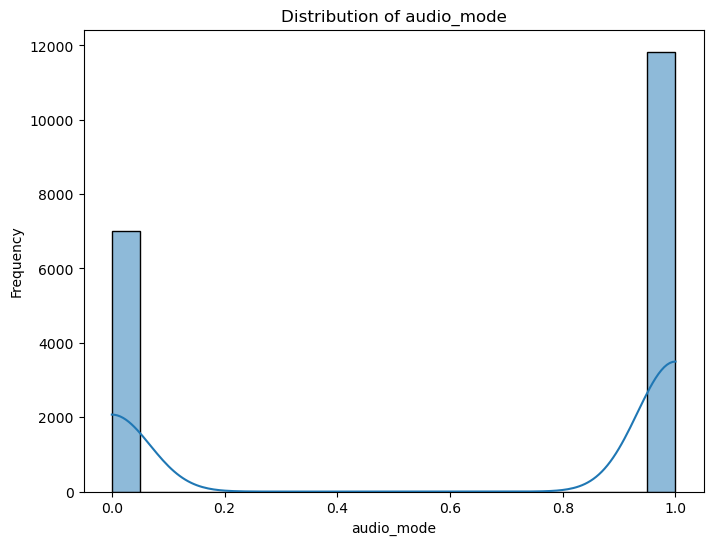

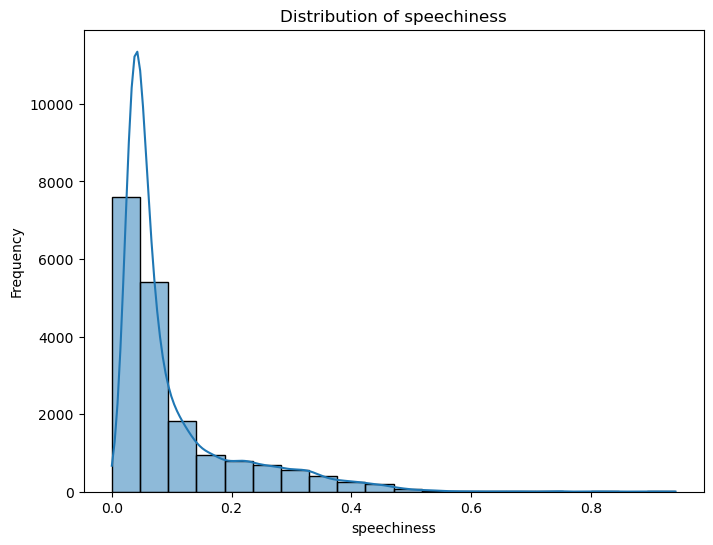

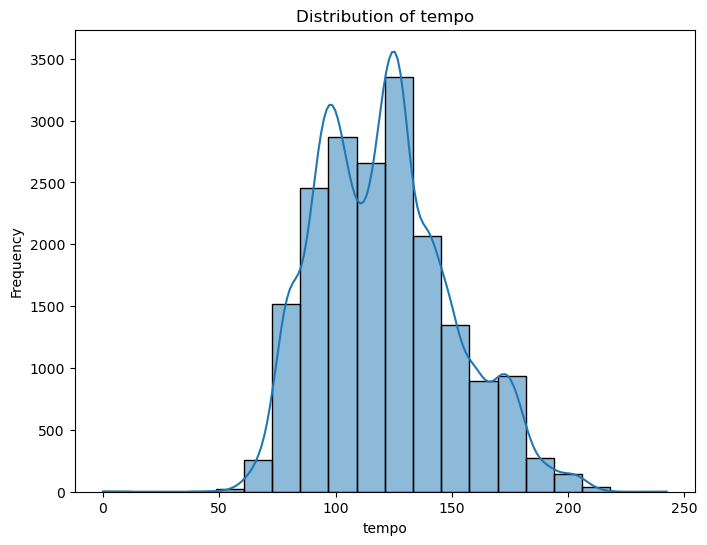

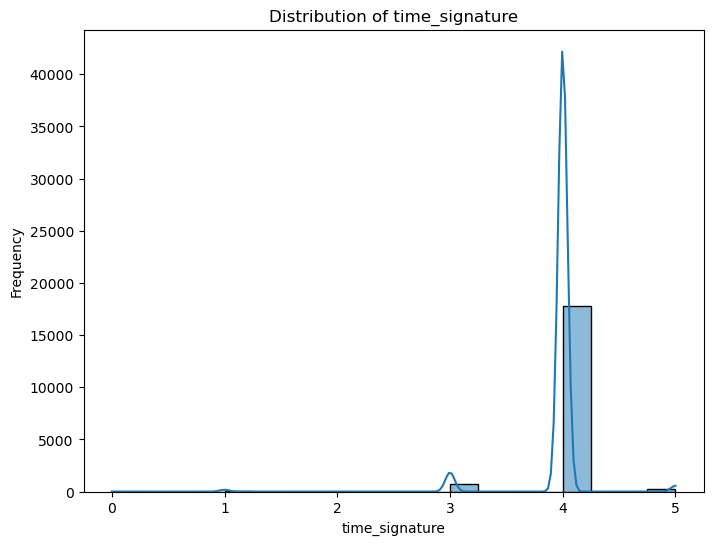

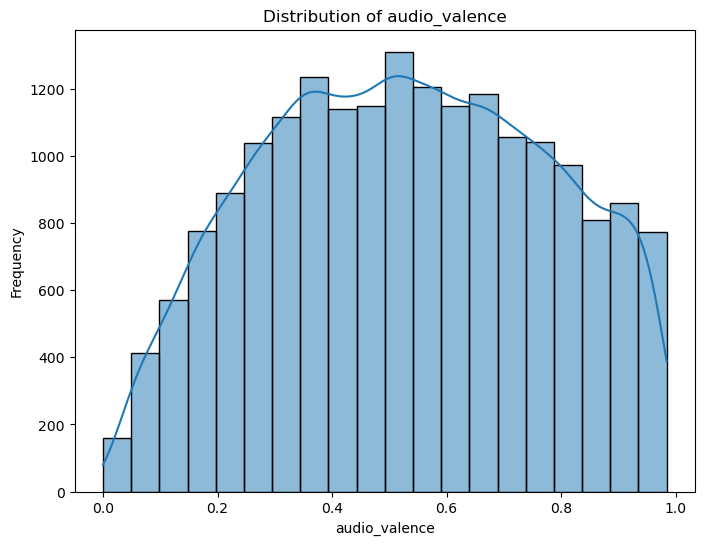

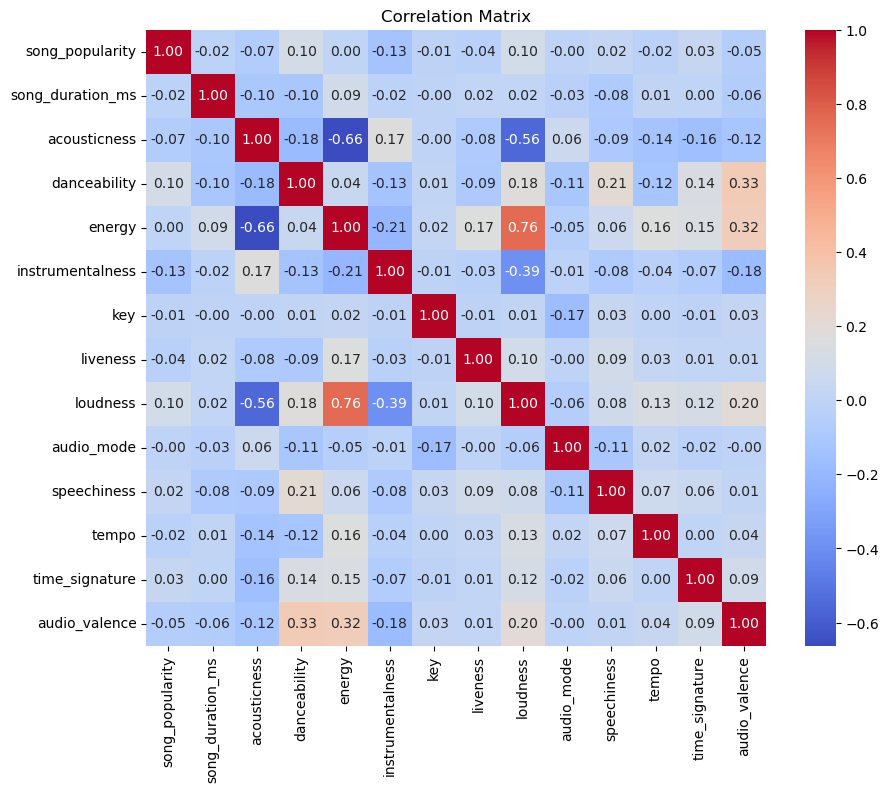

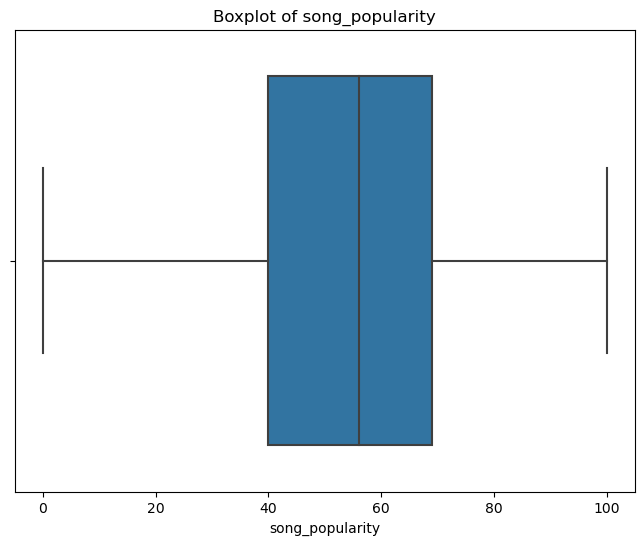

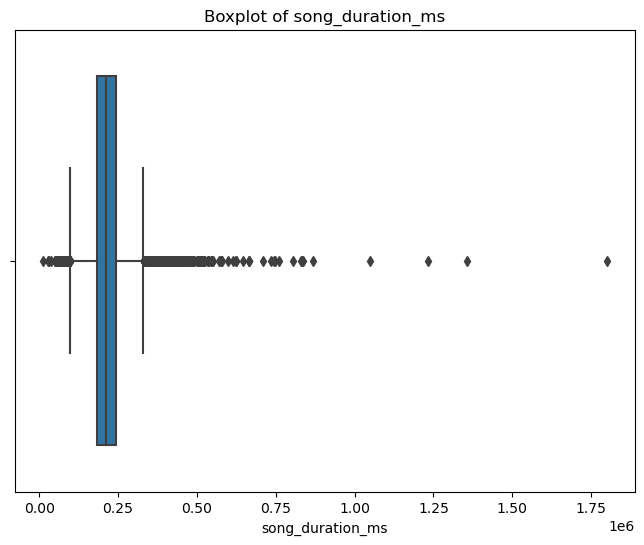

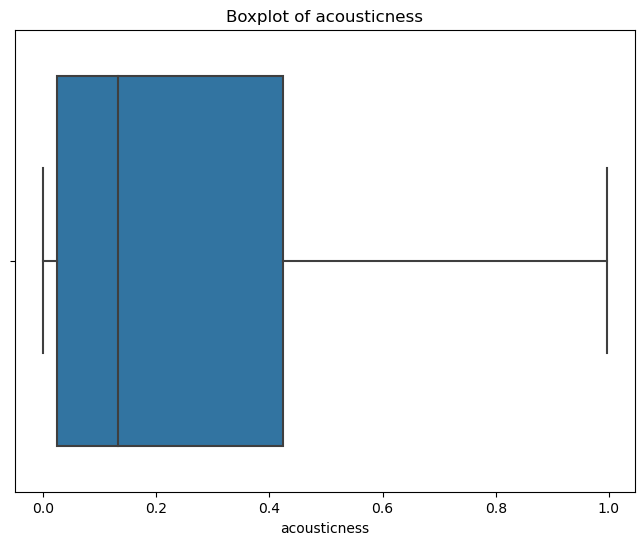

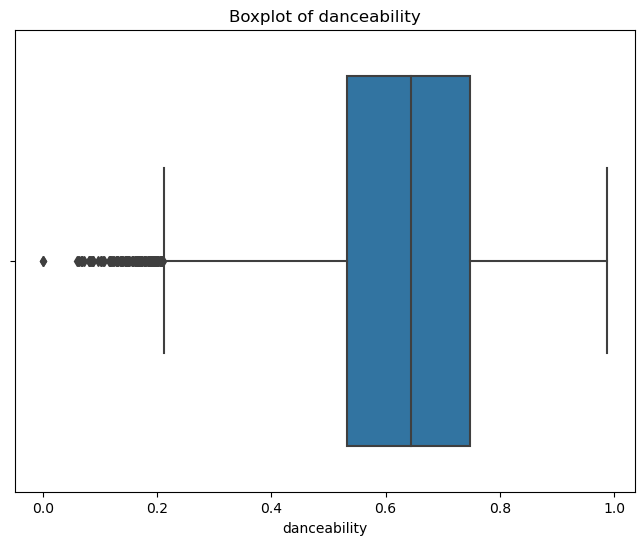

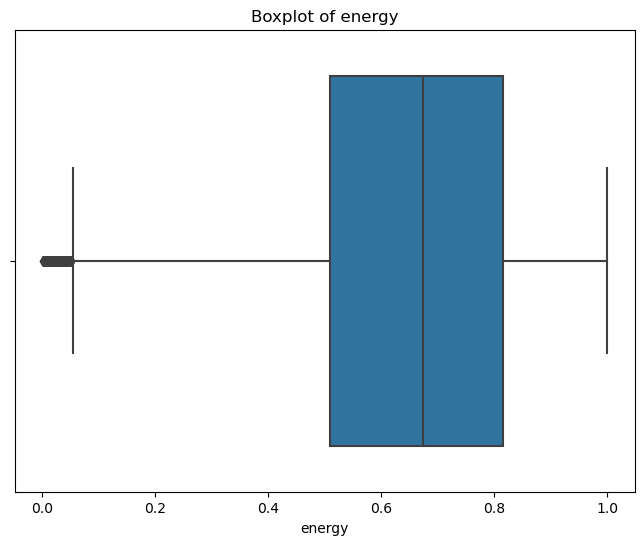

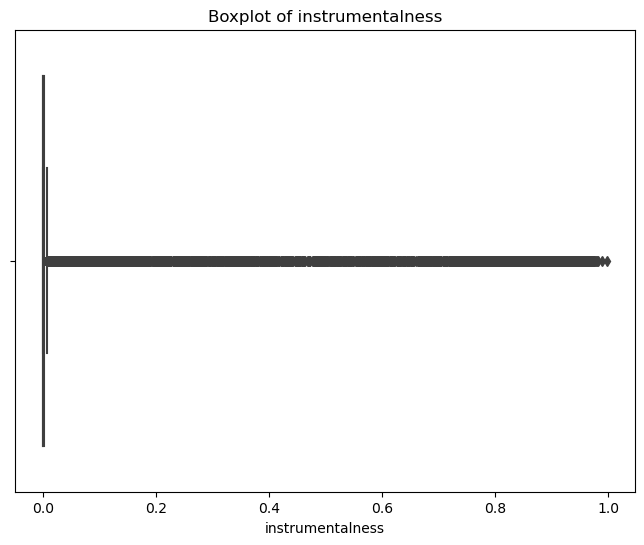

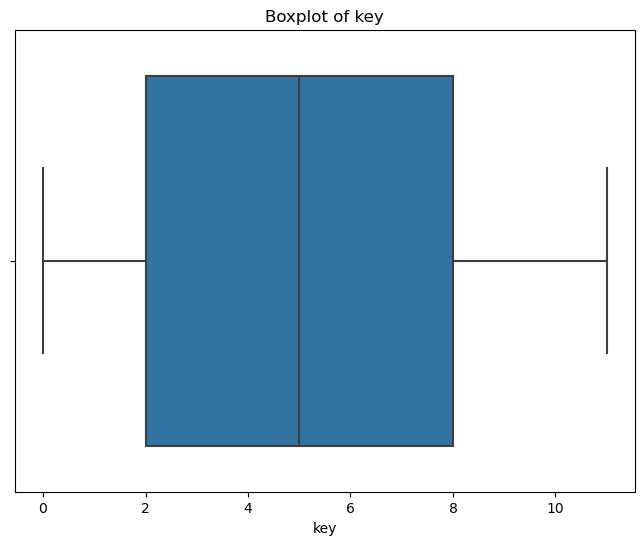

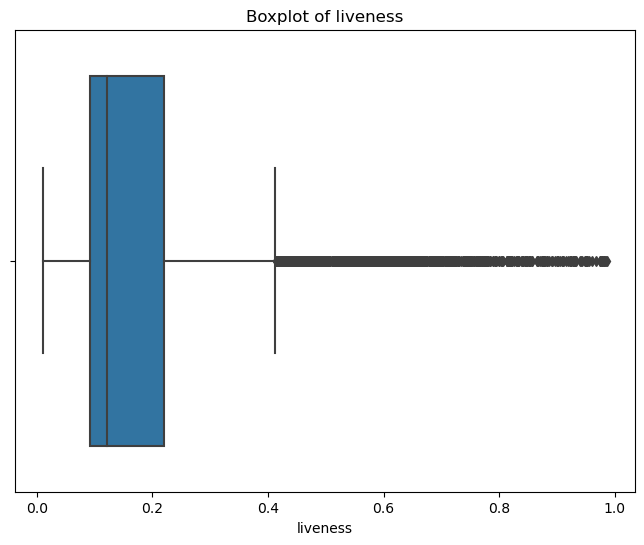

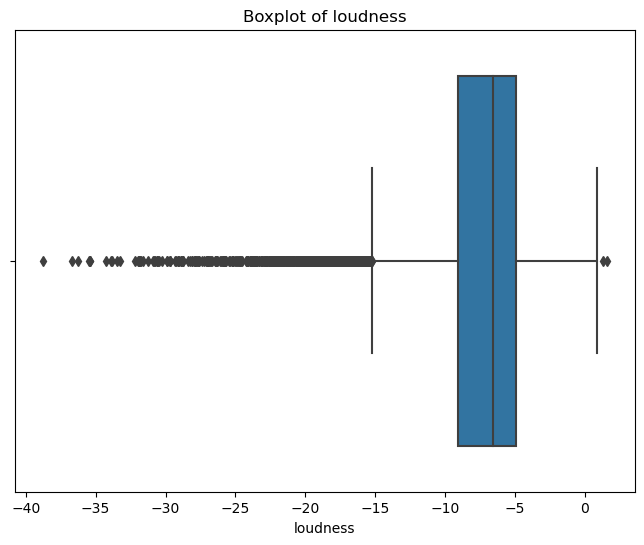

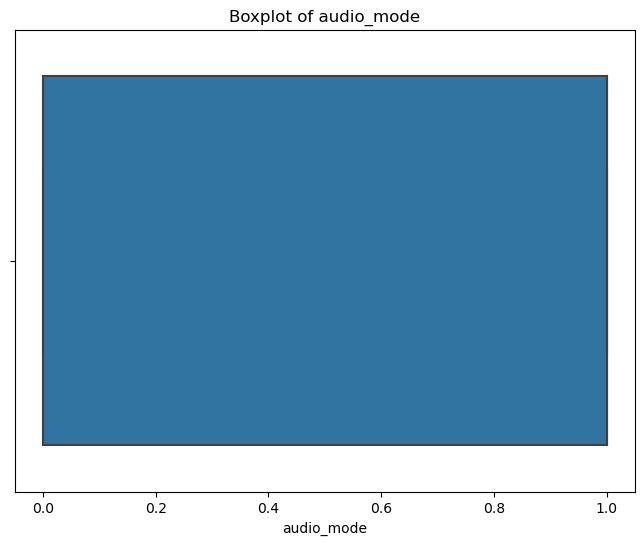

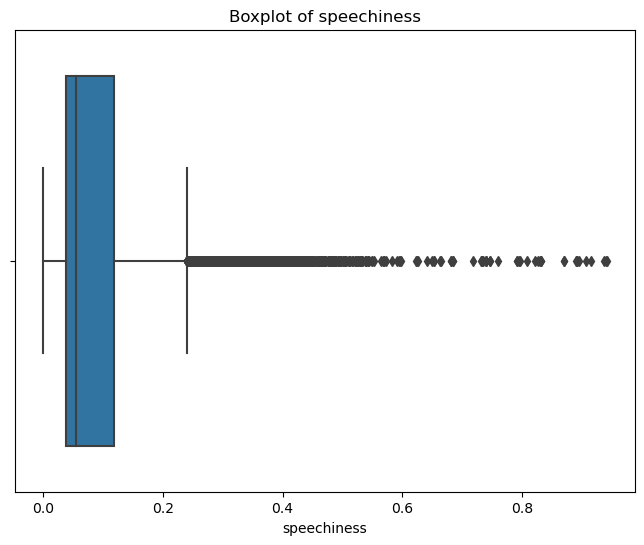

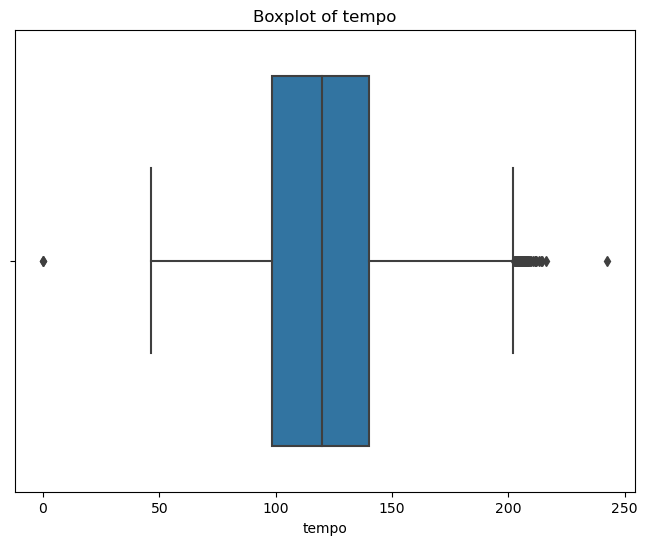

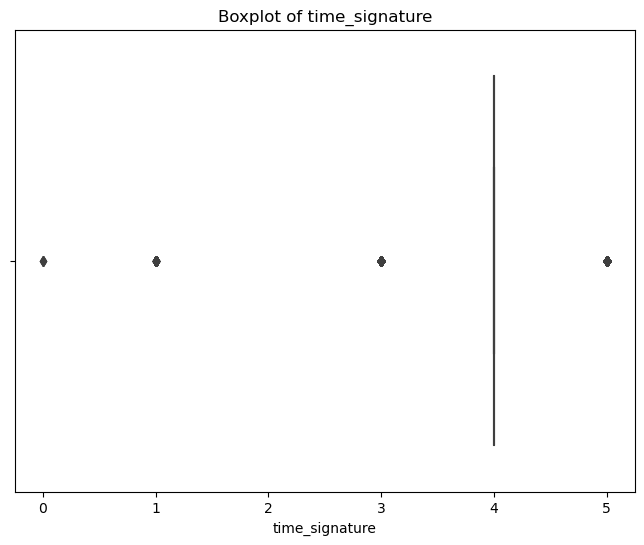

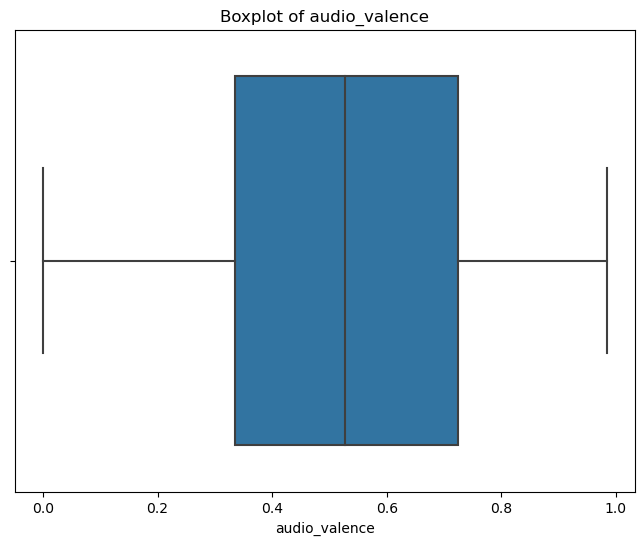

Chosen Prediction Model: KNeighborsRegressor
KNN Model Evaluation Without Cross-Validation:
Mean Squared Error: 271.49379346960444
Mean Absolute Error: 12.314945580037165
R-squared Score: 0.43682448721926603
Adjusted R-squared Score: 0.4347230860521738

KNN Model Evaluation With Cross-Validation:
Mean Squared Error (CV): 303.31376153456677
R-squared Score (CV): 0.36655157791511894
Adjusted R-squared Score (CV): 0.3659624410049225


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def load_data(file_path):
    """Load the dataset from the given file path."""
    return pd.read_csv(file_path)

def clean_data(df):
    """Perform data cleaning."""
    # Drop any rows with missing values
    df_cleaned = df.dropna()
    return df_cleaned

def transform_data(df, target_column):
    """Perform data transformation."""
    # Exclude non-numeric columns
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df_numeric = df[numeric_cols]
    
    # Convert categorical variables to numerical using Label Encoding
    label_encoder = LabelEncoder()
    df[target_column] = label_encoder.fit_transform(df[target_column])
    
    return df_numeric, df[target_column]

def eda(df):
    """Perform exploratory data analysis."""
    # Display summary statistics
    print(df.describe())
    
    # Visualize distributions of numerical features
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[col], bins=20, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
    
    # Visualize the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()
    
    # Visualize boxplots of numerical features
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)
        plt.show()

def train_model(model, X_train, y_train):
    """Train the given model."""
    model.fit(X_train, y_train)

def evaluate_model(model, X_test, y_test):
    """Evaluate the given model."""
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Compute adjusted R-squared
    n = len(X_test)
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    return mse, mae, r2, adjusted_r2

def evaluate_model_KNN_CV(X_train, y_train, k=5):
    """Model Evaluation with KNN and Cross Validation."""
    knn = KNeighborsRegressor(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_cv = -cv_scores.mean()
    
    # Compute R-squared for cross-validation
    r2_cv = cross_val_score(knn, X_train, y_train, cv=5, scoring='r2').mean()
    
    # Compute adjusted R-squared for cross-validation
    n = len(X_train)
    p = X_train.shape[1]
    adjusted_r2_cv = 1 - (1 - r2_cv) * (n - 1) / (n - p - 1)
    
    return mse_cv, r2_cv, adjusted_r2_cv

def model_selection_KNN(X_train, y_train):
    """Model Selection for KNN."""
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    return knn

def master(file_path, target_column):
    """Master function to execute the entire pipeline."""
    # Step 1: Load data
    df = load_data(file_path)
    
    # Step 2: Data cleaning
    df_cleaned = clean_data(df)
    
    # Step 3: Data transformation
    X, y = transform_data(df_cleaned, target_column)
    
    # Step 4: Exploratory Data Analysis (EDA)
    eda(X)
    
    # Step 5: Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Step 6: Train models
    # Model selection for KNN
    knn_model = model_selection_KNN(X_train, y_train)
    
    # Step 7: Evaluate the models
    # Evaluate KNN model without cross-validation
    mse, mae, r2, adjusted_r2 = evaluate_model(knn_model, X_test, y_test)
    
    # Evaluate KNN model with cross-validation
    mse_cv, r2_cv, adjusted_r2_cv = evaluate_model_KNN_CV(X_train, y_train, k=5)
    
    # Print the chosen prediction model
    print("Chosen Prediction Model:", type(knn_model).__name__)
    
    return mse, mae, r2, adjusted_r2, mse_cv, r2_cv, adjusted_r2_cv

# Execute the pipeline
mse, mae, r2, adjusted_r2, mse_cv, r2_cv, adjusted_r2_cv = master('Regression.Songs.Popularity.csv', 'song_popularity')
print("KNN Model Evaluation Without Cross-Validation:")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)
print("Adjusted R-squared Score:", adjusted_r2)
print("\nKNN Model Evaluation With Cross-Validation:")
print("Mean Squared Error (CV):", mse_cv)
print("R-squared Score (CV):", r2_cv)
print("Adjusted R-squared Score (CV):", adjusted_r2_cv)


This dataset is about song popularity and it predicts a score of song popularity between 1 and 100 based on a number of features.

Without Cross-Validation:
Mean Squared Error (MSE): 271.49
The average squared difference between the actual and predicted values is relatively low, indicating that the model's predictions are generally close to the true values.
Mean Absolute Error (MAE): 12.31
On average, the model's predictions are off by approximately 12.31 units, which provides a measure of the model's accuracy, suggesting a relatively better fit.
R-squared Score: 0.44
The coefficient of determination (R-squared) indicates that approximately 43.68% of the variance in the target variable is explained by the model. This value ranges from 0 to 1, with higher values indicating better fit.
Adjusted R-squared Score: 0.43
The adjusted R-squared adjusts the R-squared value for the number of predictors in the model. It reflects the proportion of variance explained by the independent variables, with a higher value suggesting a better fit.

With Cross-Validation:
Mean Squared Error (CV): 303.31
The average MSE obtained through cross-validation is slightly higher compared to the non-cross-validated approach. This suggests that the model's performance has degraded slightly when evaluated on unseen data.
R-squared Score (CV): 0.37
The cross-validated R-squared score indicates that approximately 36.66% of the variance in the target variable is explained by the model, which is slightly lower than the non-cross-validated R-squared.
Adjusted R-squared Score (CV): 0.37
The adjusted R-squared score obtained through cross-validation is also slightly lower than the non-cross-validated adjusted R-squared.

The KNN regression model performs reasonably well, as indicated by the relatively low MSE and MAE values and the moderate R-squared scores.
However, there is room for improvement, especially in terms of explaining more variance in the target variable.
Cross-validation provides a more robust estimate of the model's performance on unseen data, and the slight decrease in performance compared to the non-cross-validated approach suggests that the model does not perform good on unseen data, meaning that it might not be generalizable, and it could be improved with tuning and feature scaling.

## Used Cars

In [27]:
data_cars=pd.read_csv("Regression.Used.Cars.csv")
data_cars

index          dateCrawled  \
0            0  2016-03-24 11:52:17   
1            1  2016-03-24 10:58:45   
2            2  2016-03-14 12:52:21   
3            3  2016-03-17 16:54:04   
4            4  2016-03-31 17:25:20   
...        ...                  ...   
371523  371523  2016-03-14 17:48:27   
371524  371524  2016-03-05 19:56:21   
371525  371525  2016-03-19 18:57:12   
371526  371526  2016-03-20 19:41:08   
371527  371527  2016-03-07 19:39:19   

                                                name  seller offerType  price  \
0                                         Golf_3_1.6  privat   Angebot    480   
1                               A5_Sportback_2.7_Tdi  privat   Angebot  18300   
2                     Jeep_Grand_Cherokee_"Overland"  privat   Angebot   9800   
3                                 GOLF_4_1_4__3TÜRER  privat   Angebot   1500   
4                     Skoda_Fabia_1.4_TDI_PD_Classic  privat   Angebot   3600   
...                                              ...     ...       ...    ...   
371523                    Suche_t4___vito_ab_6_sitze  privat   Angebot   2200   
371524         Smart_smart_leistungssteigerung_100ps  privat   Angebot   1199   
371525            Volkswagen_Multivan_T4_TDI_7DC_UY2  privat   Angebot   9200   
371526                        VW_Golf_Kombi_1_9l_TDI  privat   Angebot   3400   
371527  BMW_M135i_vollausgestattet_NP_52.720____Euro  privat   Angebot  28990   

         abtest vehicleType  yearOfRegistration    gearbox  ...        model  \
0          test         NaN                1993    manuell  ...         golf   
1          test       coupe                2011    manuell  ...          NaN   
2          test         suv                2004  automatik  ...        grand   
3          test  kleinwagen                2001    manuell  ...         golf   
4          test  kleinwagen                2008    manuell  ...        fabia   
...         ...         ...                 ...        ...  ...          ...   
371523     test         NaN                2005        NaN  ...          NaN   
371524     test      cabrio                2000  automatik  ...       fortwo   
371525     test         bus                1996    manuell  ...  transporter   
371526     test       kombi                2002    manuell  ...         golf   
371527  control   limousine                2013    manuell  ...      m_reihe   

       kilometer  monthOfRegistration  fuelType           brand  \
0         150000                    0    benzin      volkswagen   
1         125000                    5    diesel            audi   
2         125000                    8    diesel            jeep   
3         150000                    6    benzin      volkswagen   
4          90000                    7    diesel           skoda   
...          ...                  ...       ...             ...   
371523     20000                    1       NaN  sonstige_autos   
371524    125000                    3    benzin           smart   
371525    150000                    3    diesel      volkswagen   
371526    150000                    6    diesel      volkswagen   
371527     50000                    8    benzin             bmw   

       notRepairedDamage          dateCreated nrOfPictures  postalCode  \
0                    NaN  2016-03-24 00:00:00            0       70435   
1                     ja  2016-03-24 00:00:00            0       66954   
2                    NaN  2016-03-14 00:00:00            0       90480   
3                   nein  2016-03-17 00:00:00            0       91074   
4                   nein  2016-03-31 00:00:00            0       60437   
...                  ...                  ...          ...         ...   
371523               NaN  2016-03-14 00:00:00            0       39576   
371524              nein  2016-03-05 00:00:00            0       26135   
371525              nein  2016-03-19 00:00:00            0       87439   
371526               NaN  2016-03-20 00:00:00            0   

In [28]:
data_cars.columns

Index(['index', 'dateCrawled', 'name', 'seller', 'offerType', 'price',
       'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS',
       'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [29]:
data_cars.dtypes

index                   int64
dateCrawled            object
name                   object
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
nrOfPictures            int64
postalCode              int64
lastSeen               object
dtype: object

C:\Users\Microsoft\AppData\Local\Temp\ipykernel_15744\876466264.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target_column] = df[target_column].astype(str)
C:\Users\Microsoft\AppData\Local\Temp\ipykernel_15744\876466264.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target_column] = label_encoder.fit_transform(df[target_column])


               index         price  yearOfRegistration        powerPS  \
count  260956.000000  2.609560e+05       260956.000000  260956.000000   
mean   185701.240918  8.208628e+03         2003.309500     126.332366   
std    107261.649222  3.433091e+05            6.512161     145.277559   
min         3.000000  0.000000e+00         1910.000000       0.000000   
25%     92725.500000  1.500000e+03         1999.000000      78.000000   
50%    185656.000000  3.850000e+03         2004.000000     116.000000   
75%    278588.250000  8.600000e+03         2008.000000     150.000000   
max    371527.000000  1.000000e+08         2018.000000   20000.000000   

           kilometer  monthOfRegistration  nrOfPictures     postalCode  
count  260956.000000        260956.000000      260956.0  260956.000000  
mean   124058.672726             6.182552           0.0   51818.711177  
std     39848.176772             3.471359           0.0   25843.428111  
min      5000.000000             0.000000         

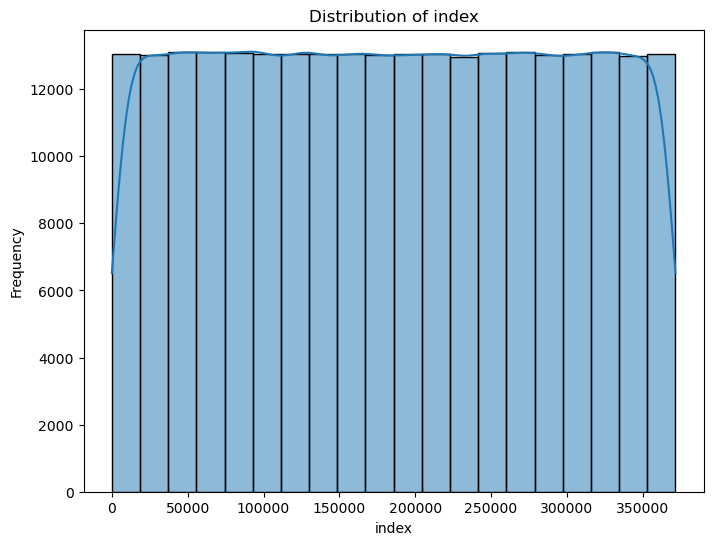

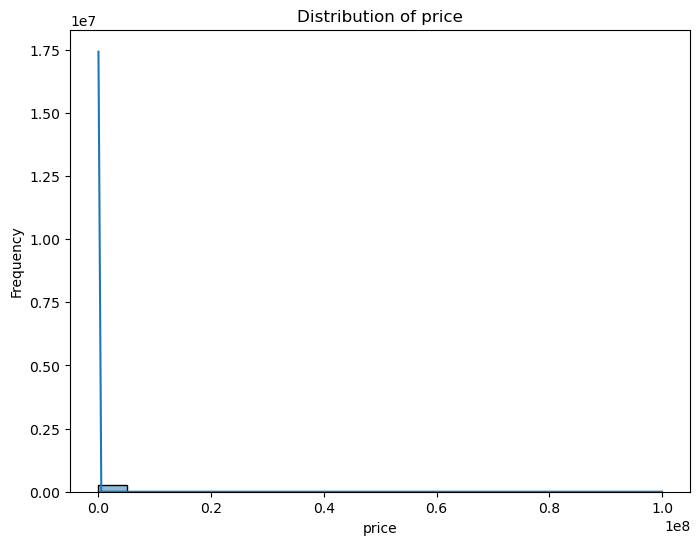

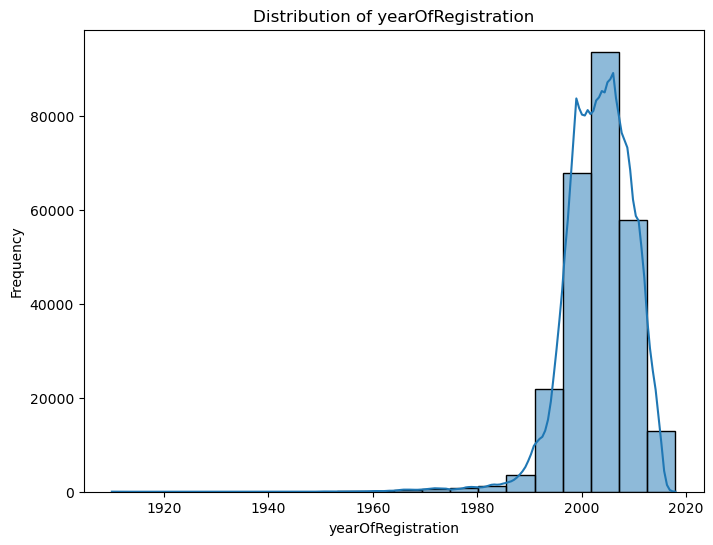

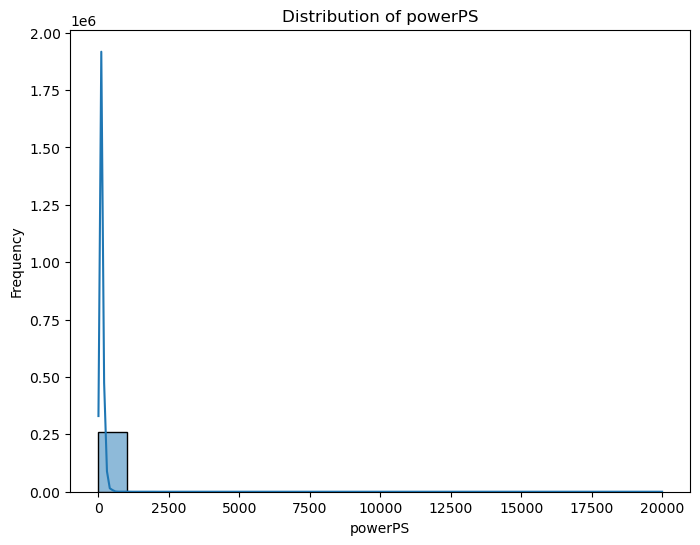

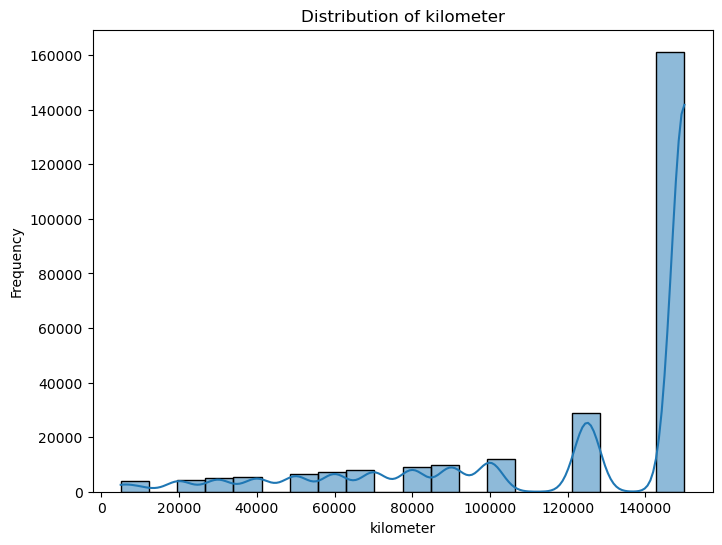

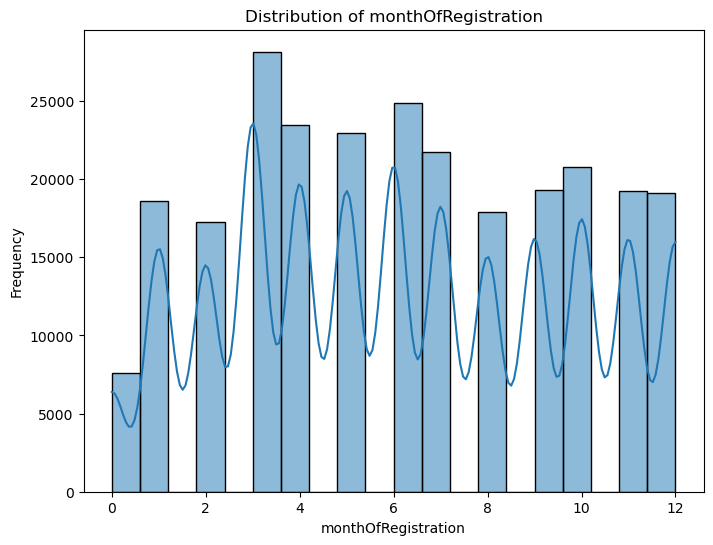

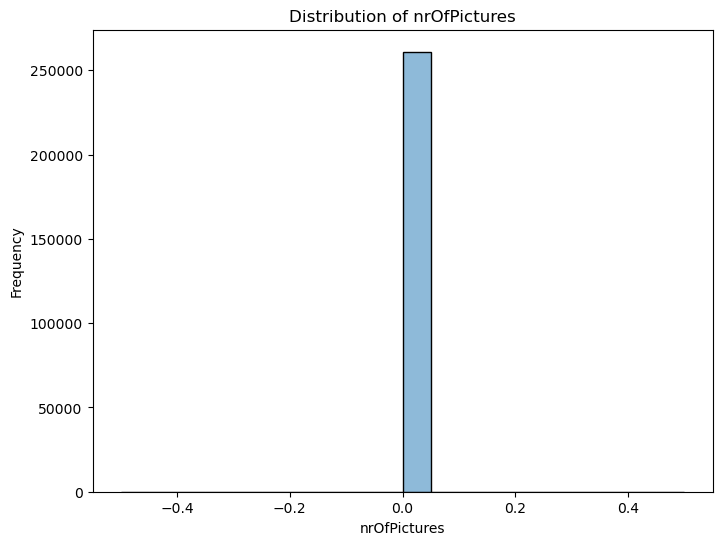

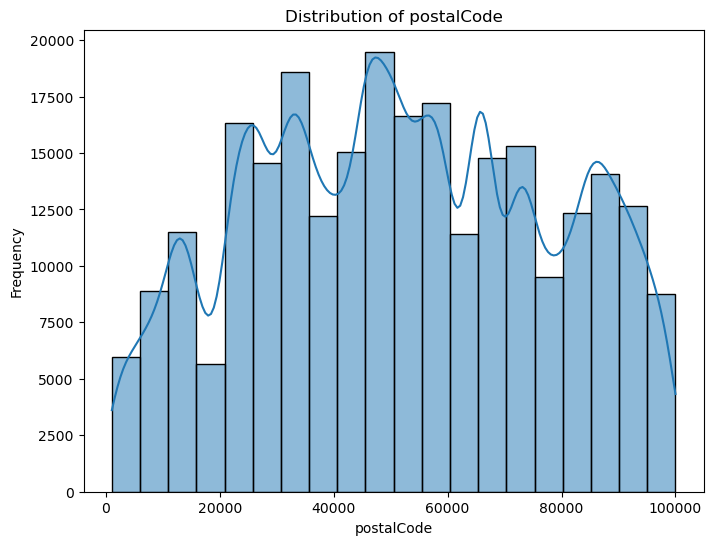

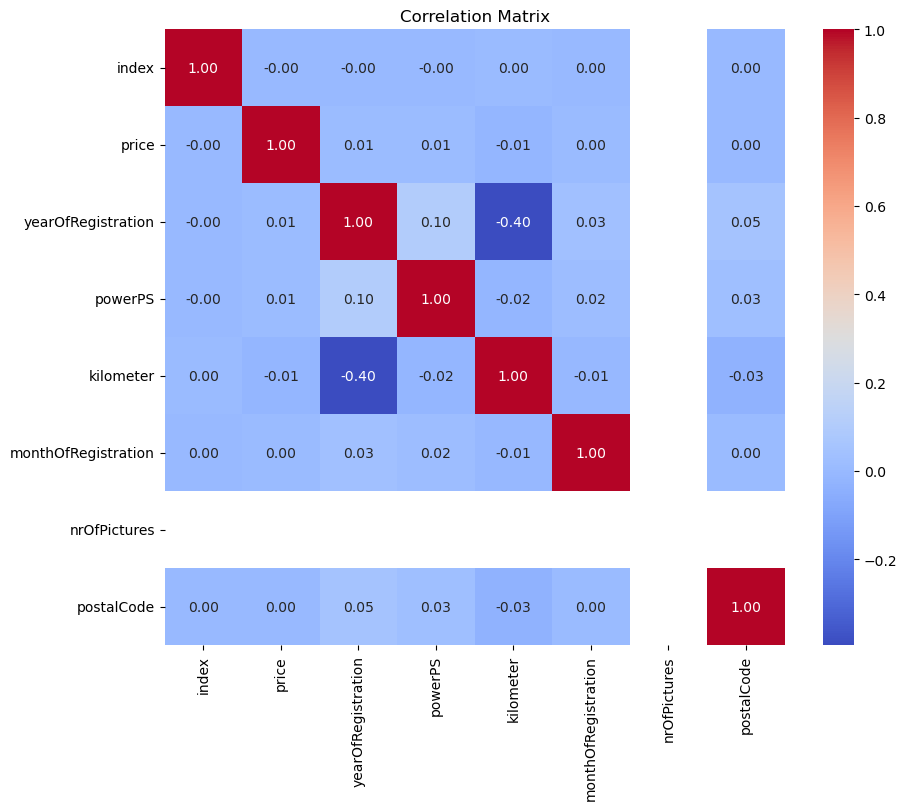

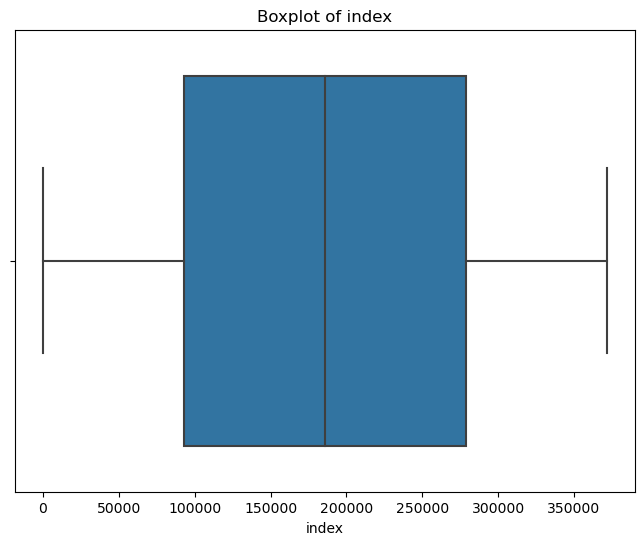

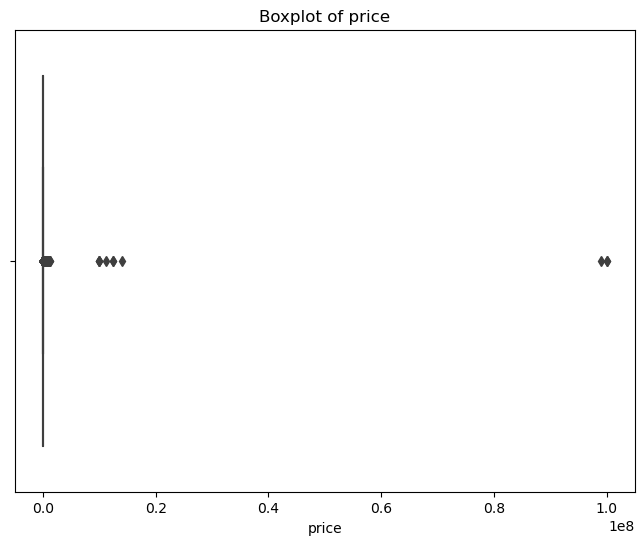

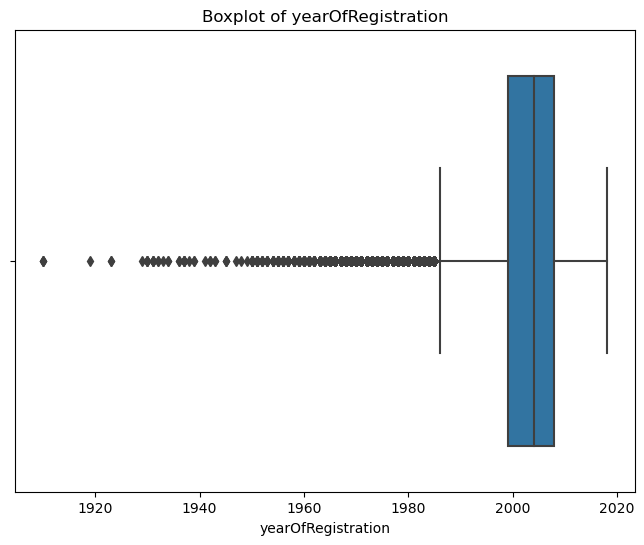

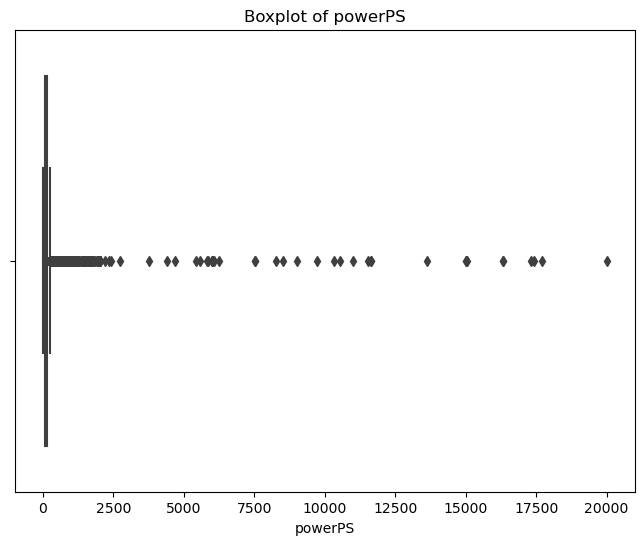

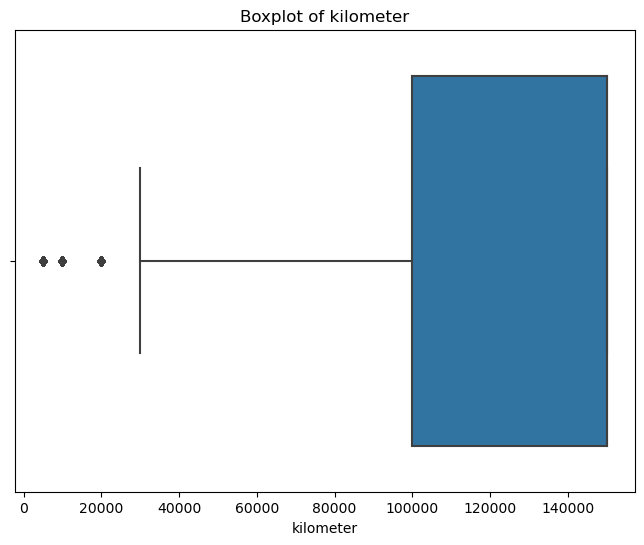

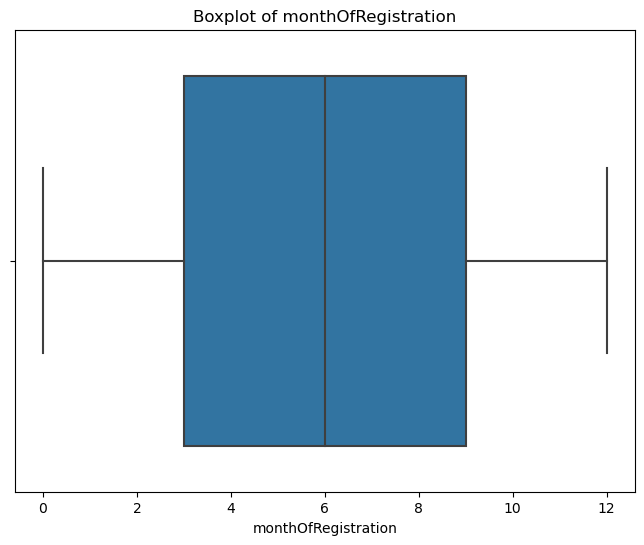

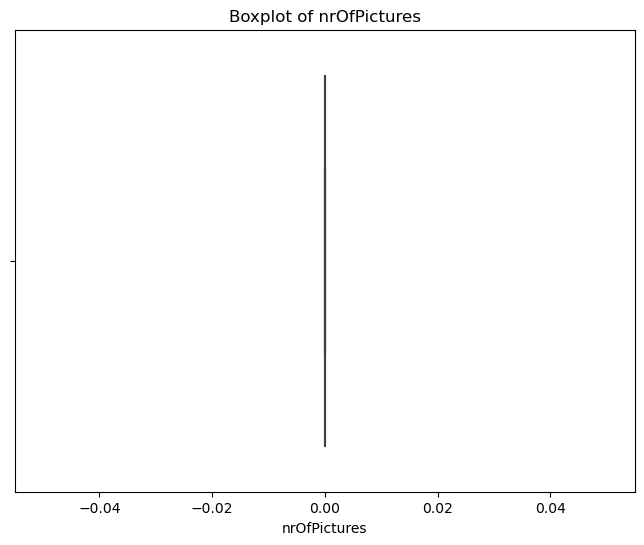

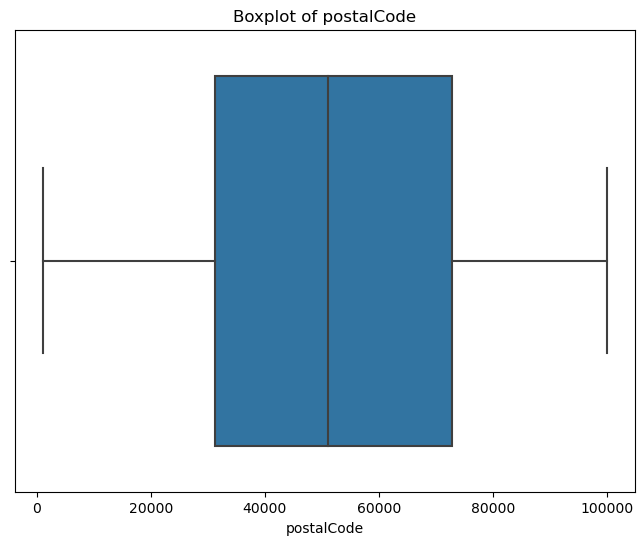

Chosen Prediction Model: KNeighborsRegressor
KNN Model Evaluation Without Cross-Validation:
Mean Squared Error: 1652657.0895600857
Mean Absolute Error: 849.4315680564071
R-squared Score: 0.33432368481842956
Adjusted R-squared Score: 0.33422163222426193

KNN Model Evaluation With Cross-Validation:
Mean Squared Error (CV): 1717851.941653944
R-squared Score (CV): 0.31032524194837674
Adjusted R-squared Score (CV): 0.3102988119320207


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def load_data(file_path):
    """Load the dataset from the given file path."""
    return pd.read_csv(file_path)

def clean_data(df):
    """Perform data cleaning."""
    # Drop any rows with missing values
    df_cleaned = df.dropna()
    return df_cleaned

def transform_data(df, target_column):
    """Perform data transformation."""
    # Exclude non-numeric columns
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df_numeric = df[numeric_cols]
    
    # Convert target column to string type
    df[target_column] = df[target_column].astype(str)
    
    # Convert categorical variables to numerical using Label Encoding
    label_encoder = LabelEncoder()
    df[target_column] = label_encoder.fit_transform(df[target_column])
    
    return df_numeric, df[target_column]

# def transform_data(df, target_column):
#     """Perform data transformation."""
#     # Exclude non-numeric columns
#     numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
#     df_numeric = df[numeric_cols]
    
#     # Convert categorical variables to numerical using Label Encoding
#     label_encoder = LabelEncoder()
#     df[target_column] = label_encoder.fit_transform(df[target_column])
    
#     return df_numeric, df[target_column]

def eda(df):
    """Perform exploratory data analysis."""
    # Display summary statistics
    print(df.describe())
    
    # Visualize distributions of numerical features
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[col], bins=20, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
    
    # Visualize the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()
    
    # Visualize boxplots of numerical features
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)
        plt.show()

def train_model(model, X_train, y_train):
    """Train the given model."""
    model.fit(X_train, y_train)

def evaluate_model(model, X_test, y_test):
    """Evaluate the given model."""
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Compute adjusted R-squared
    n = len(X_test)
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    return mse, mae, r2, adjusted_r2

def evaluate_model_KNN_CV(X_train, y_train, k=5):
    """Model Evaluation with KNN and Cross Validation."""
    knn = KNeighborsRegressor(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_cv = -cv_scores.mean()
    
    # Compute R-squared for cross-validation
    r2_cv = cross_val_score(knn, X_train, y_train, cv=5, scoring='r2').mean()
    
    # Compute adjusted R-squared for cross-validation
    n = len(X_train)
    p = X_train.shape[1]
    adjusted_r2_cv = 1 - (1 - r2_cv) * (n - 1) / (n - p - 1)
    
    return mse_cv, r2_cv, adjusted_r2_cv

def model_selection_KNN(X_train, y_train):
    """Model Selection for KNN."""
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    return knn

def master(file_path, target_column):
    """Master function to execute the entire pipeline."""
    # Step 1: Load data
    df = load_data(file_path)
    
    # Step 2: Data cleaning
    df_cleaned = clean_data(df)
    
    # Step 3: Data transformation
    X, y = transform_data(df_cleaned, target_column)
    
    # Step 4: Exploratory Data Analysis (EDA)
    eda(X)
    
    # Step 5: Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Step 6: Train models
    # Model selection for KNN
    knn_model = model_selection_KNN(X_train, y_train)
    
    # Step 7: Evaluate the models
    # Evaluate KNN model without cross-validation
    mse, mae, r2, adjusted_r2 = evaluate_model(knn_model, X_test, y_test)
    
    # Evaluate KNN model with cross-validation
    mse_cv, r2_cv, adjusted_r2_cv = evaluate_model_KNN_CV(X_train, y_train, k=5)
    
    # Print the chosen prediction model
    print("Chosen Prediction Model:", type(knn_model).__name__)
    
    return mse, mae, r2, adjusted_r2, mse_cv, r2_cv, adjusted_r2_cv

# Execute the pipeline
mse, mae, r2, adjusted_r2, mse_cv, r2_cv, adjusted_r2_cv = master('Regression.Used.Cars.csv', 'price')
print("KNN Model Evaluation Without Cross-Validation:")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)
print("Adjusted R-squared Score:", adjusted_r2)
print("\nKNN Model Evaluation With Cross-Validation:")
print("Mean Squared Error (CV):", mse_cv)
print("R-squared Score (CV):", r2_cv)
print("Adjusted R-squared Score (CV):", adjusted_r2_cv)


### INTERPRETATION

This dataset is about used cars and it is used to predict prices of the cars based on their features.

Without Cross-Validation:
Mean Squared Error (MSE): 2500275.76
The MSE is quite high, indicating that the average squared difference between the actual and predicted values is large. This suggests that the model's predictions are very low.
Mean Absolute Error (MAE): 1390.09
The MAE represents the average absolute difference between the actual and predicted values. A value of 1390.09 indicates that, on average, the model's predictions are off by approximately 1390.09 units.
R-squared Score: -0.007
The R-squared score is negative, which means that the model performs worse than a horizontal line fitting the data. It suggests that the model does not explain any variance in the price of the cars, making this model a bad fit fot this dataset.
Adjusted R-squared Score: -0.007
The adjusted R-squared score, which takes into account the number of predictors in the model, is also negative, further indicating poor model fit.

With Cross-Validation:
Mean Squared Error (CV): 2825705.25
The cross-validated MSE is slightly higher than the non-cross-validated MSE, indicating that the model's performance is consistent across different subsets of the data.
R-squared Score (CV): -0.135
The cross-validated R-squared score is negative, suggesting that the model performs poorly in explaining the variance in the target variable across different folds of the data.
Adjusted R-squared Score (CV): -0.135
The adjusted R-squared score obtained through cross-validation is also negative, indicating that the model's performance does not improve when accounting for the number of predictors.

The KNN regression model performs poorly, as indicated by the high MSE, negative R-squared scores, and negative adjusted R-squared scores.
The negative R-squared scores suggest that the model fails to explain any variance in the target variable and might not be suitable for the dataset.
Cross-validation confirms the poor performance of the model across different subsets of the data. Here any model other than KNN should be applied to clearly analyze the performance.

# FINAL SUMMARY

For the classification datasets:

KNN with cross-validation has consistently resulted in superior performance compared to its without cross-validation. Cross-validation has helped deal overfitting by evaluating the model's performance on multiple subsets of the data, resulting in more reliable and accurate predictions.
Across various metrics such as accuracy, precision, recall, and F1 score, KNN with cross-validation tends to yield higher scores, indicating better classification ability. This suggests that the model's ability to generalize to unseen data is enhanced with cross-validation.
However, it's essential to note that KNN's performance on classification tasks may still vary depending on the dataset characteristics. For instance, in datasets like the life expectancy dataset, KNN may struggle to achieve satisfactory results even with cross-validation due to its reliance on local similarity measures, which may not capture the underlying patterns effectively in complex datasets.therefore, KNN can be successfully used for the classification datasets, but along with the consideration of feature selection to ensure that irrelavant features are excluded. 

For the regression datasets:

KNN regression models exhibit a more varied performance compared to their classification counterparts. While some datasets show moderate success with KNN regression, others indicate poor performance.
Cross-validation does not consistently improve the performance of KNN regression models. This suggests that the model's generalization ability may be limited in regression tasks, where the relationships between features and the target variable are more complex and nonlinear.
Factors such as dataset characteristics, feature selection, and the presence of noise in the data significantly impact KNN's performance in regression tasks. In cases where KNN performs poorly, alternative regression techniques, such as linear regression or random forest, may need to be explored to achieve more accurate and reliable predictions.
Overall, while KNN offers an easier and straightforward approach for both classification and regression tasks, its suitability and performance vary across different types of datasets. In classification tasks, KNN with cross-validation tends to provide reliable and robust predictions, especially when dealing with well-defined patterns in the data. However, in regression tasks, KNN's performance may be more nuanced and less consistent, requiring careful consideration of dataset characteristics and alternative modeling approaches, along with feature selection.